In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("election2024.csv")

In [3]:
df.head()

id   sex   age federal_district  \
0  07169ed8148ce047  male  18.0  north caucasian   
1  0716a4f3354cecdd  male  23.0  north caucasian   
2  0716889b304ce79c  male  20.0            volga   
3  07168e28b5cce563  male  22.0     northwestern   
4  0716a563914ce549  male  21.0         southern   

                                   type_of_city    knows_election_date  \
0                                       village     named correct date   
1                                       village     named correct date   
2         city with population of less than 50k     named correct date   
3  city with population of 1 million and higher  not sure or no answer   
4  city with population of 1 million and higher     named correct date   

        will_vote candidate      television_usage      internet_usage  \
0        not sure     Putin  several times a week  over 4 hours a day   
1        not sure     Putin      once half a year  over 4 hours a day   
2  definitely yes     Putin  several times a week  over 4 hours a day   
3        not sure  Davankov  several times a week  over 4 hours a day   
4  definitely yes     Putin        does not watch  over 4 hours a day   

                     education     income        employment  \
0  incomplete school education  very high      entrepreneur   
1                      college  very high     work for hire   
2                      college  very high     work for hire   
3                      college  very high        unemployed   
4              bachelor degree  very high  employed student   

                  job_type                       company_type   weight1  
0                      NaN                            farming  1.445172  
1  commercial organization                              trade  1.445172  
2   law enforcement agency             law enforcement agency  1.301691  
3                      NaN                                NaN  1.538628  
4  commercial organization  tech, programming, communications  1.967015

In [4]:
df.shape

(1600, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1600 non-null   object 
 1   sex                  1600 non-null   object 
 2   age                  1600 non-null   float64
 3   federal_district     1600 non-null   object 
 4   type_of_city         1600 non-null   object 
 5   knows_election_date  1600 non-null   object 
 6   will_vote            1600 non-null   object 
 7   candidate            1600 non-null   object 
 8   television_usage     1600 non-null   object 
 9   internet_usage       1600 non-null   object 
 10  education            1600 non-null   object 
 11  income               1600 non-null   object 
 12  employment           1600 non-null   object 
 13  job_type             692 non-null    object 
 14  company_type         879 non-null    object 
 15  weight1              1600 non-null   f

In [6]:
df.describe()

age      weight1
count  1600.000000  1600.000000
mean     49.936250     1.000000
std      16.901797     0.327084
min      18.000000     0.468226
25%      37.000000     0.772224
50%      49.000000     0.921724
75%      64.000000     1.158913
max      90.000000     2.515072

In [8]:
df.isna().sum()

id                       0
sex                      0
age                      0
federal_district         0
type_of_city             0
knows_election_date      0
will_vote                0
candidate                0
television_usage         0
internet_usage           0
education                0
income                   0
employment               0
job_type               908
company_type           721
weight1                  0
dtype: int64

In [7]:
df.columns

Index(['id', 'sex', 'age', 'federal_district', 'type_of_city',
       'knows_election_date', 'will_vote', 'candidate', 'television_usage',
       'internet_usage', 'education', 'income', 'employment', 'job_type',
       'company_type', 'weight1'],
      dtype='object')

In [9]:
df.head()

id   sex   age federal_district  \
0  07169ed8148ce047  male  18.0  north caucasian   
1  0716a4f3354cecdd  male  23.0  north caucasian   
2  0716889b304ce79c  male  20.0            volga   
3  07168e28b5cce563  male  22.0     northwestern   
4  0716a563914ce549  male  21.0         southern   

                                   type_of_city    knows_election_date  \
0                                       village     named correct date   
1                                       village     named correct date   
2         city with population of less than 50k     named correct date   
3  city with population of 1 million and higher  not sure or no answer   
4  city with population of 1 million and higher     named correct date   

        will_vote candidate      television_usage      internet_usage  \
0        not sure     Putin  several times a week  over 4 hours a day   
1        not sure     Putin      once half a year  over 4 hours a day   
2  definitely yes     Putin  several times a week  over 4 hours a day   
3        not sure  Davankov  several times a week  over 4 hours a day   
4  definitely yes     Putin        does not watch  over 4 hours a day   

                     education     income        employment  \
0  incomplete school education  very high      entrepreneur   
1                      college  very high     work for hire   
2                      college  very high     work for hire   
3                      college  very high        unemployed   
4              bachelor degree  very high  employed student   

                  job_type                       company_type   weight1  
0                      NaN                            farming  1.445172  
1  commercial organization                              trade  1.445172  
2   law enforcement agency             law enforcement agency  1.301691  
3                      NaN                                NaN  1.538628  
4  commercial organization  tech, programming, communications  1.967015

In this dataset, the target column depends on the specific analysis goal:

Predicting Voting Intention: If your goal is to predict whether a respondent will vote, the target column is will_vote.

Predicting Candidate Preference: If your goal is to predict which candidate a respondent will choose, the target column is candidate.

Predicting Awareness of Election Date: If your goal is to predict whether a respondent knows the election date, the target column is knows_election_date.

In [11]:
cols=['sex', 'federal_district', 'type_of_city',
       'knows_election_date', 'will_vote', 'candidate', 'television_usage',
       'internet_usage', 'education', 'income', 'employment', 'job_type',
       'company_type']

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

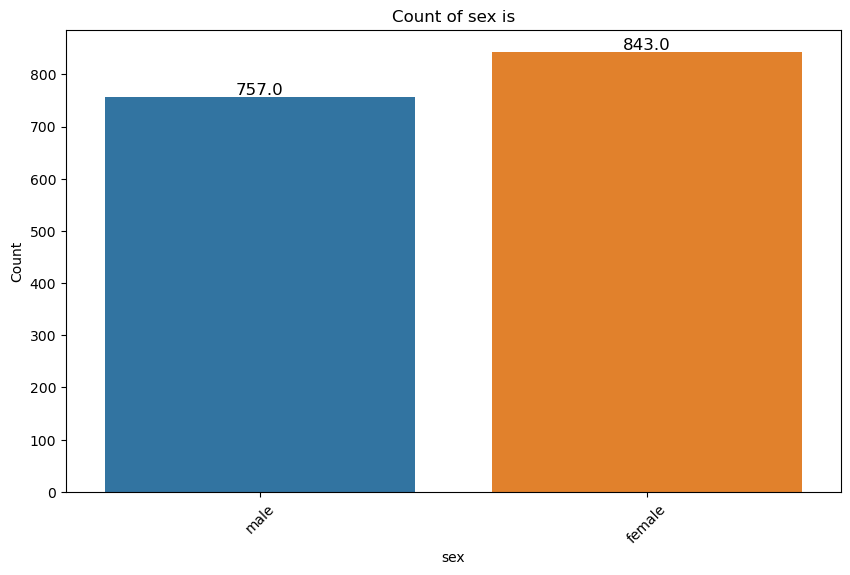

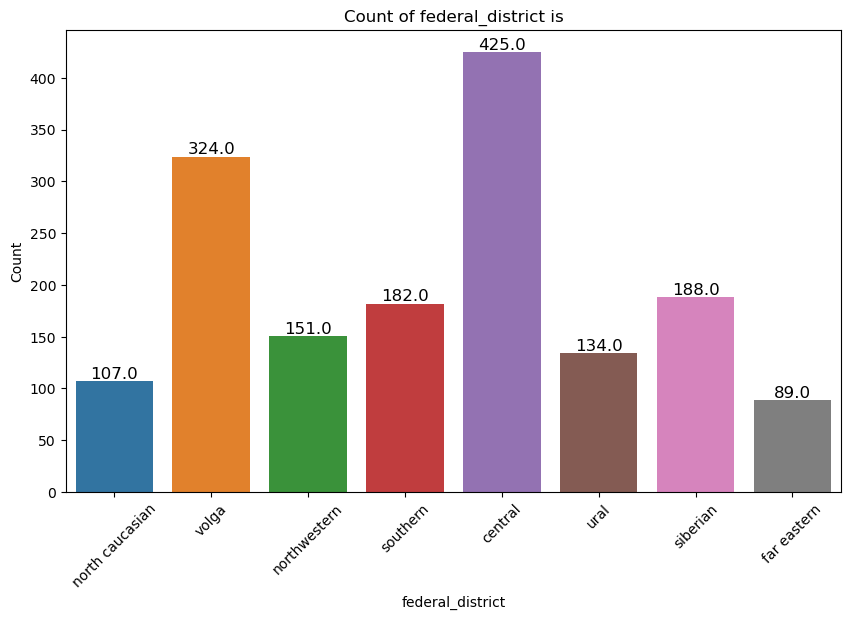

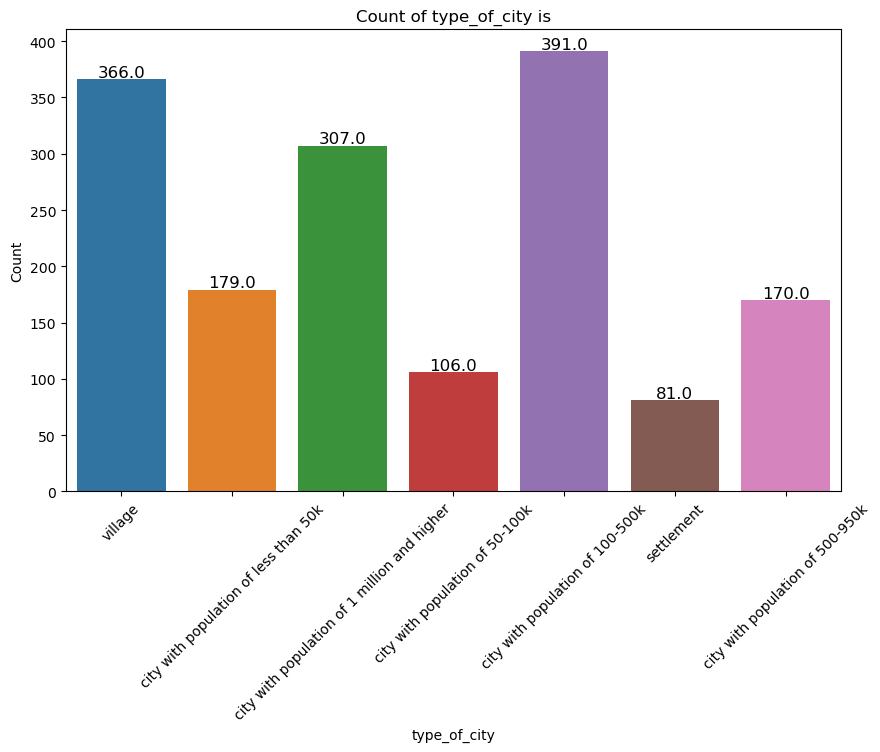

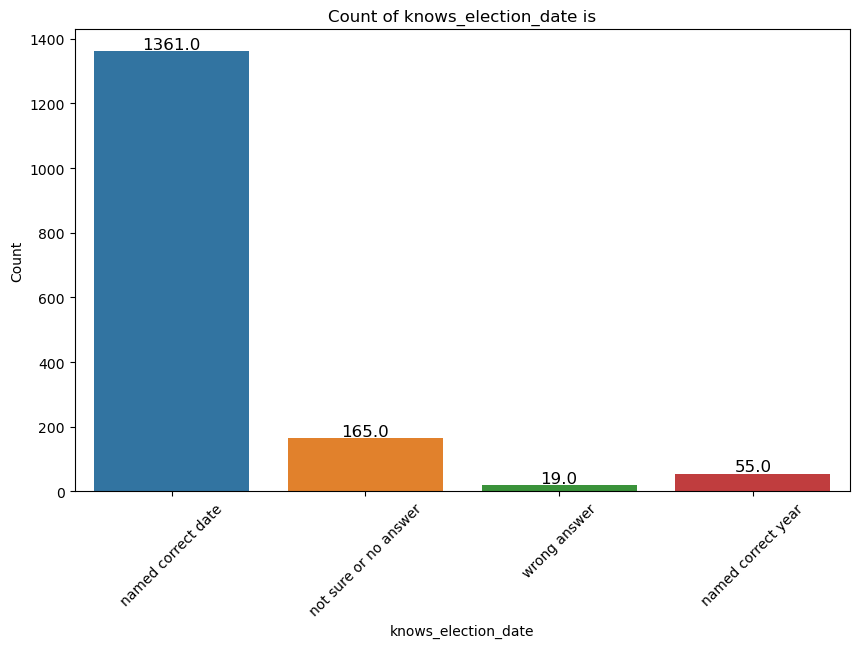

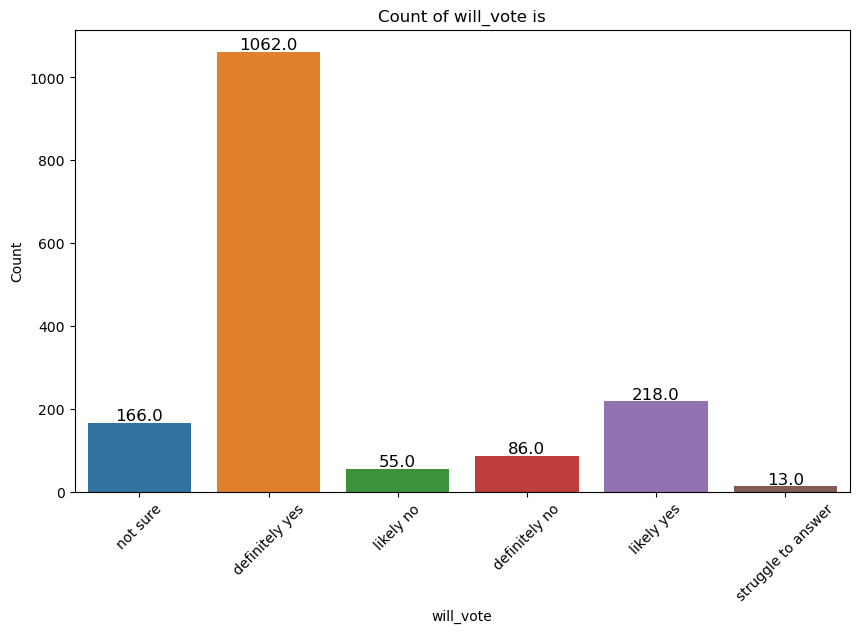

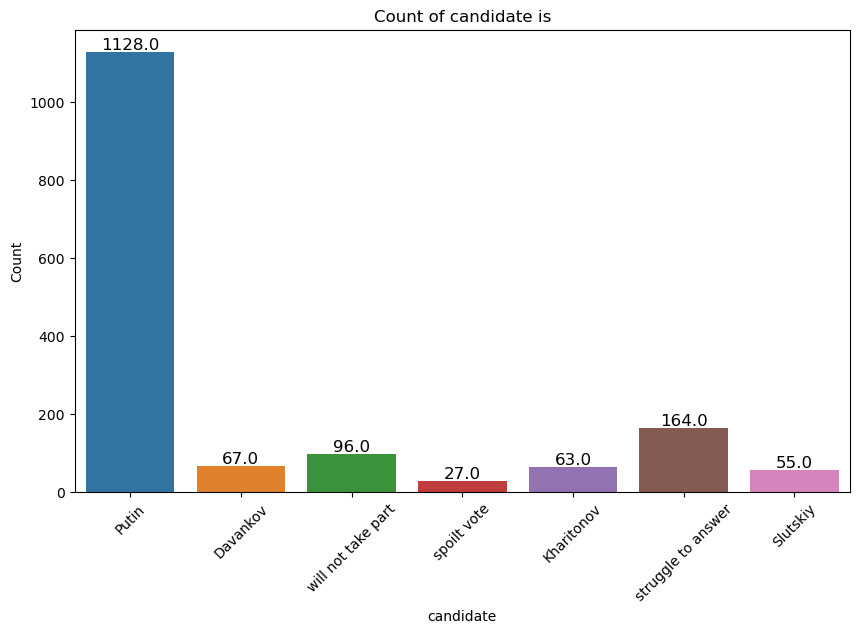

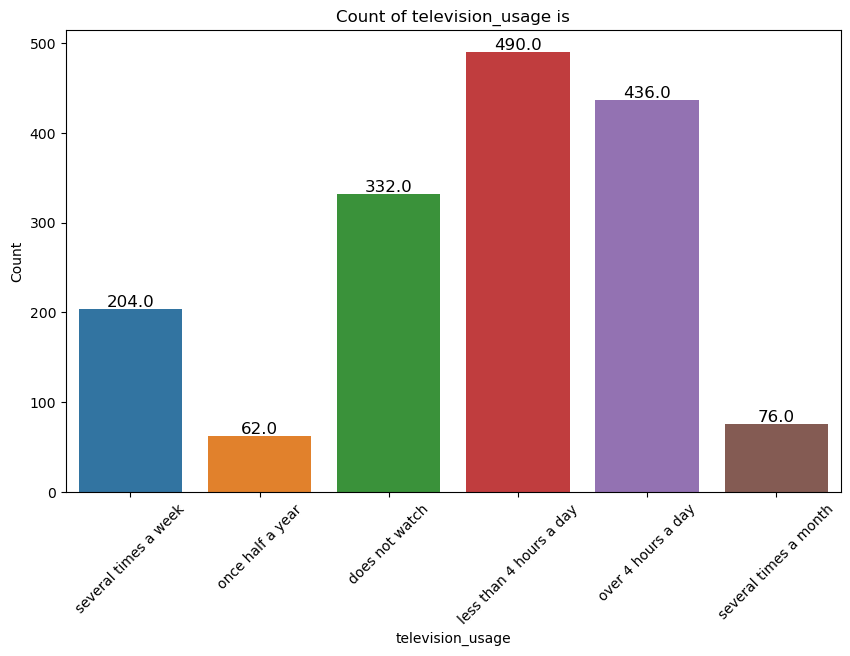

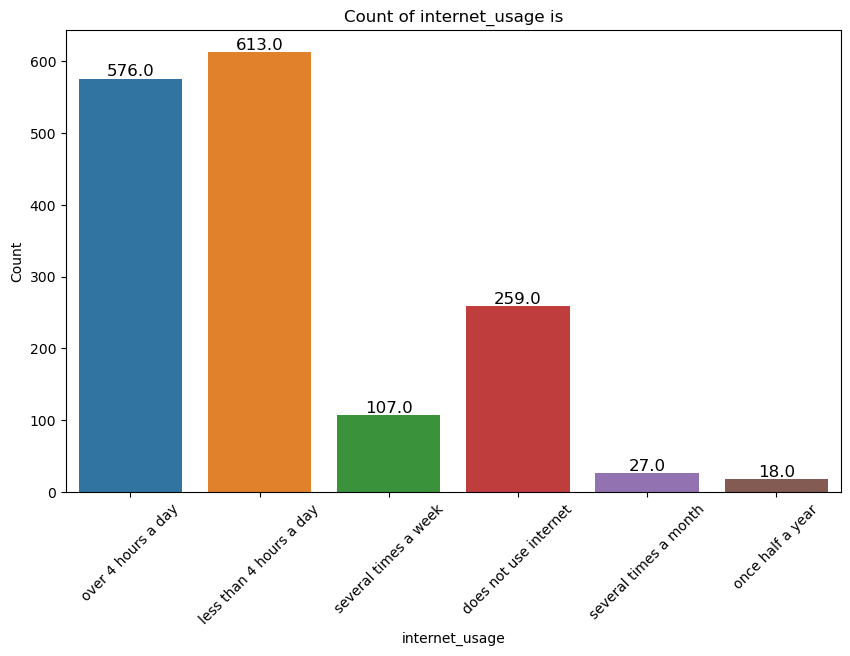

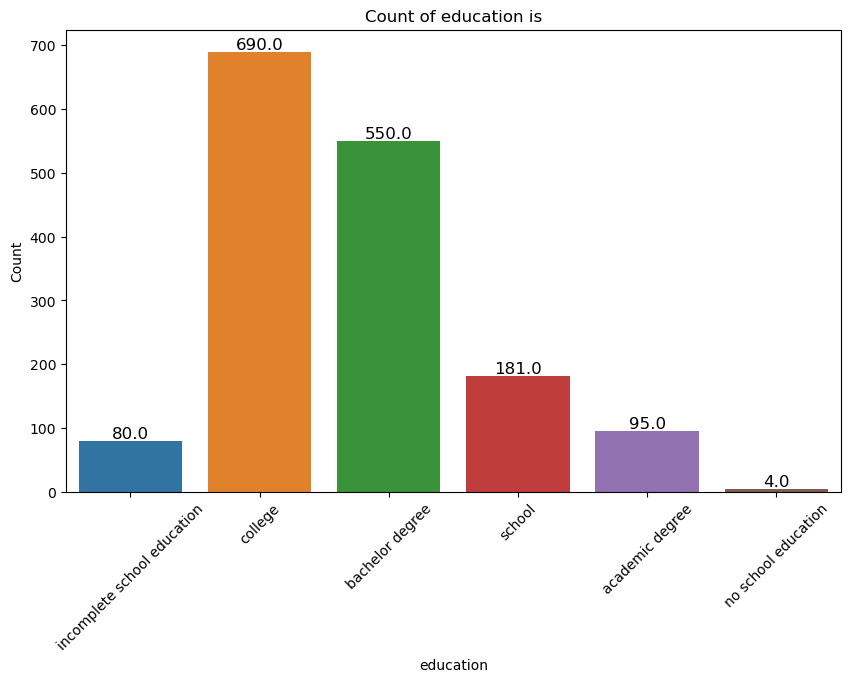

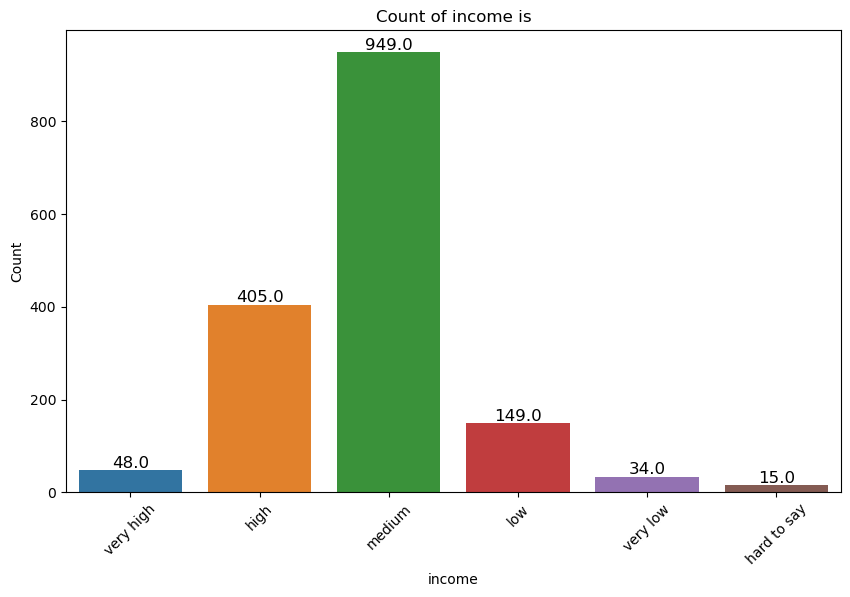

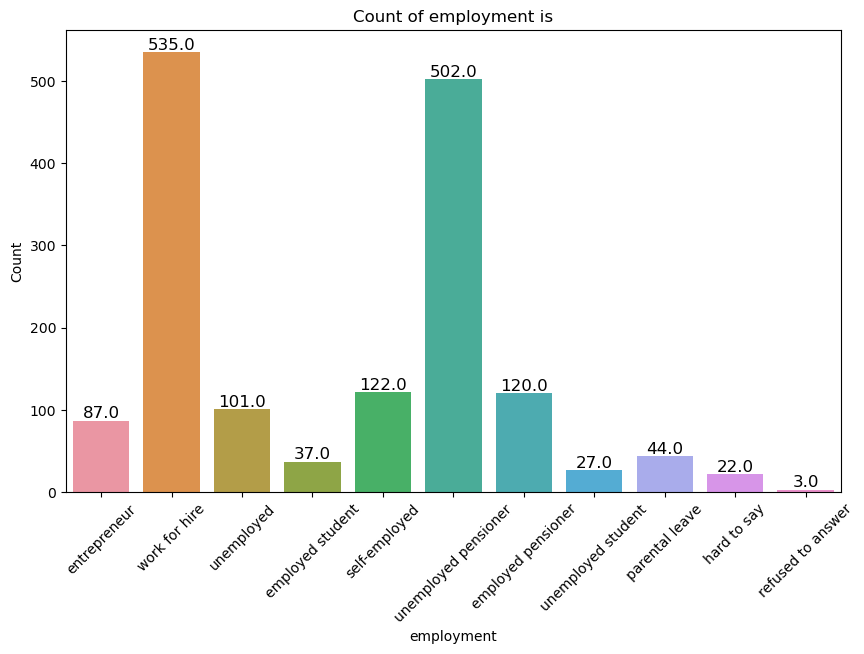

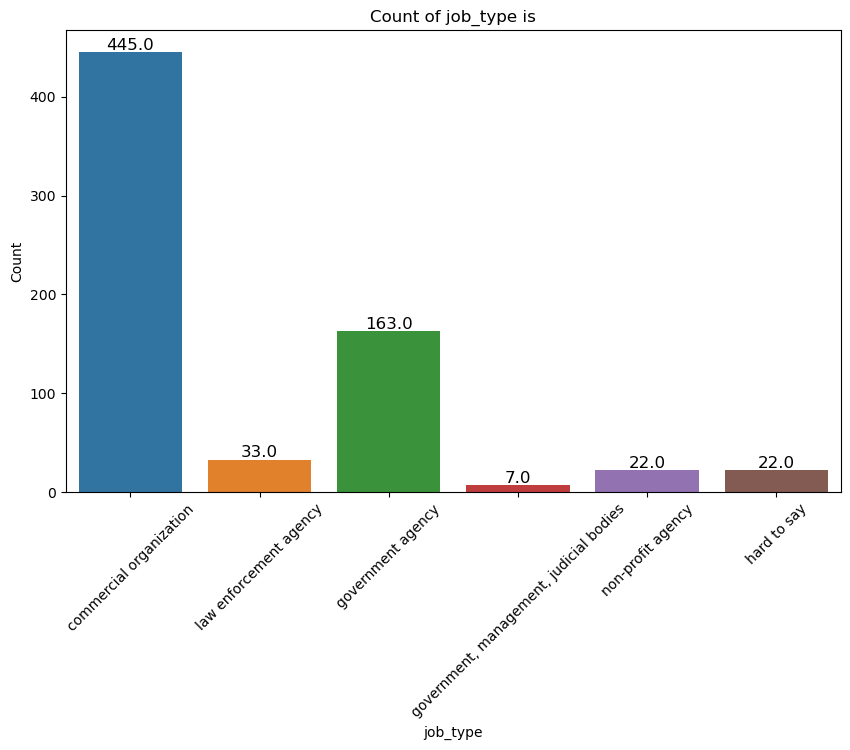

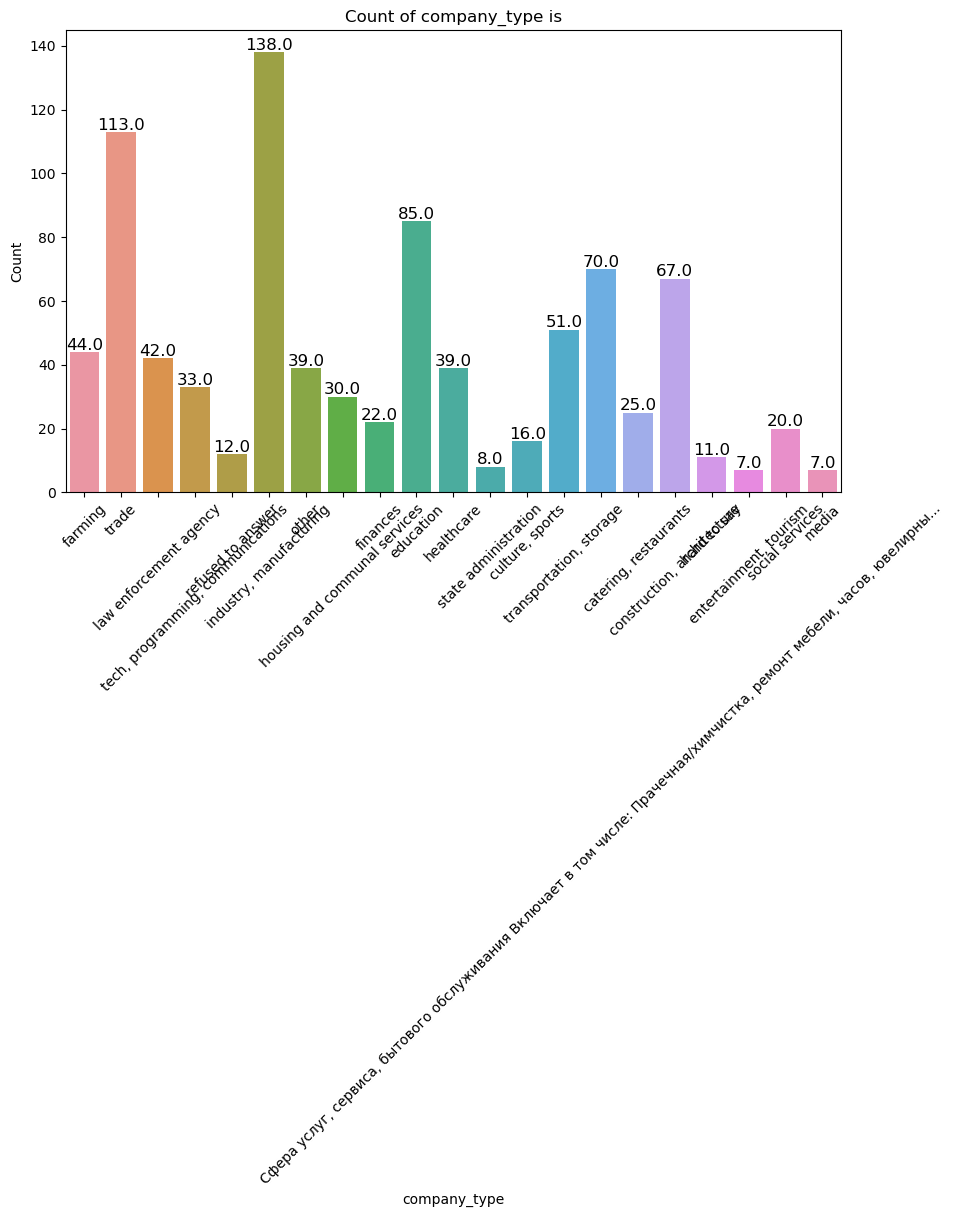

In [19]:
for col in cols:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=col, data=df) #1=NO  #2=YES
    
    # Annotate the count plot
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
    
    plt.title(f'Count of {col} is')
    plt.xlabel(f'{col}')
    plt.xticks(rotation=45)
    plt.ylabel('Count')
    plt.show()  

In [22]:
df['age'].max()

90.0

In [23]:
df['age'].min()

18.0

C:\Users\madhu\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Text(0.5, 1.0, 'Age Group Distribution')

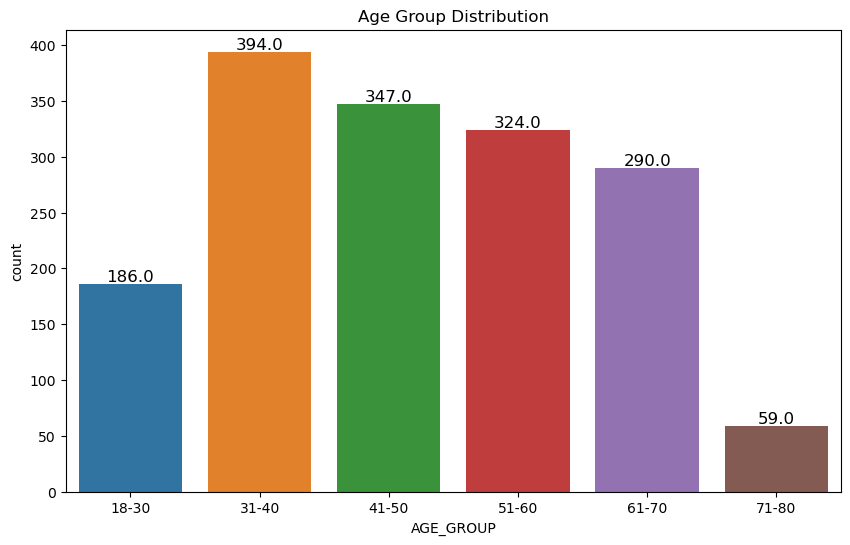

In [25]:
age_labels = ['18-30','31-40', '41-50', '51-60', '61-70', '71-80']
df['AGE_GROUP'] = pd.cut(df['age'], bins=6, labels=age_labels, right=False)
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='AGE_GROUP',data=df)

# Annotate the count plot
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Age Group Distribution')

In [27]:
df['weight1'].max()

2.5150719933503947

In [28]:
df['weight1'].min()

0.4682264408499648

C:\Users\madhu\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Text(0.5, 1.0, 'Weight Group Distribution')

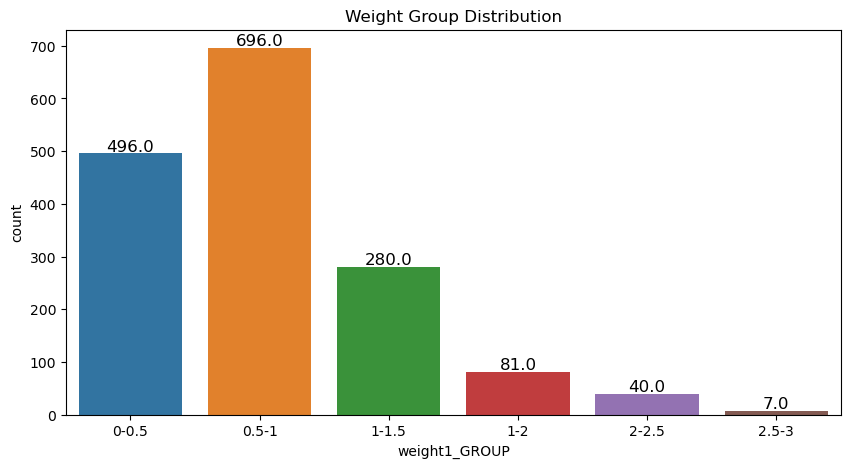

In [48]:
weight_labels = ['0-0.5','0.5-1', '1-1.5', '1-2', '2-2.5', '2.5-3']
df['weight1_GROUP'] = pd.cut(df['weight1'], bins=6, labels=weight_labels, right=False)
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='weight1_GROUP',data=df)

# Annotate the count plot
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Weight Group Distribution')

In [31]:
#target col will_vote

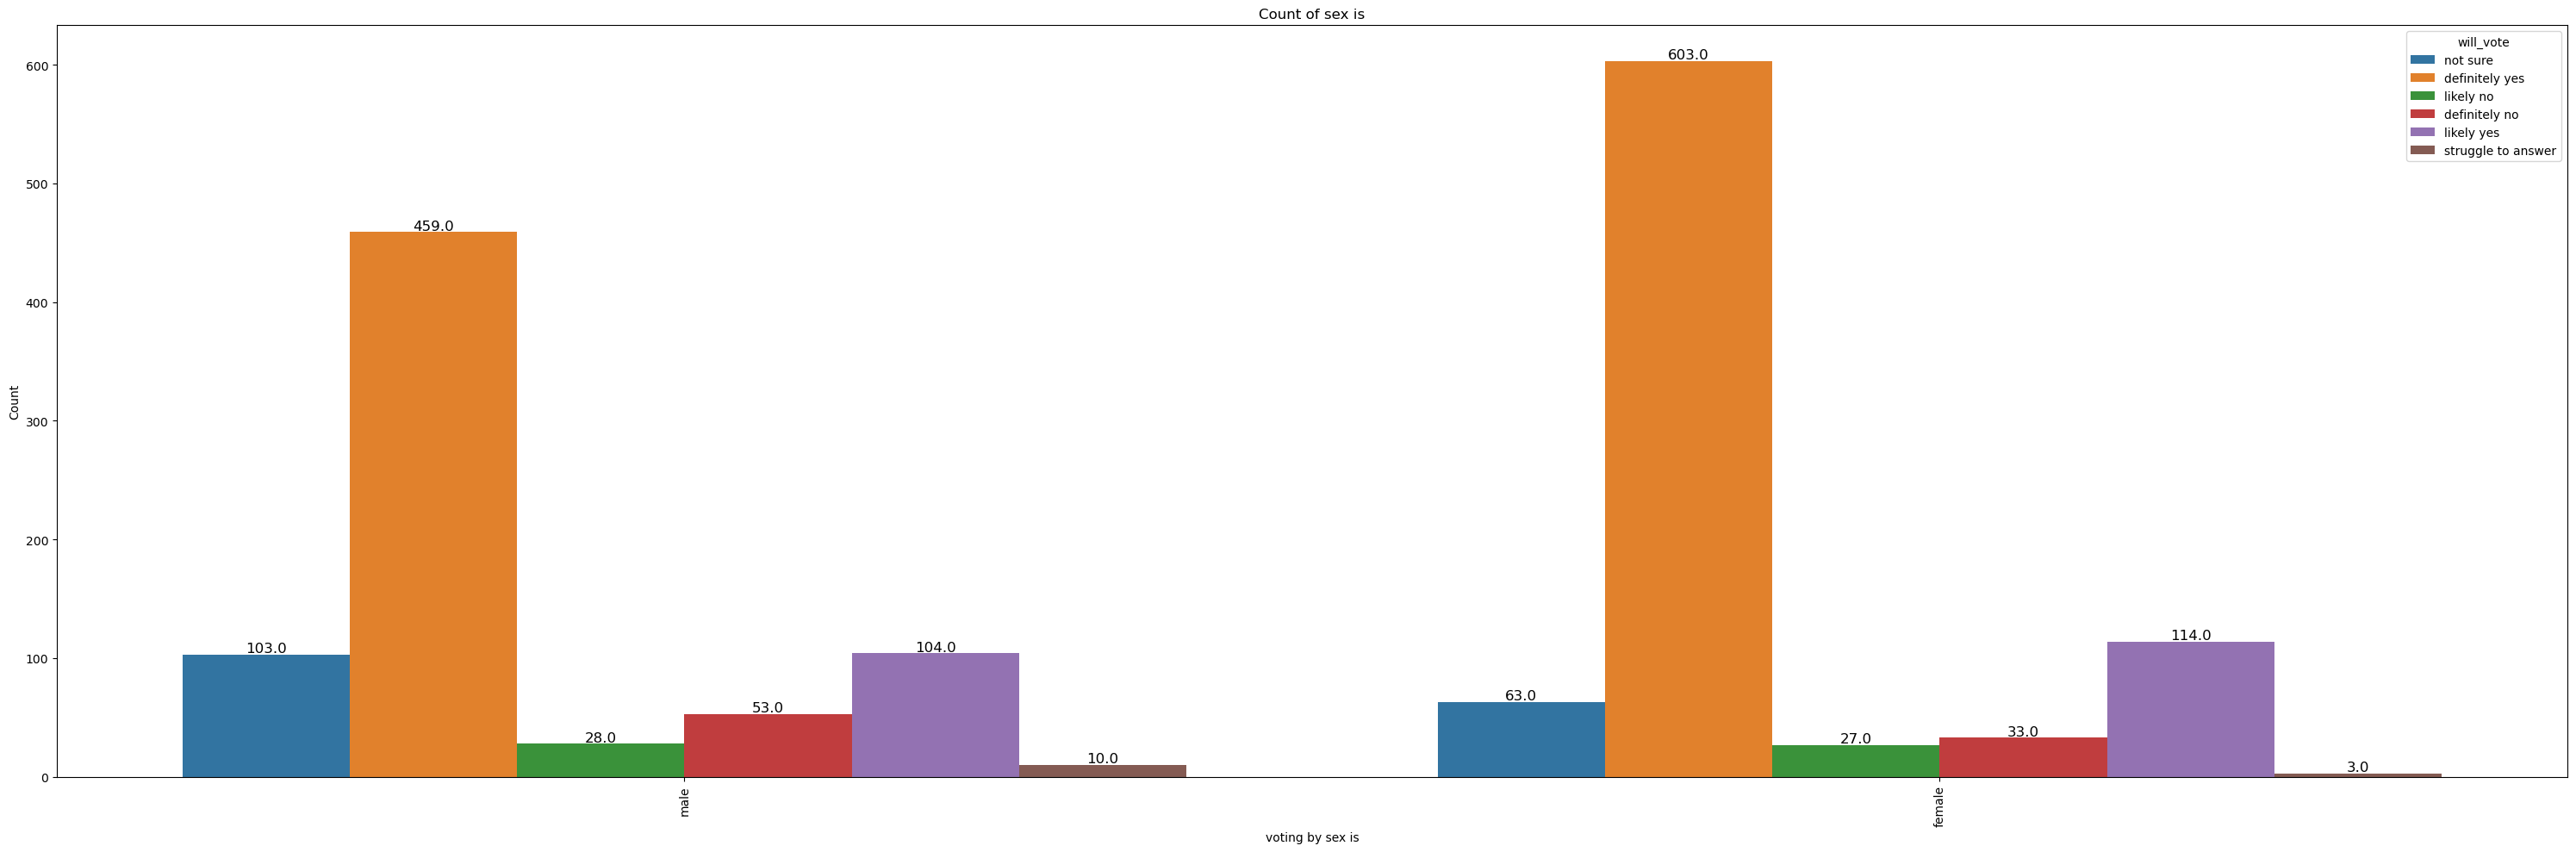

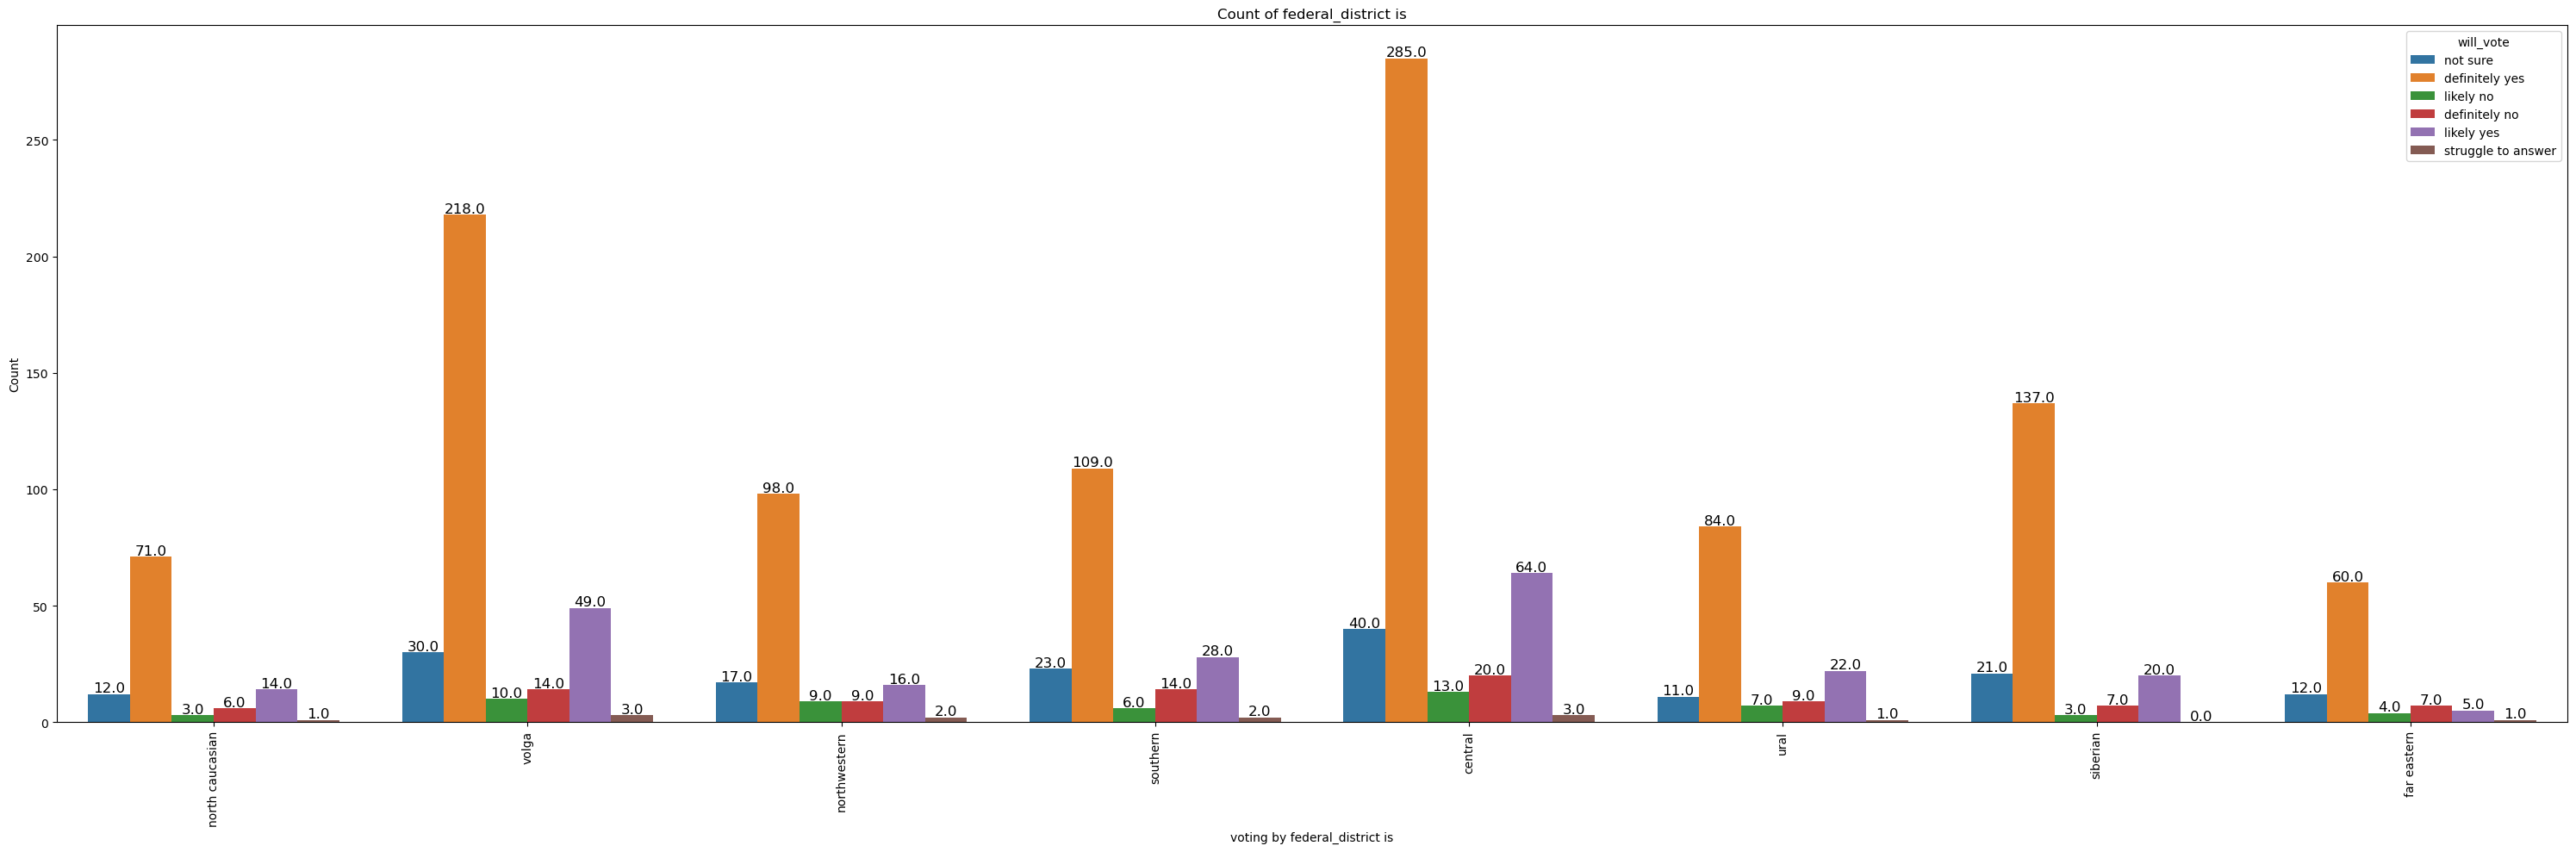

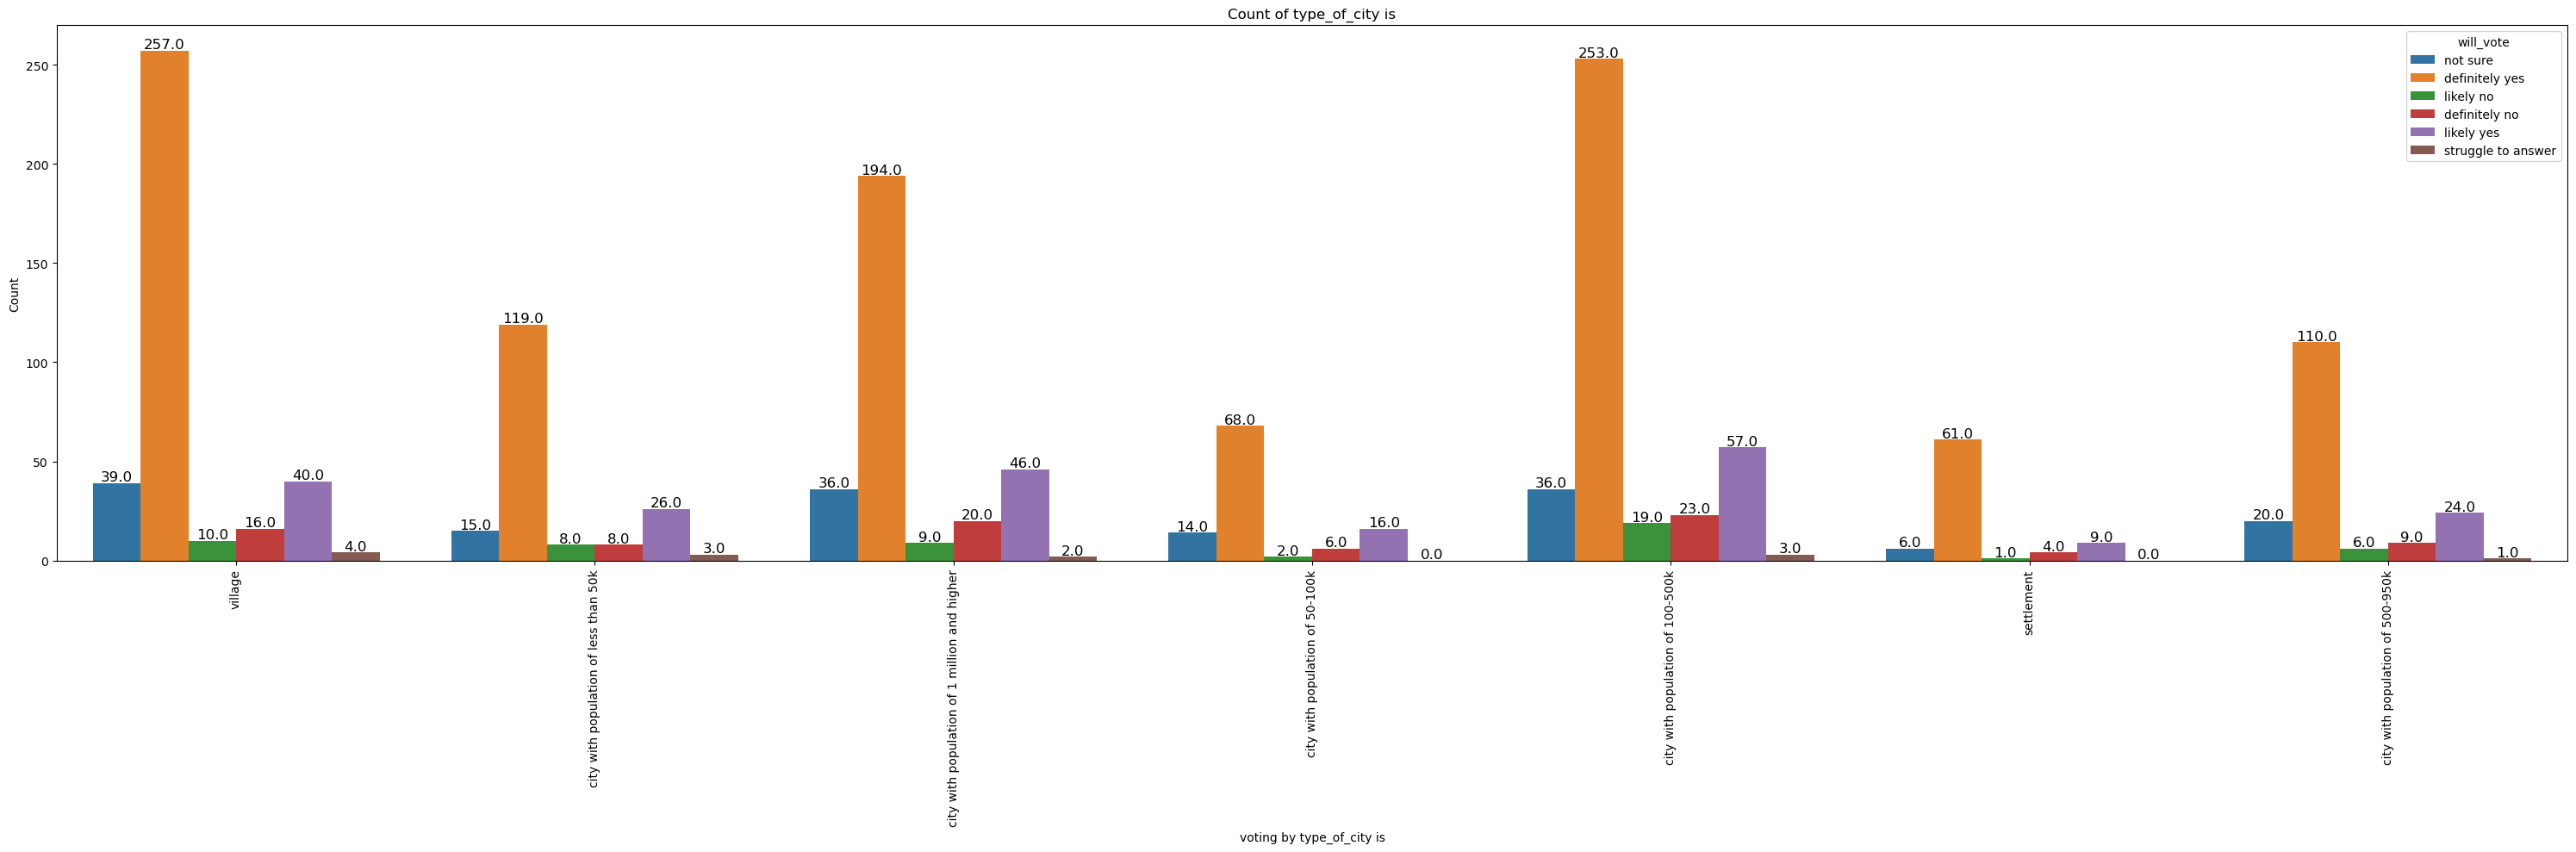

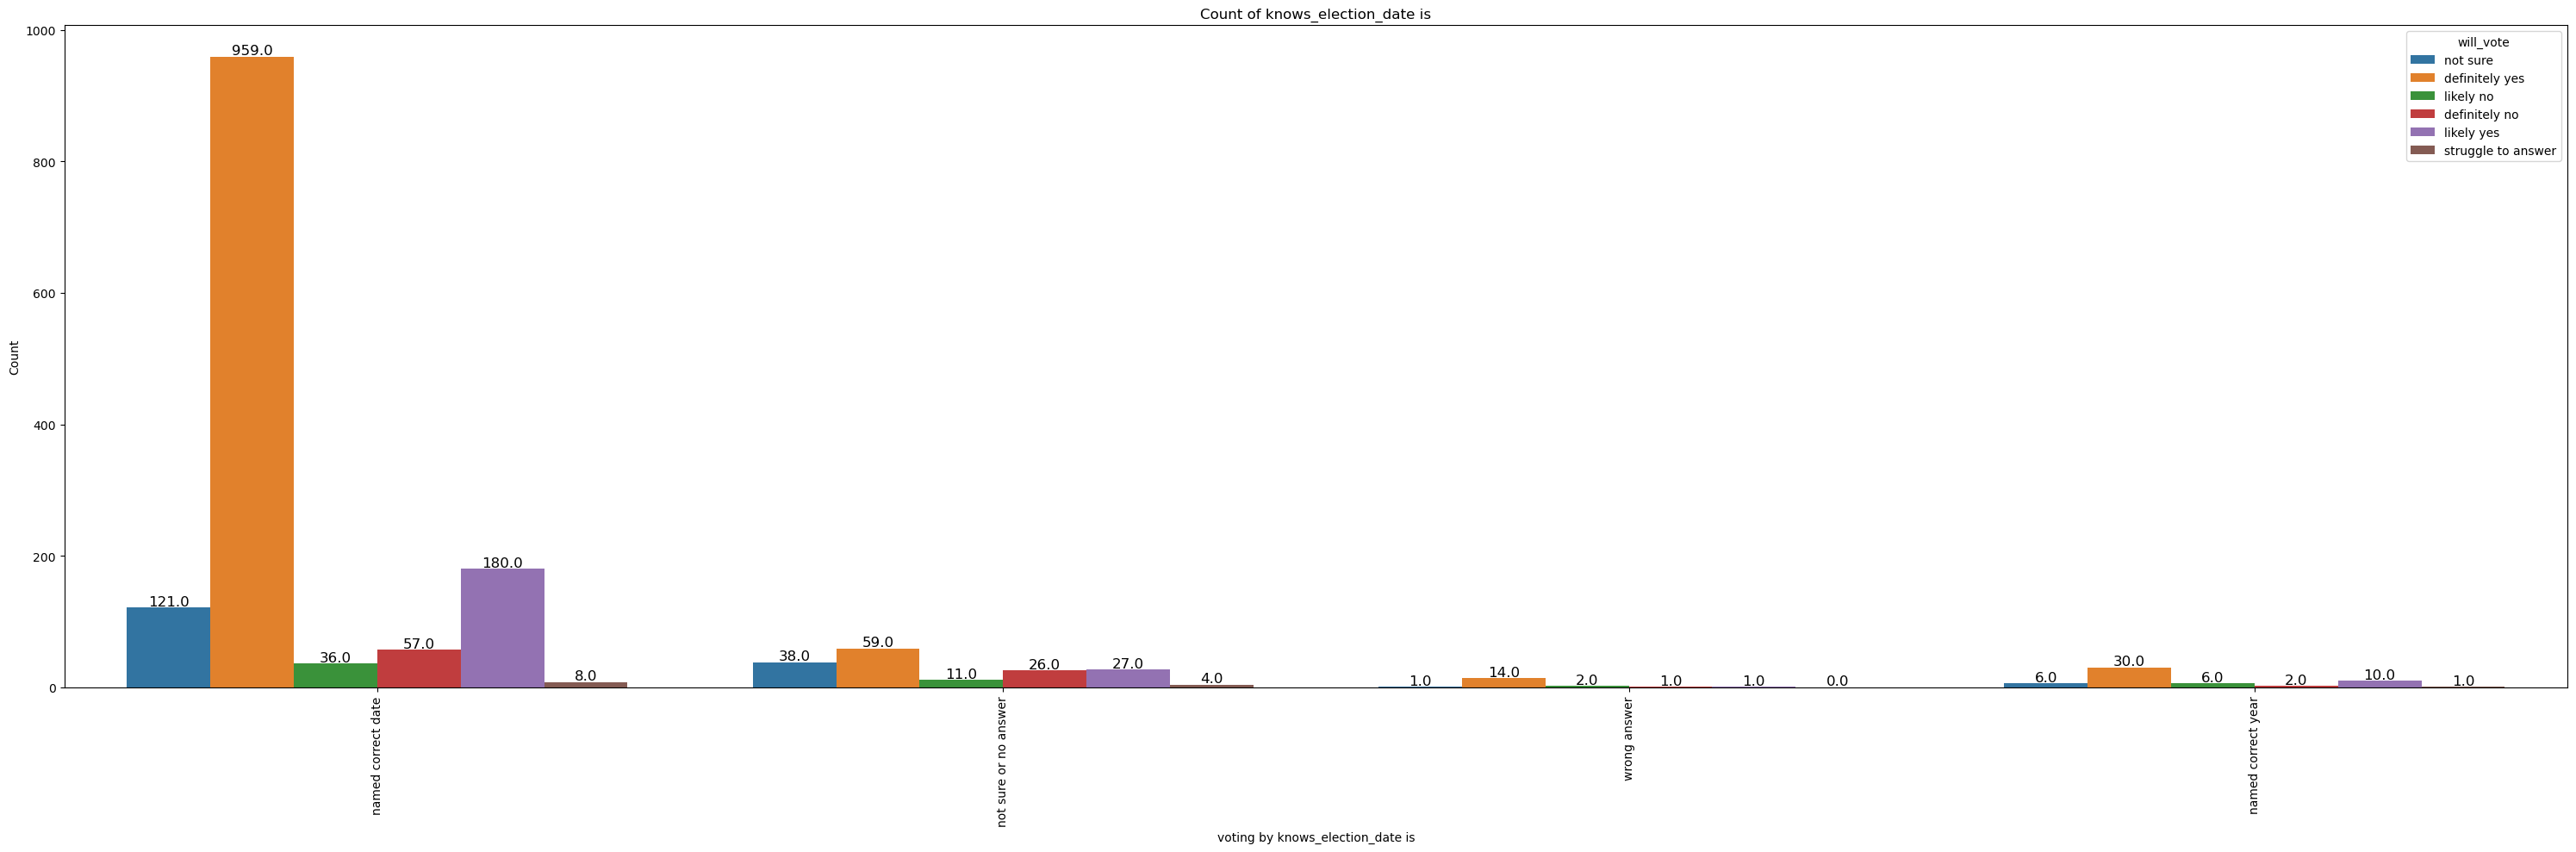

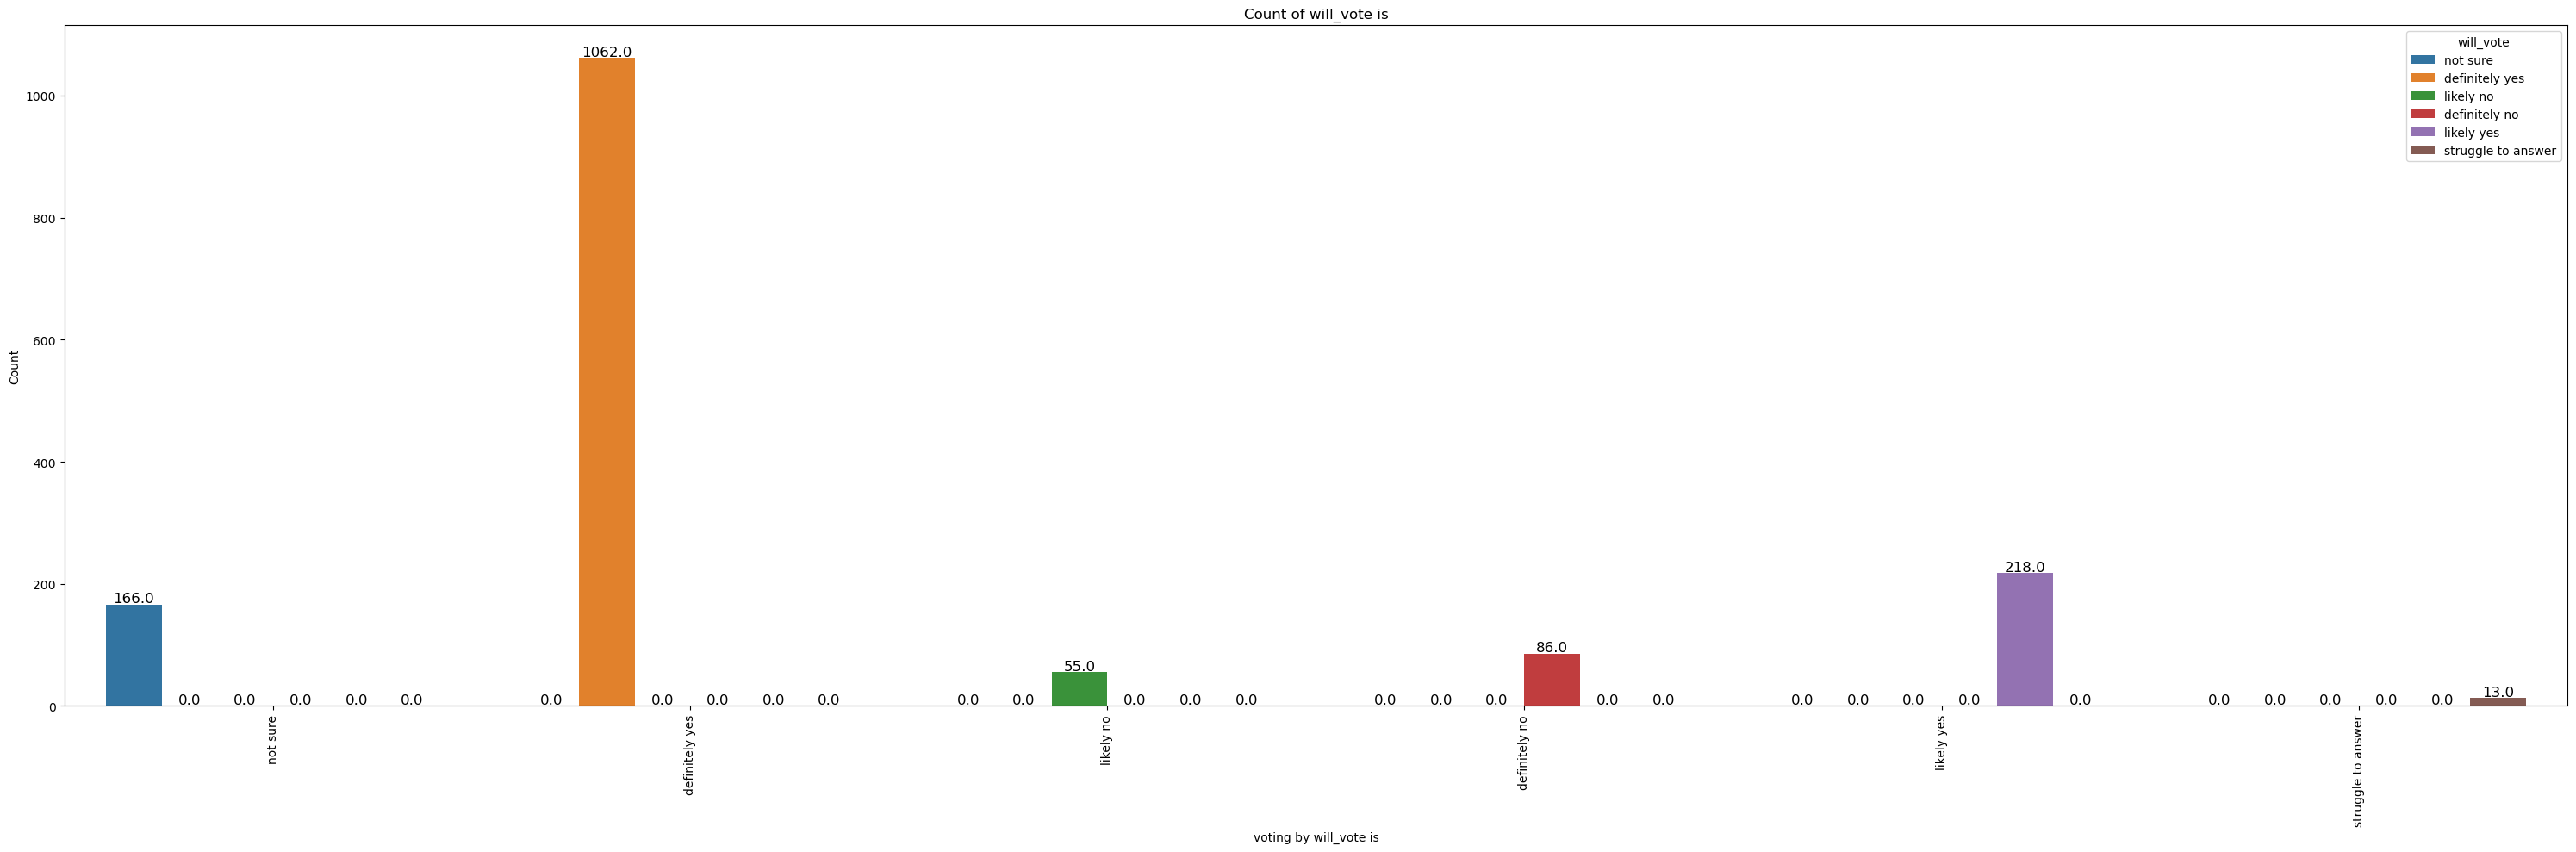

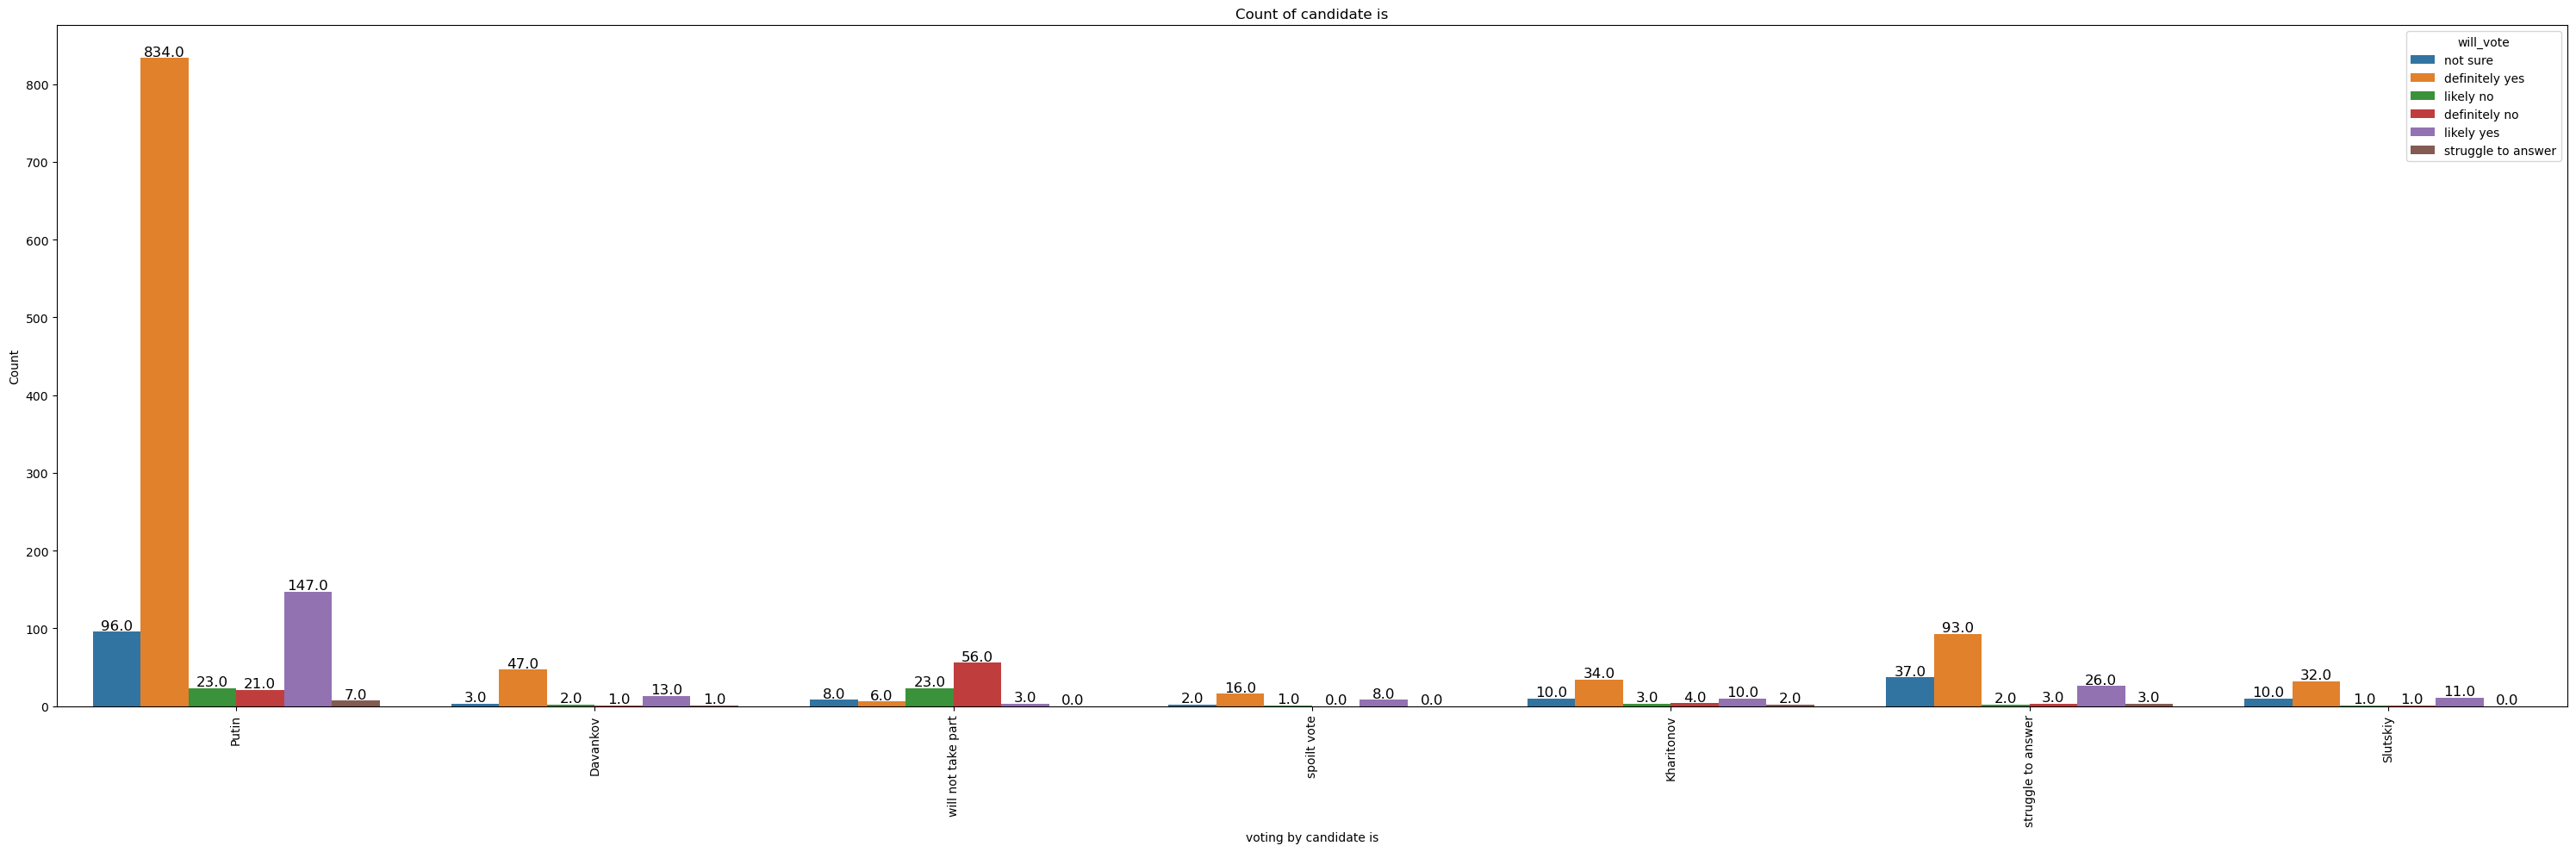

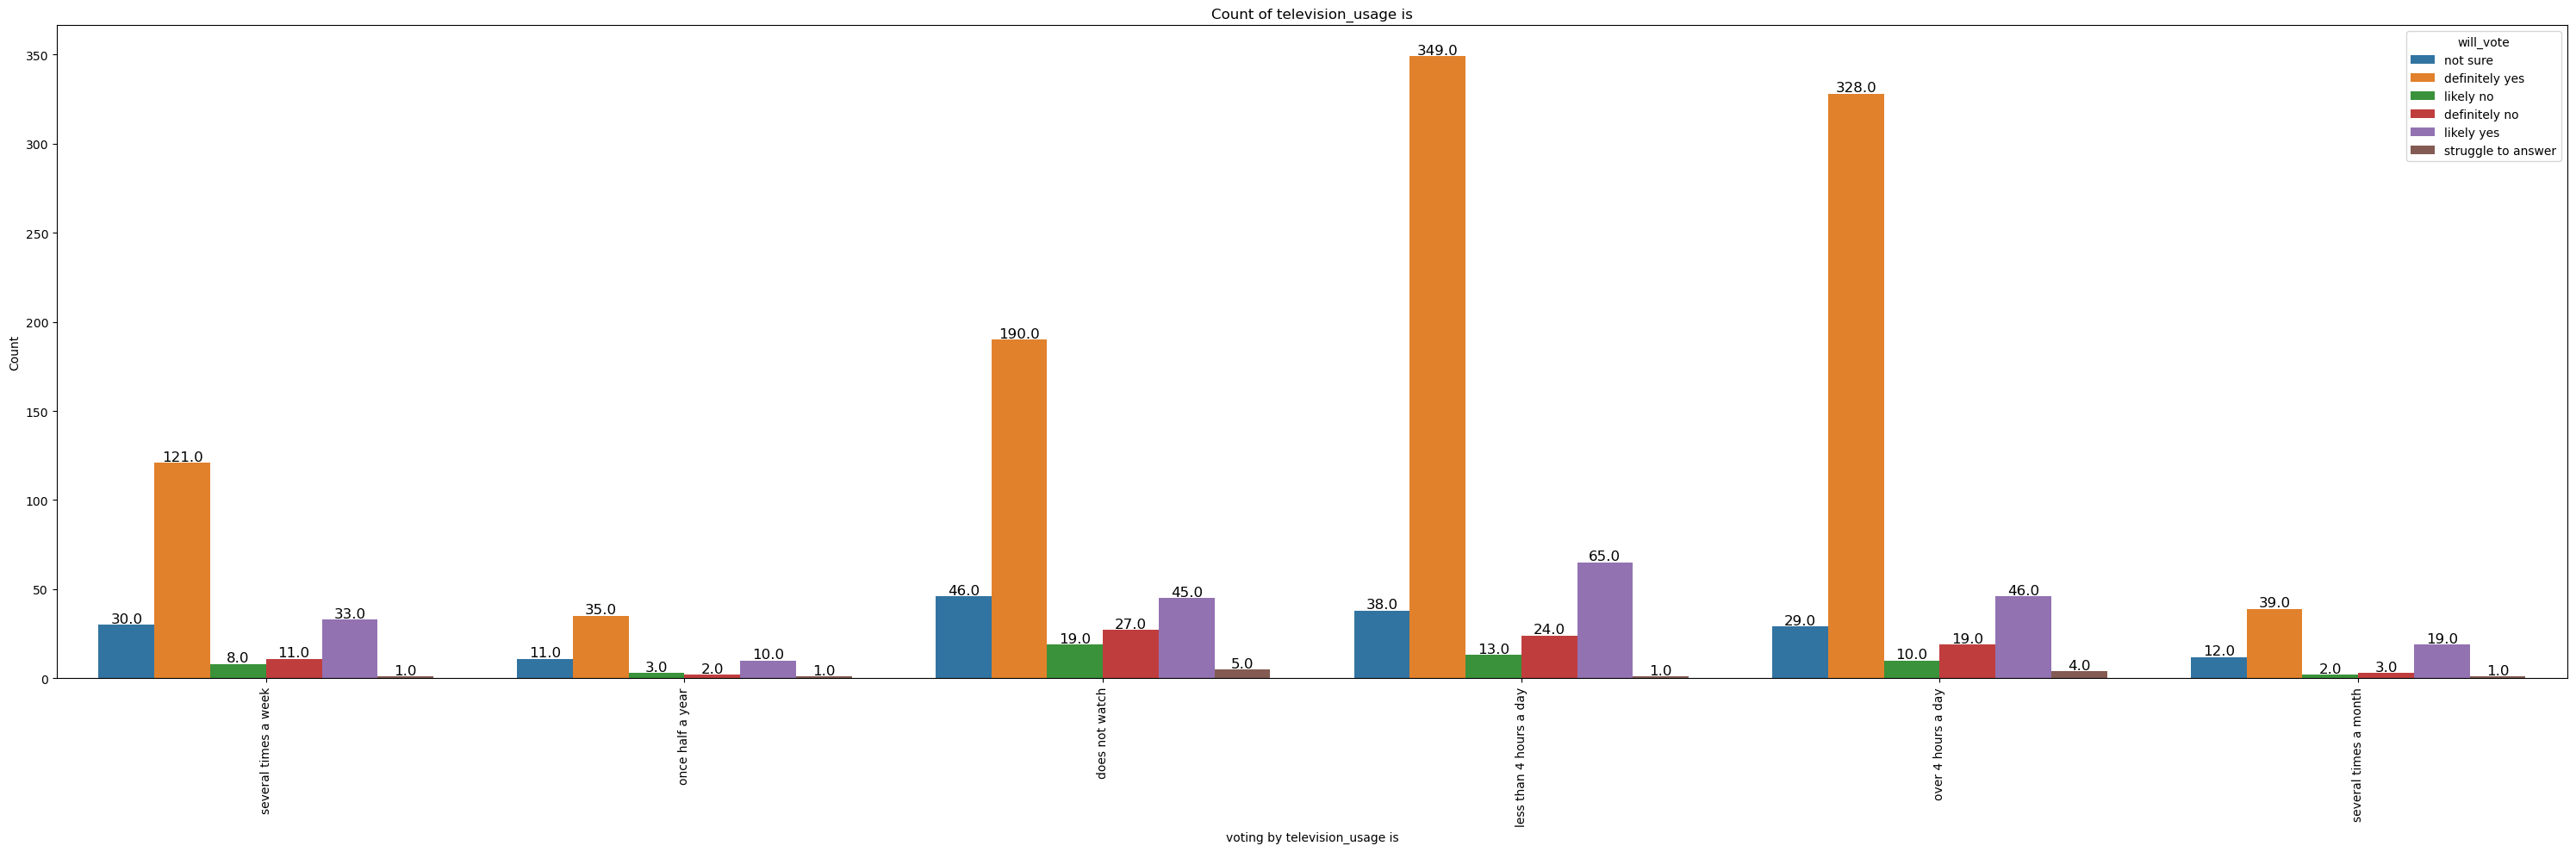

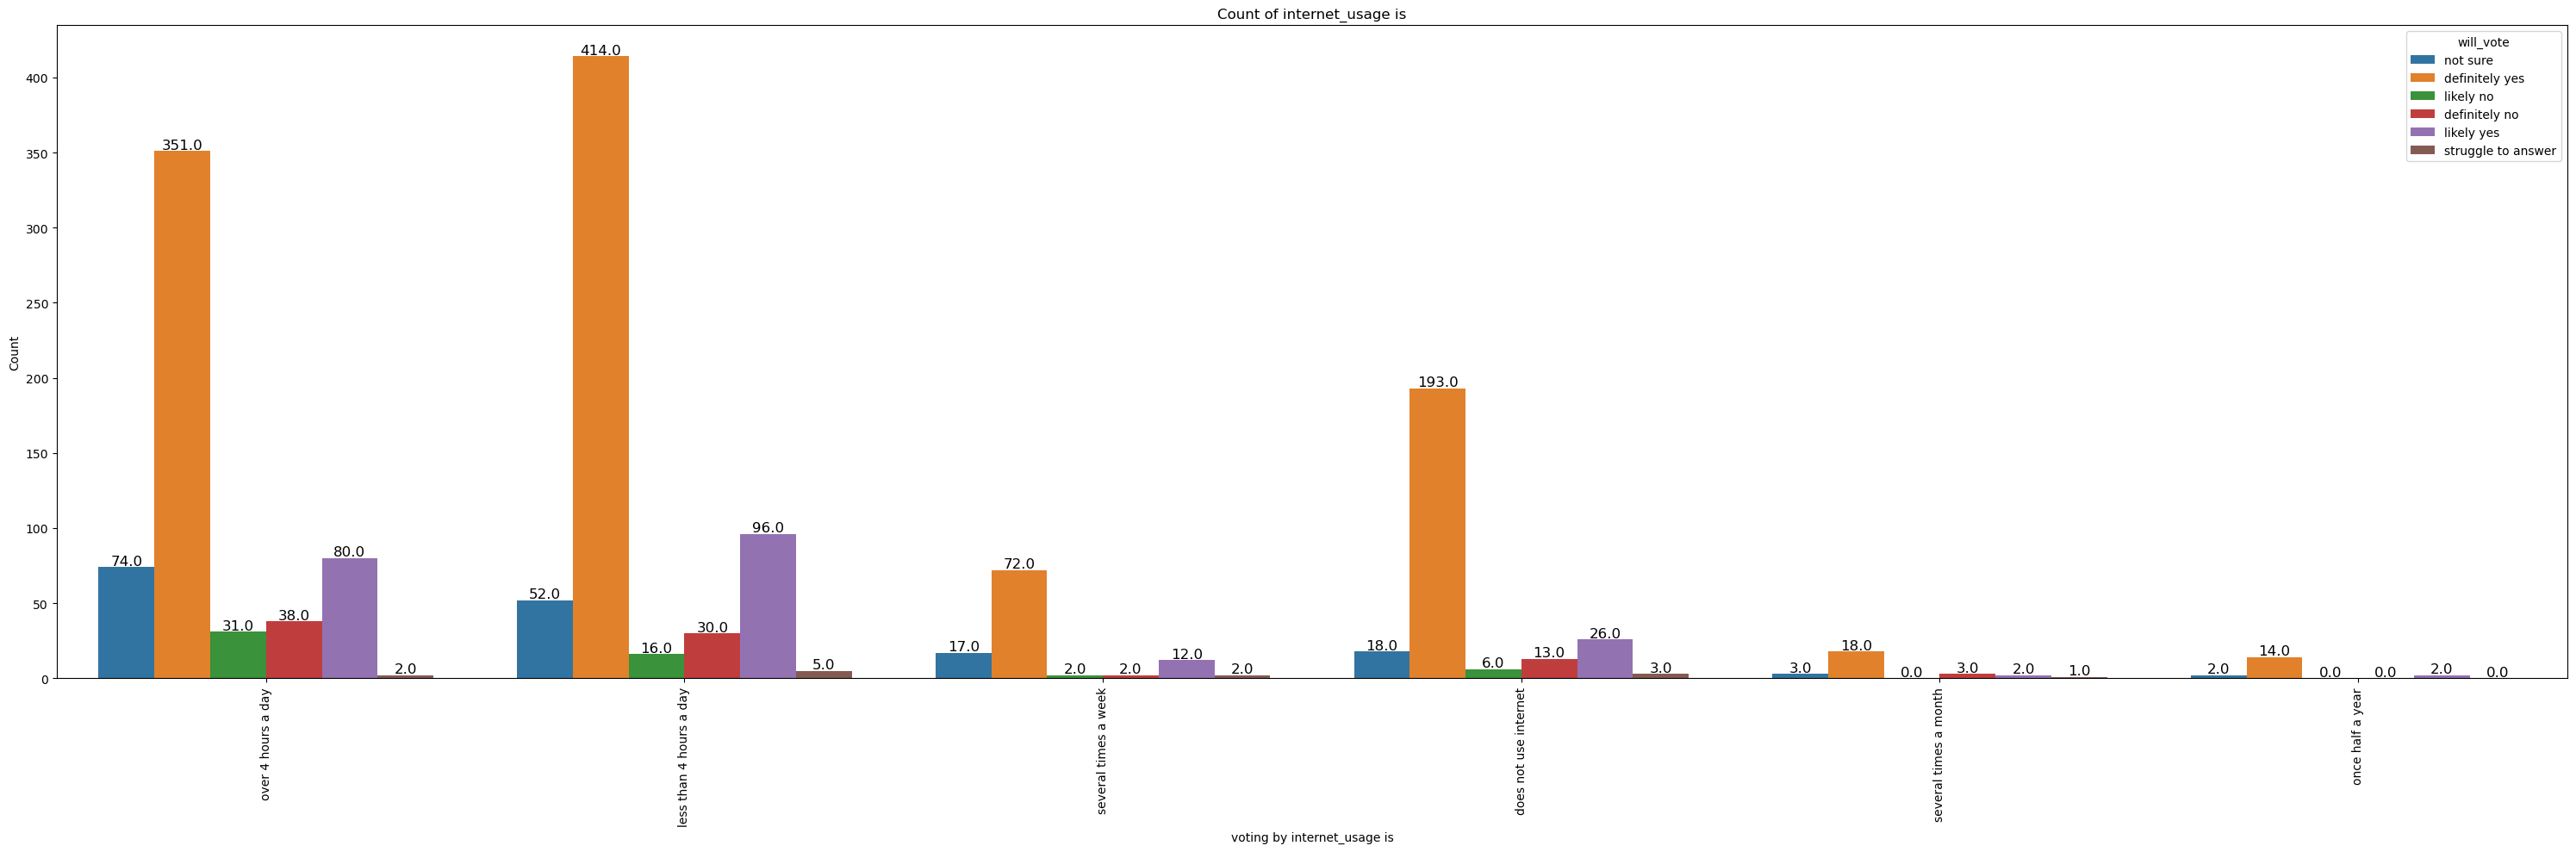

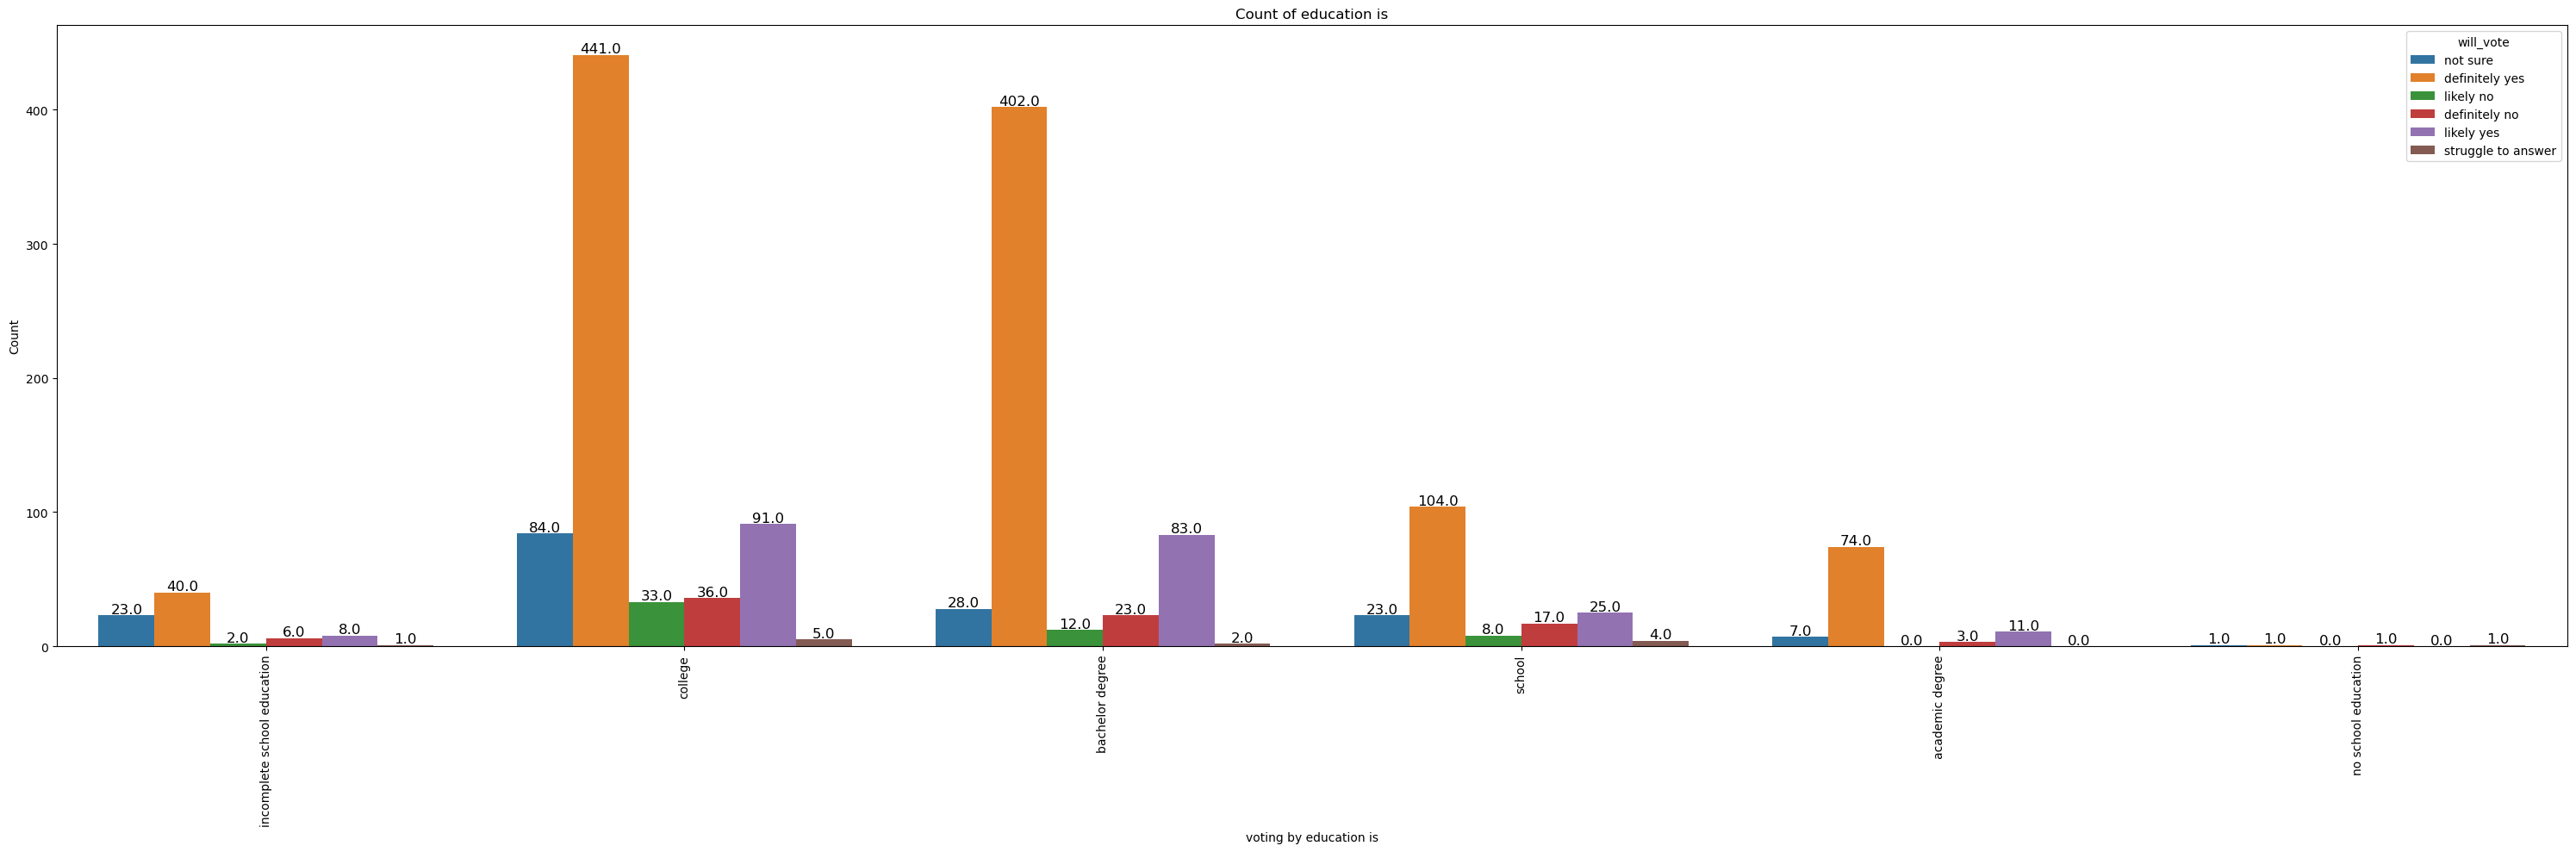

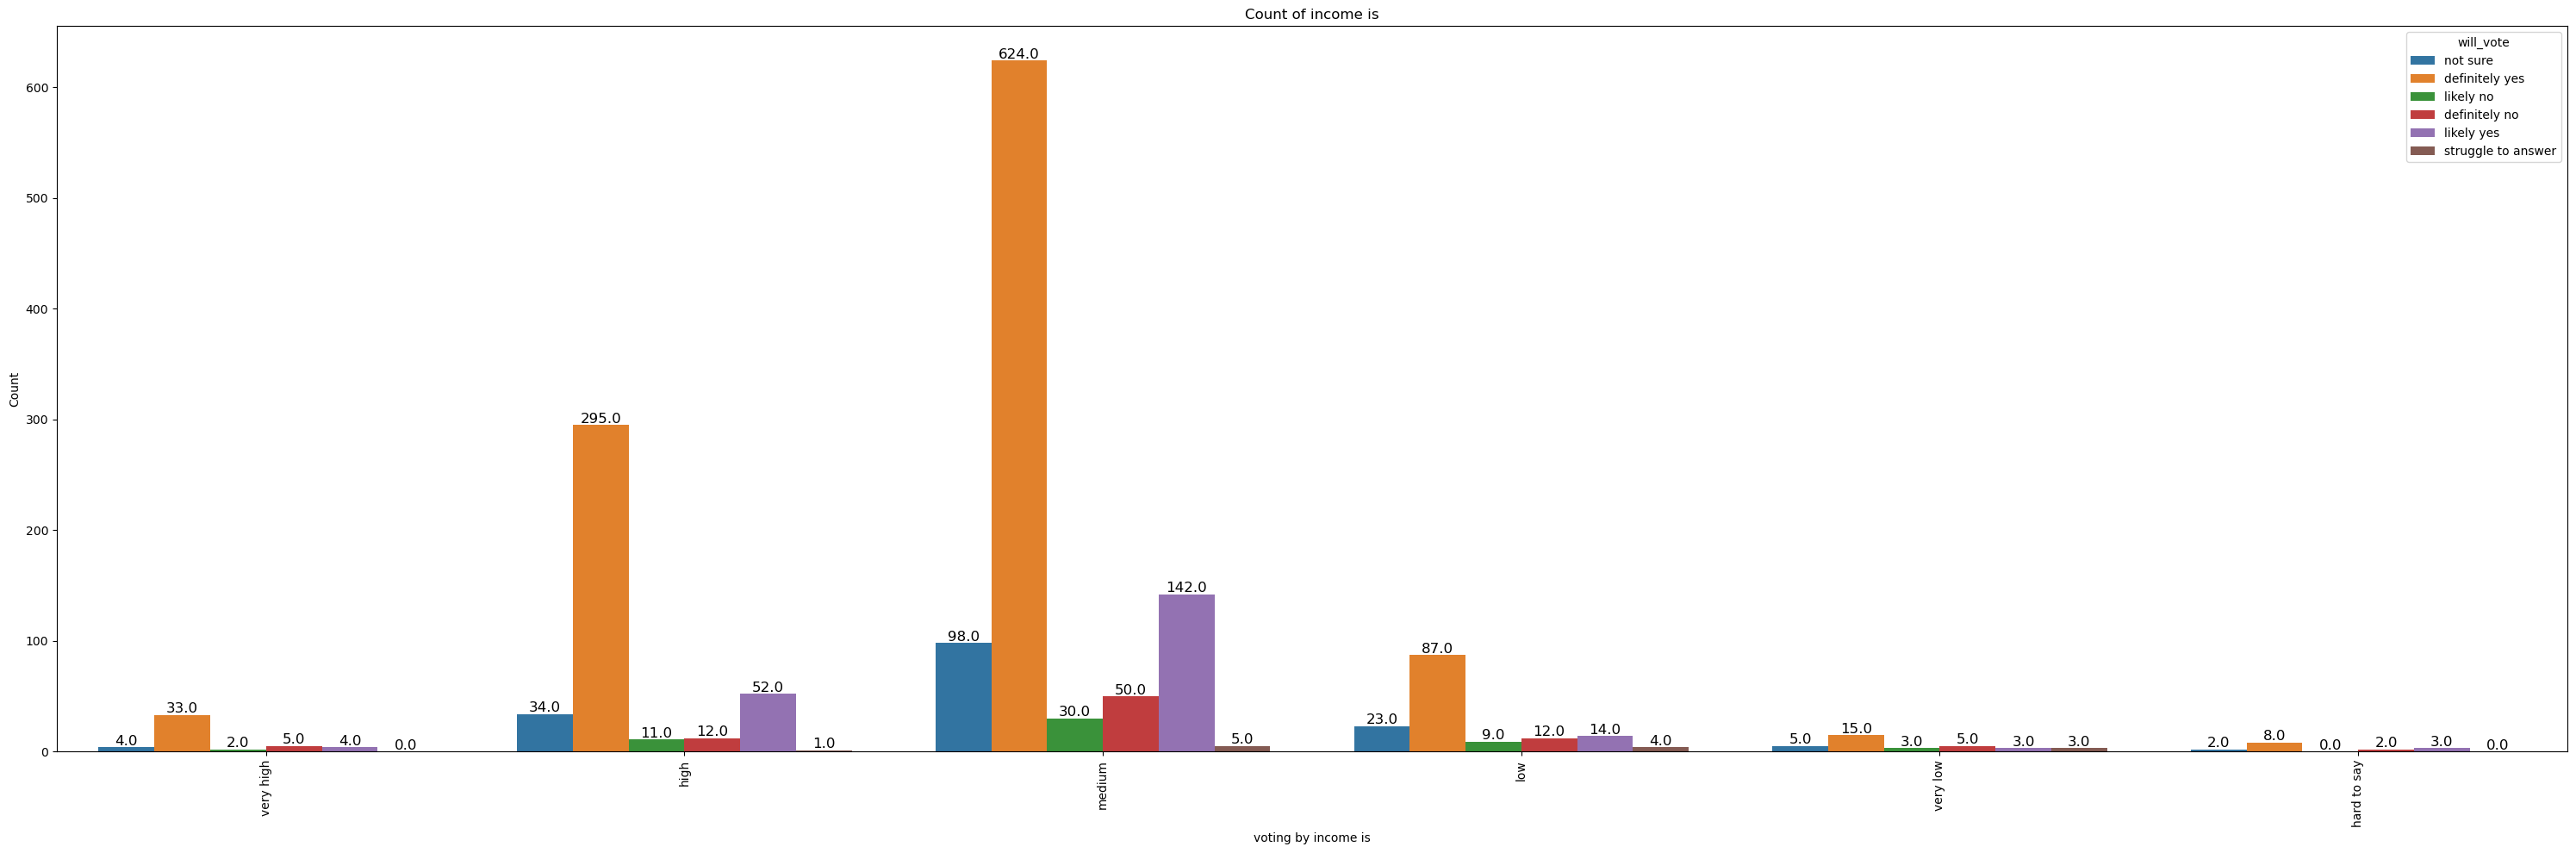

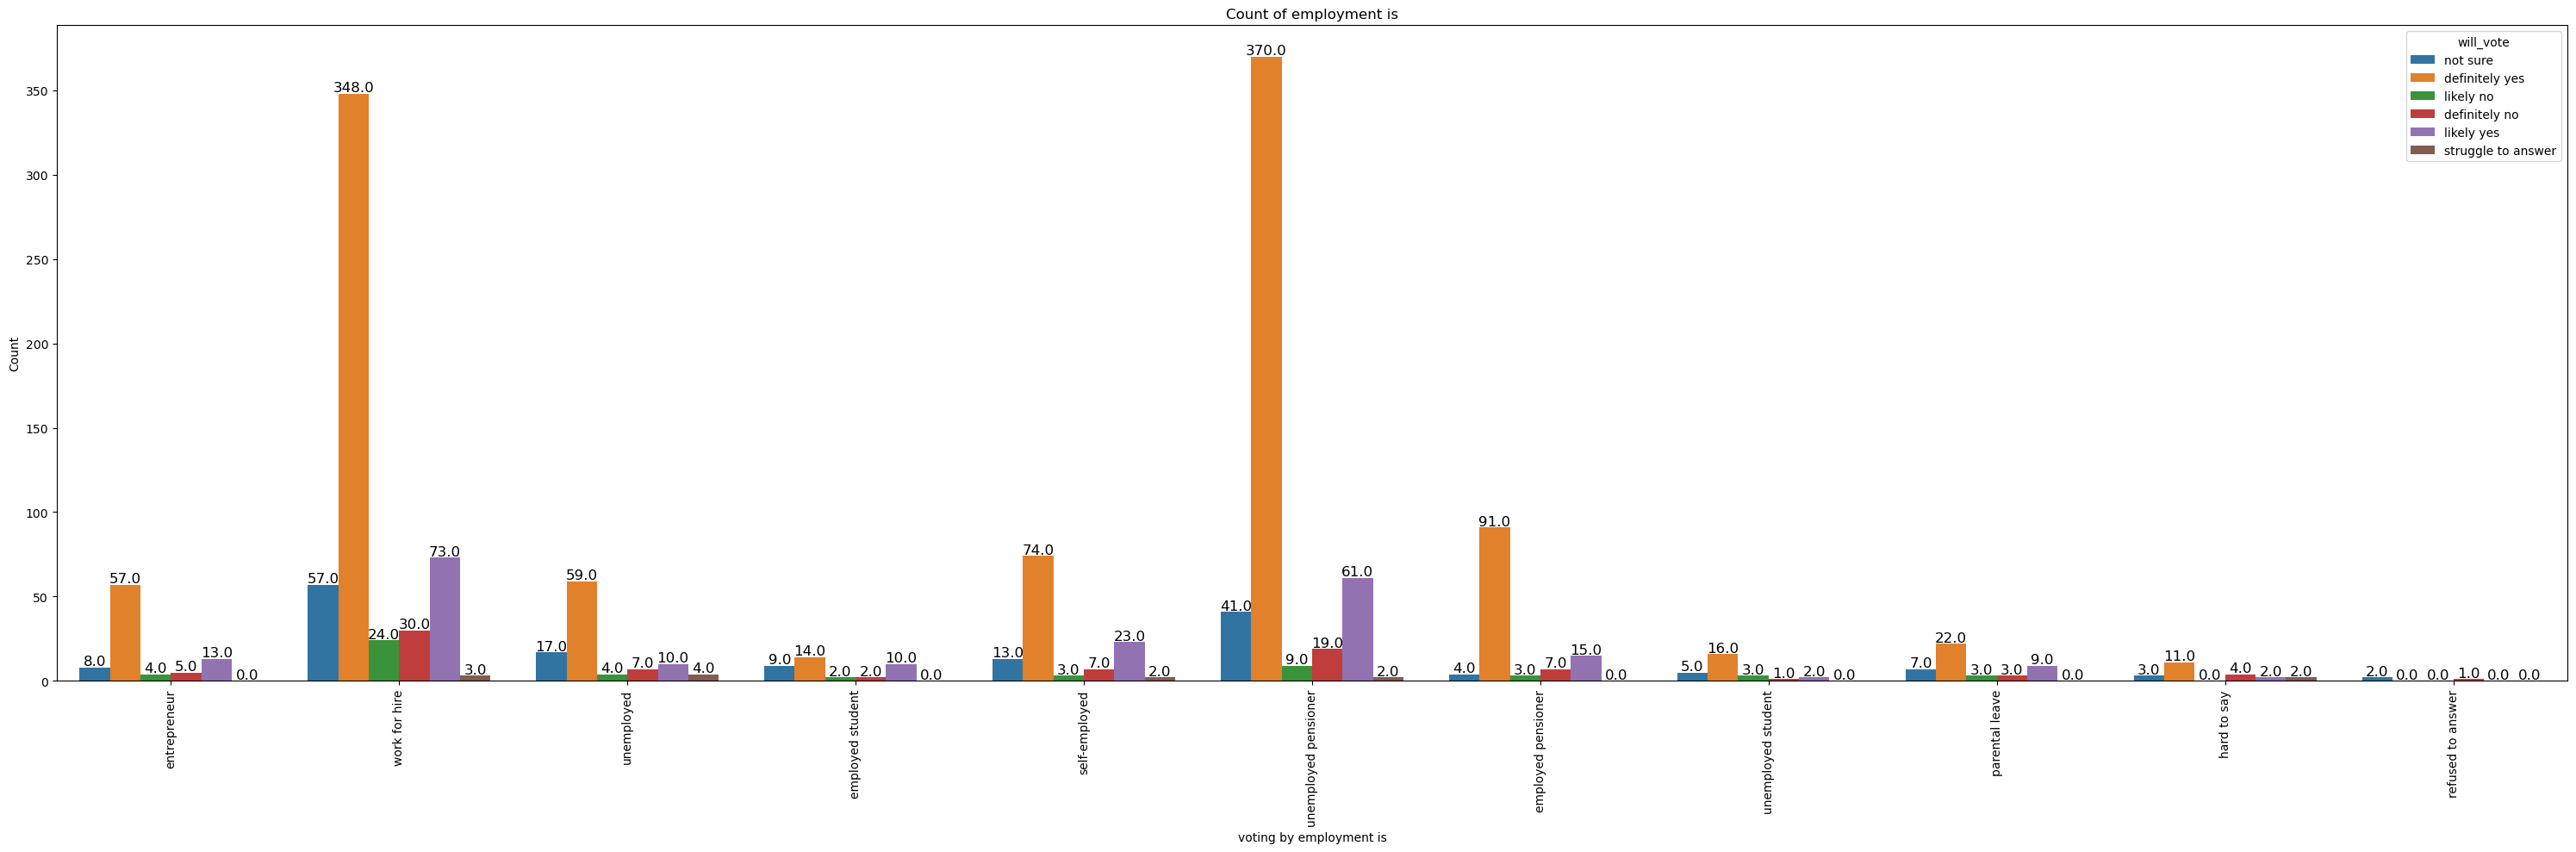

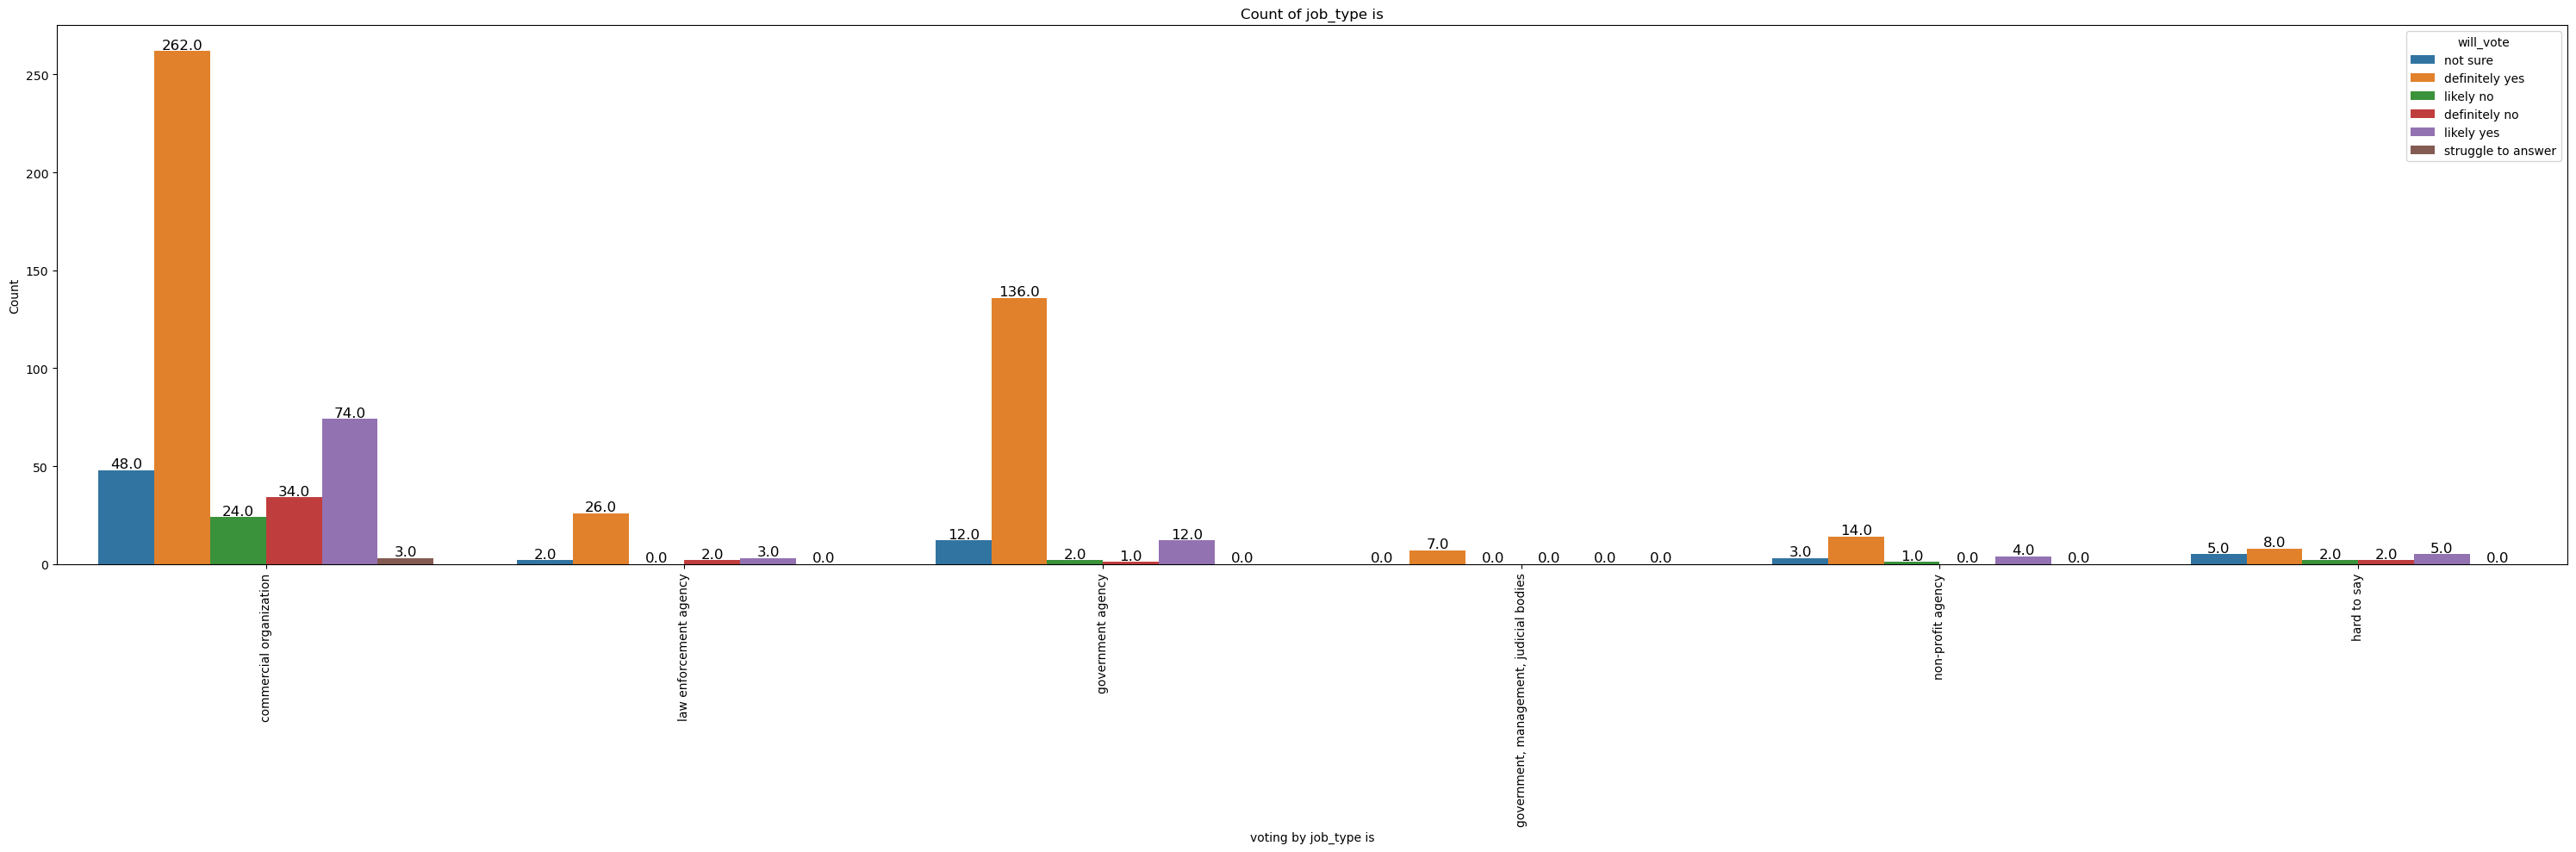

C:\Users\madhu\AppData\Local\Temp\ipykernel_26540\335282388.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


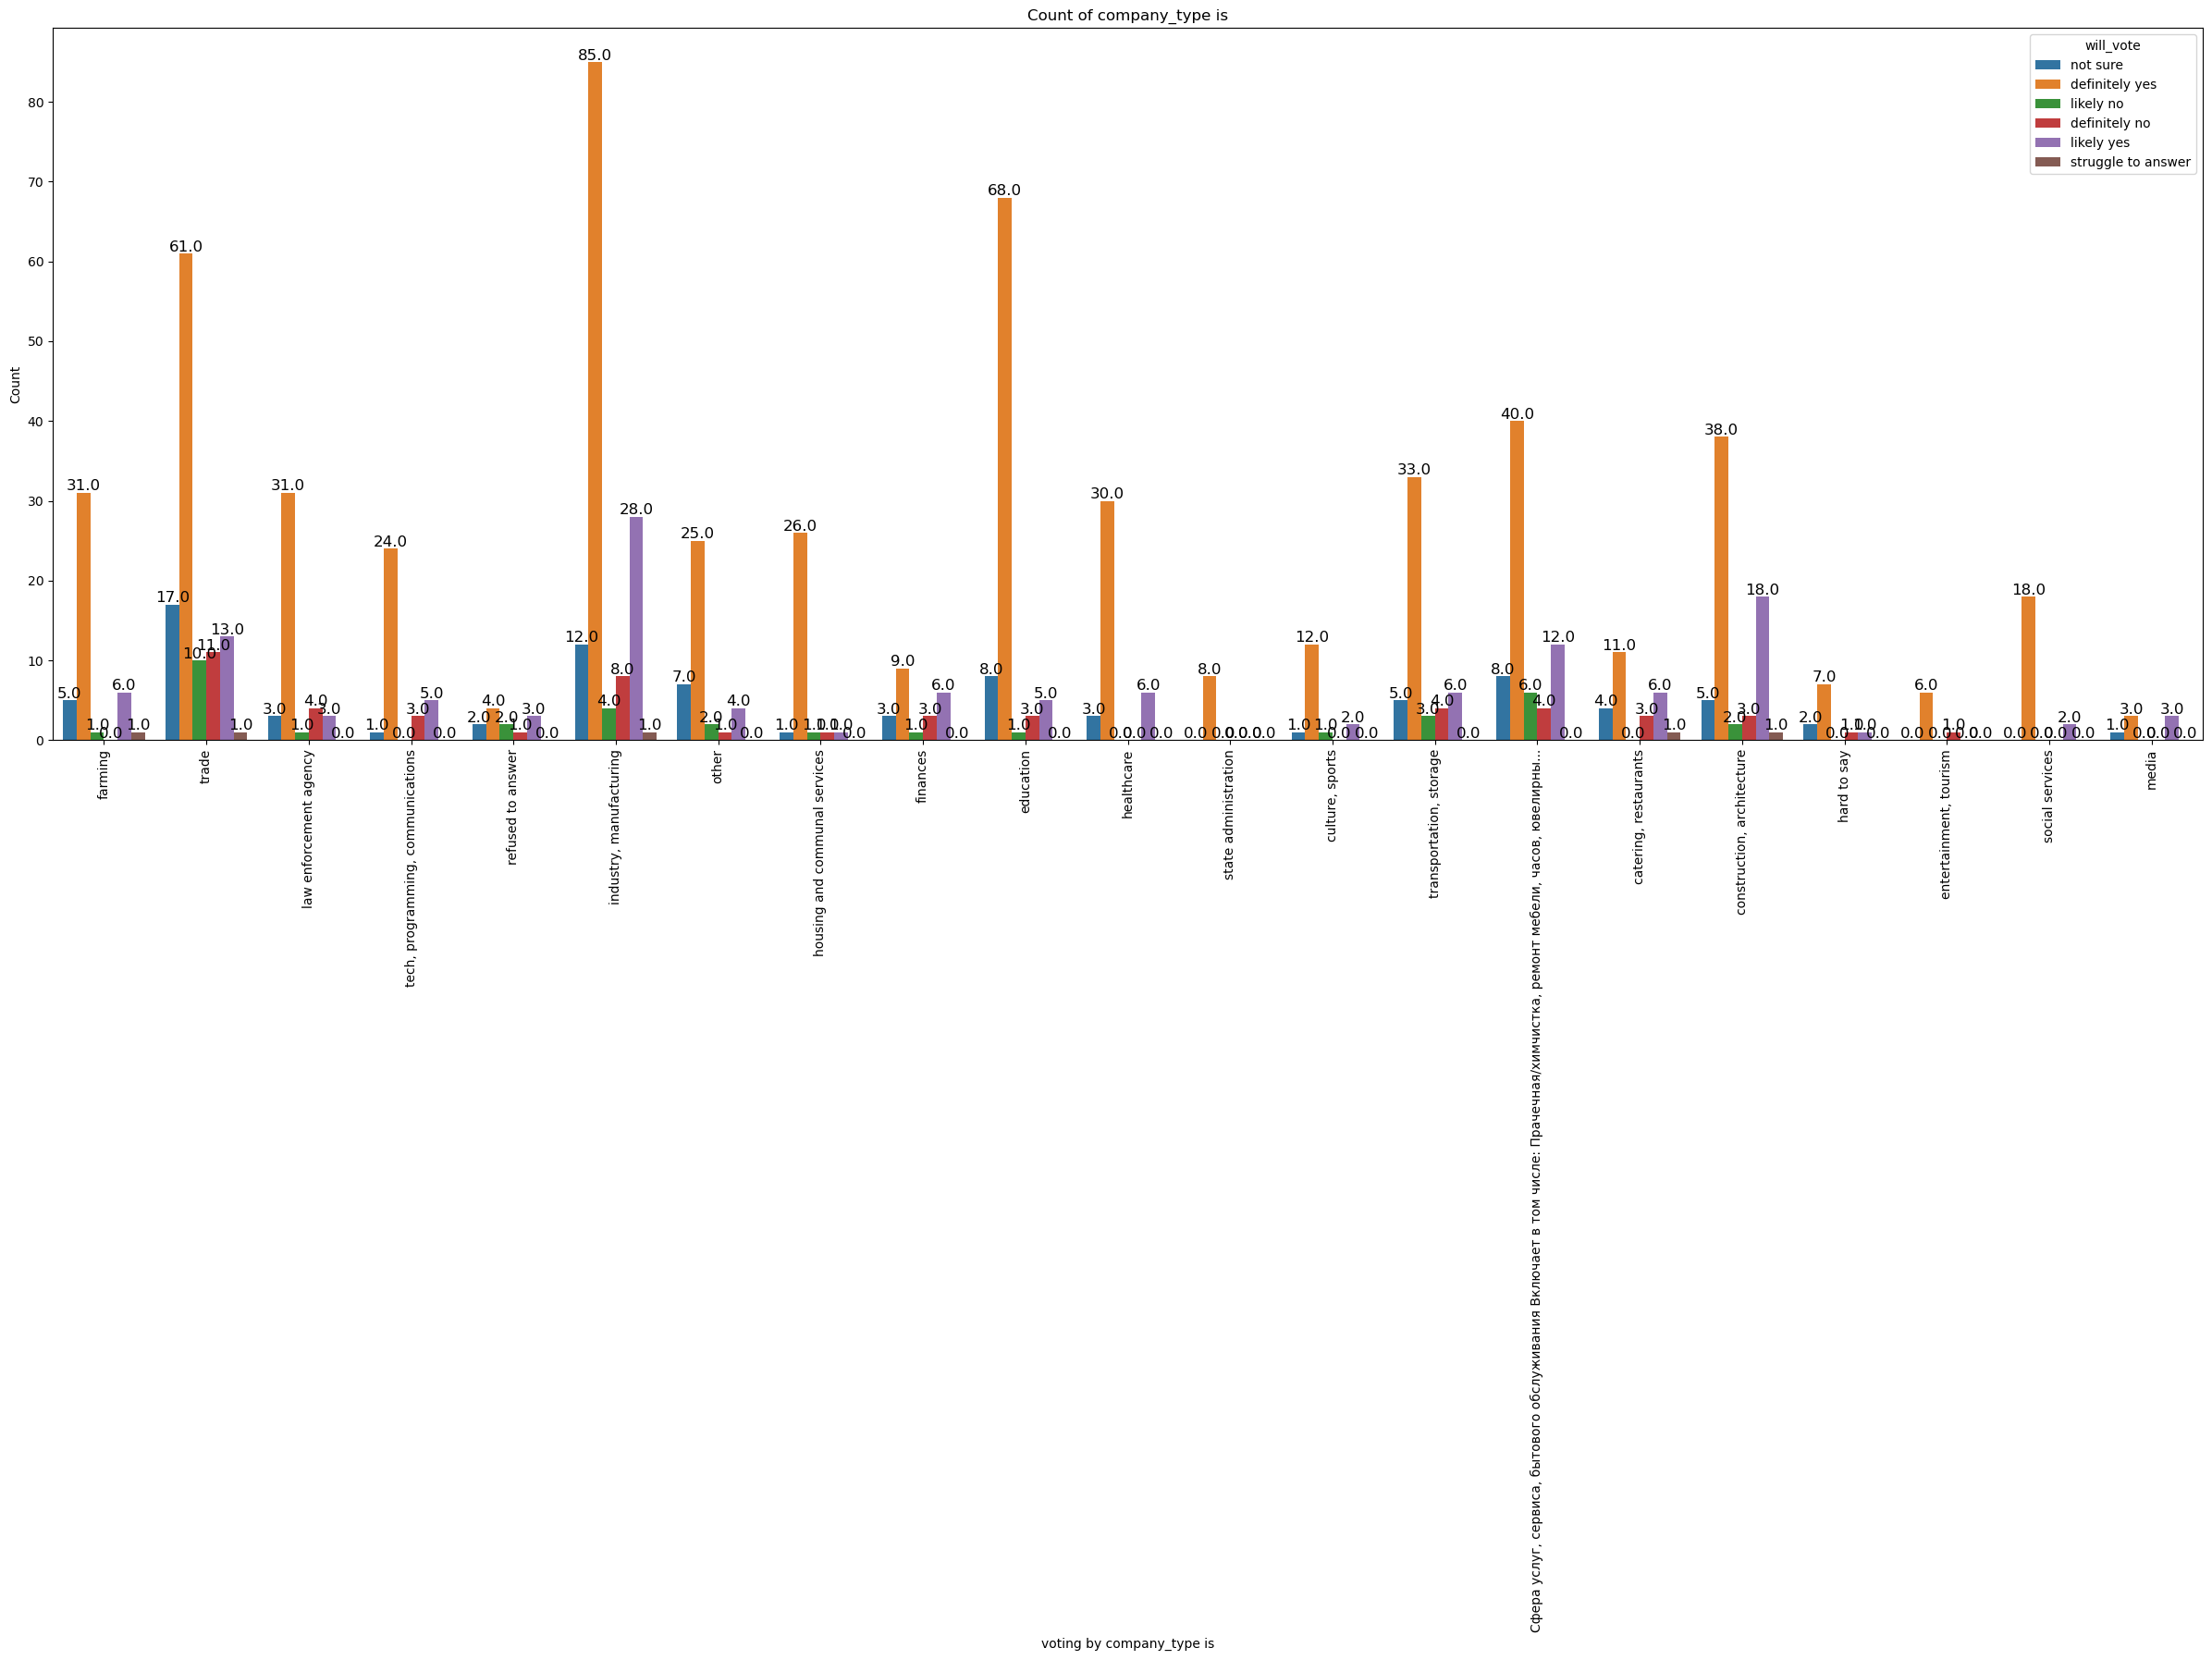

In [38]:
for col in cols:
    plt.figure(figsize=(30, 10))
    ax = sns.countplot(x=col, data=df,hue=df['will_vote']) #1=NO  #2=YES
    
    # Annotate the count plot
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
    
    plt.title(f'Count of {col} is')
    plt.xlabel(f'voting by {col} is')
    plt.xticks(rotation=90)
    plt.ylabel('Count')
    plt.tight_layout() 
    plt.show()

C:\Users\madhu\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\madhu\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Text(0.5, 1.0, 'voting by Age Group ')

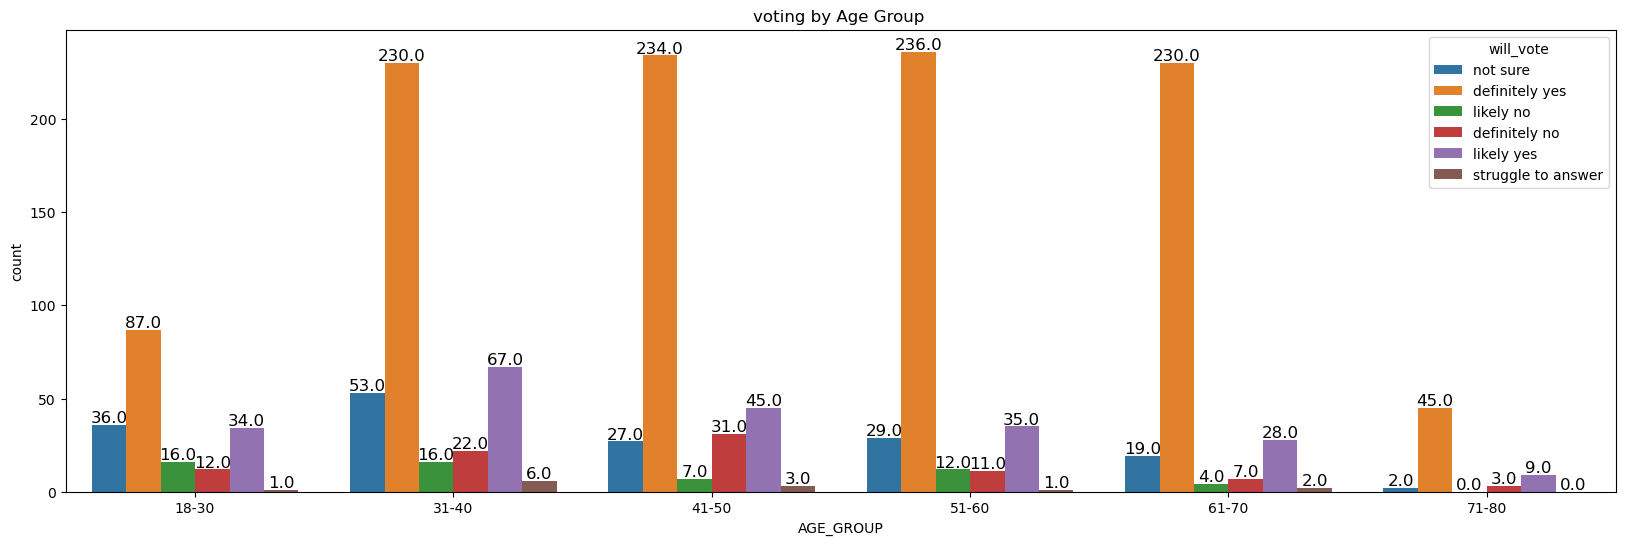

In [40]:
age_labels = ['18-30','31-40', '41-50', '51-60', '61-70', '71-80']
df['AGE_GROUP'] = pd.cut(df['age'], bins=6, labels=age_labels, right=False)
plt.figure(figsize=(20, 6))
ax = sns.countplot(x='AGE_GROUP',data=df,hue=df['will_vote'])

# Annotate the count plot
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('voting by Age Group ')

In [46]:
#target candidate

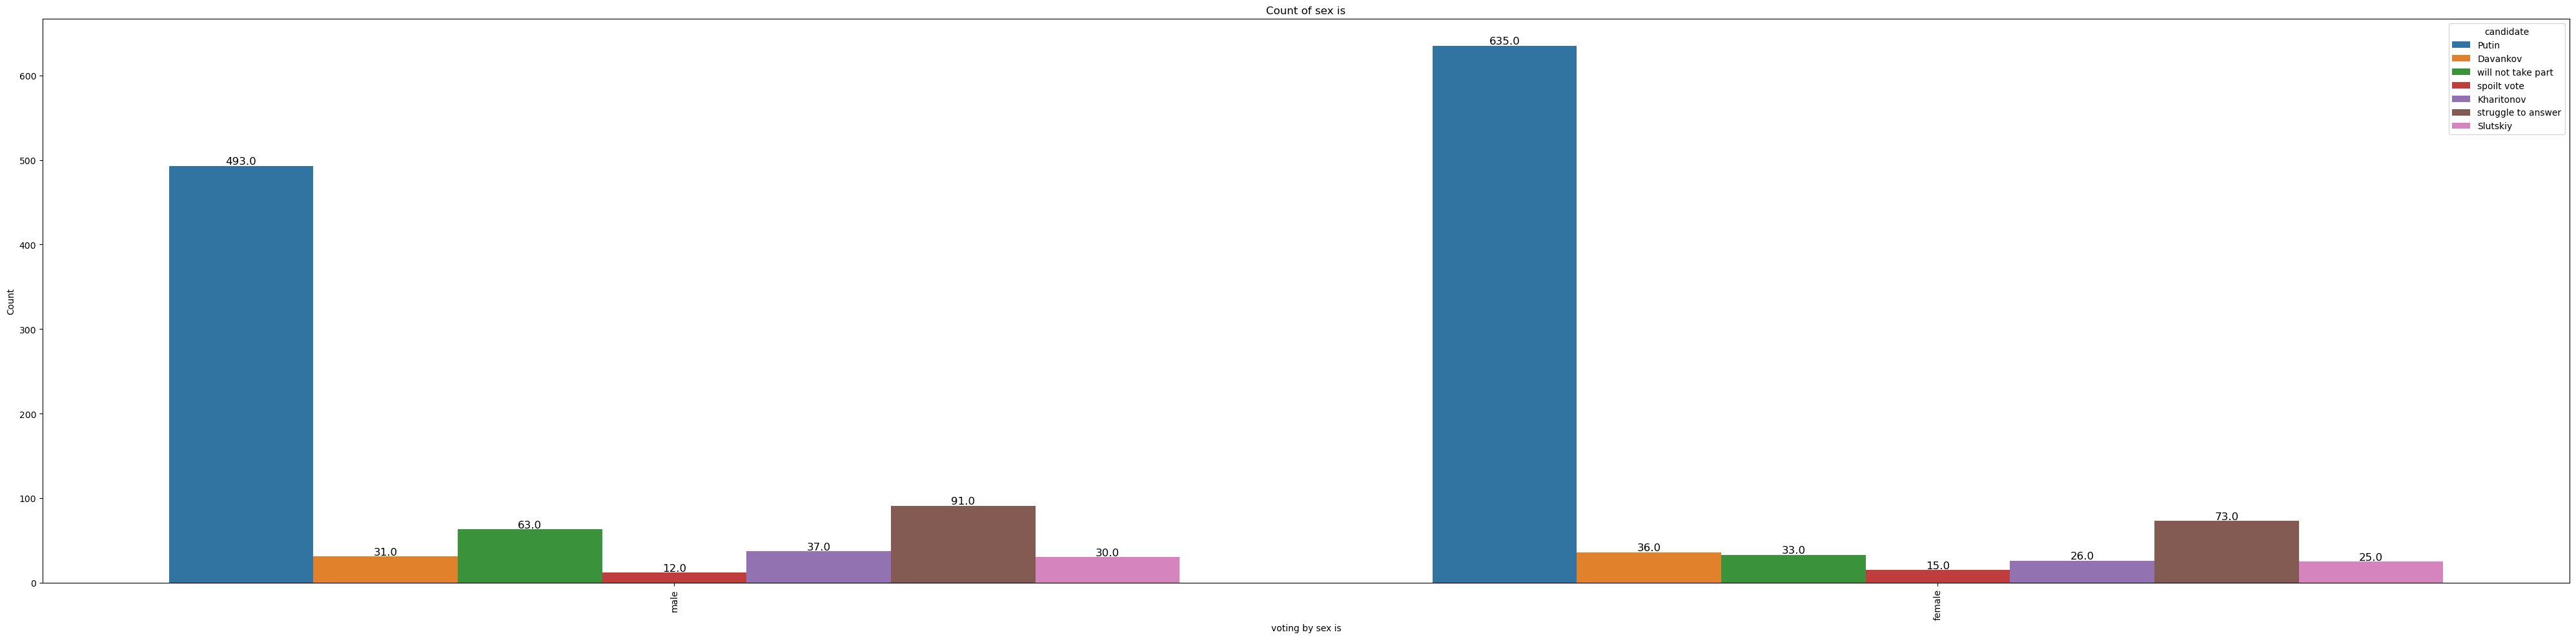

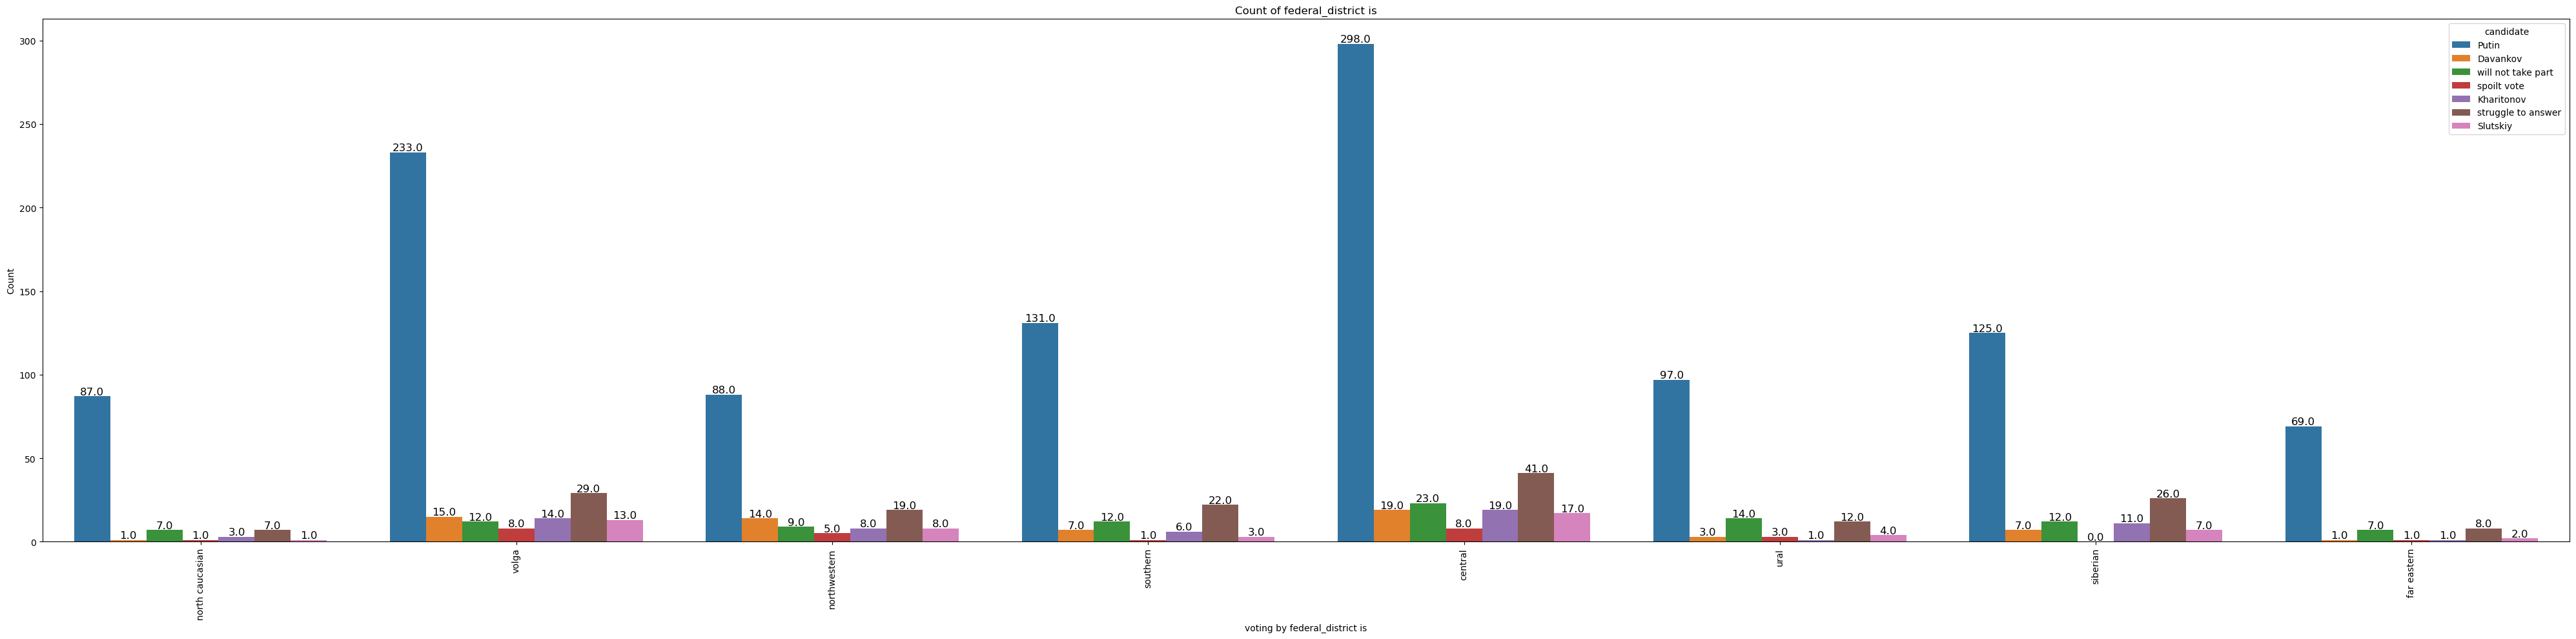

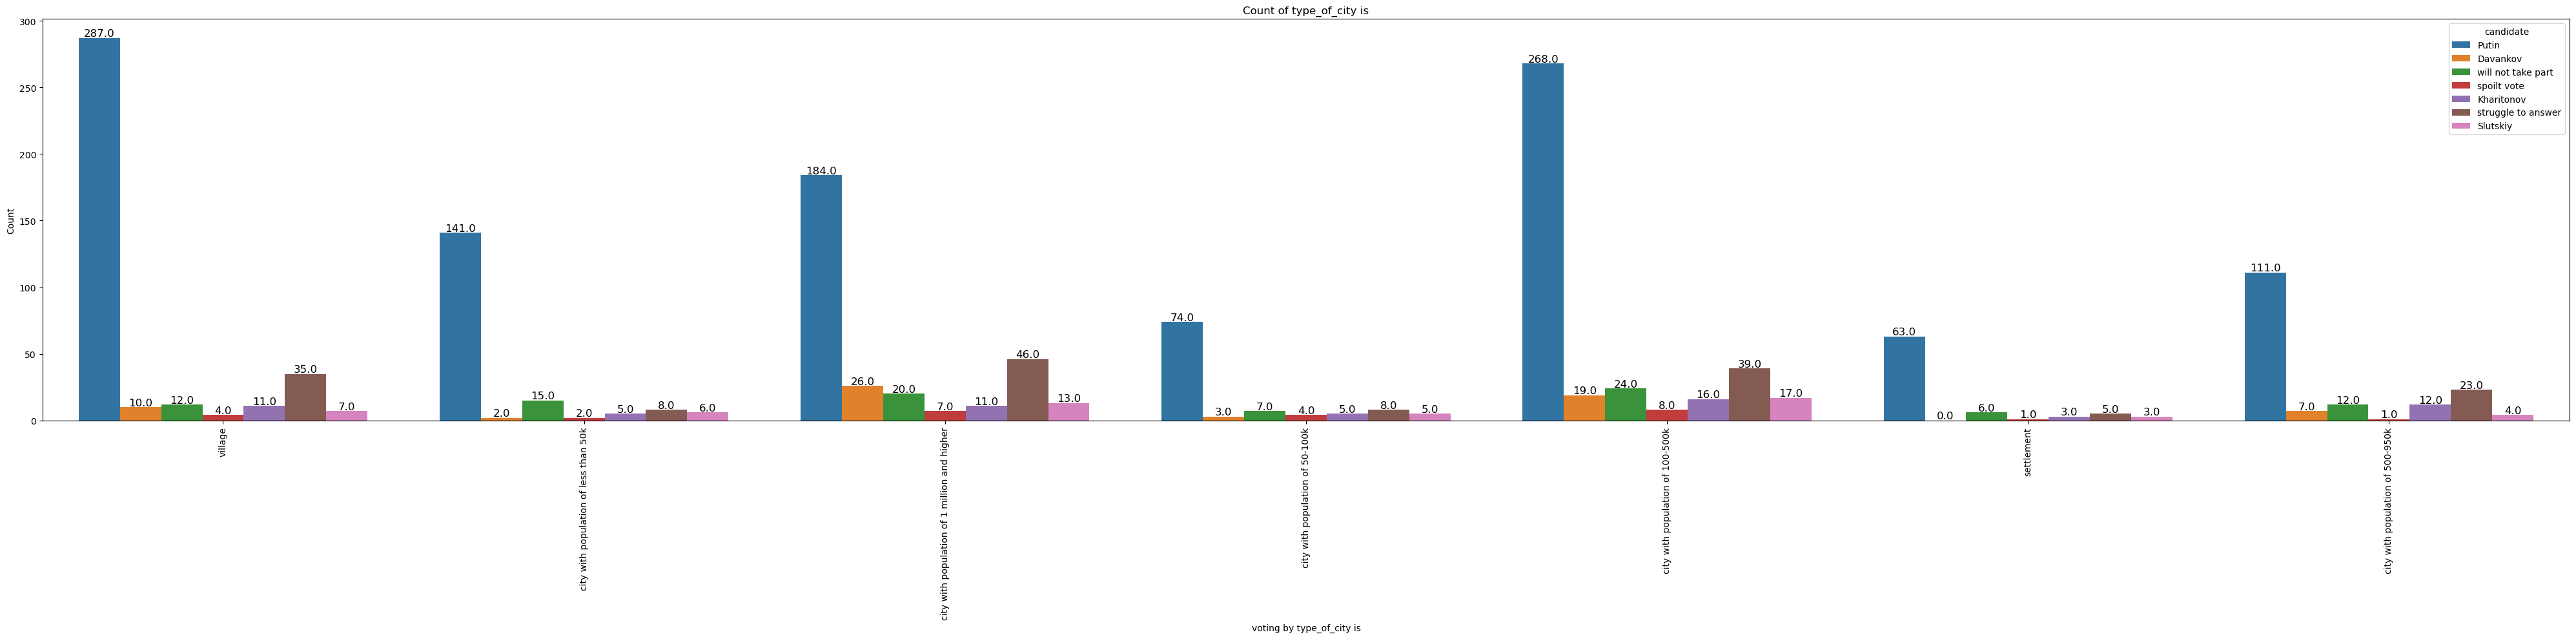

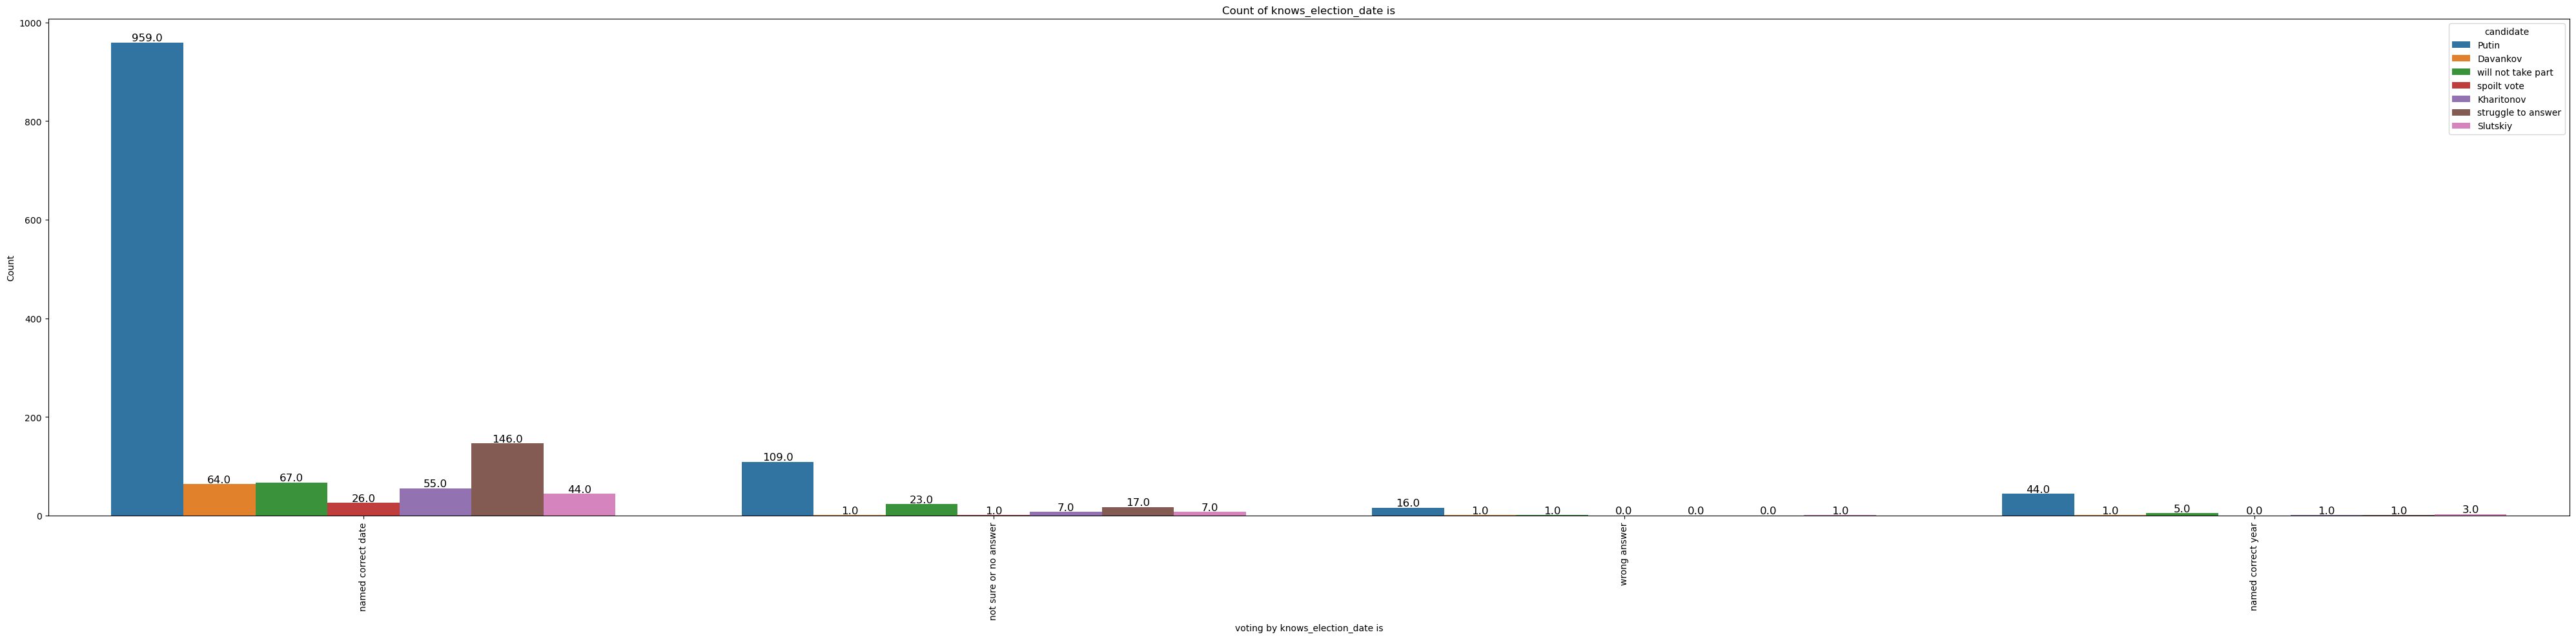

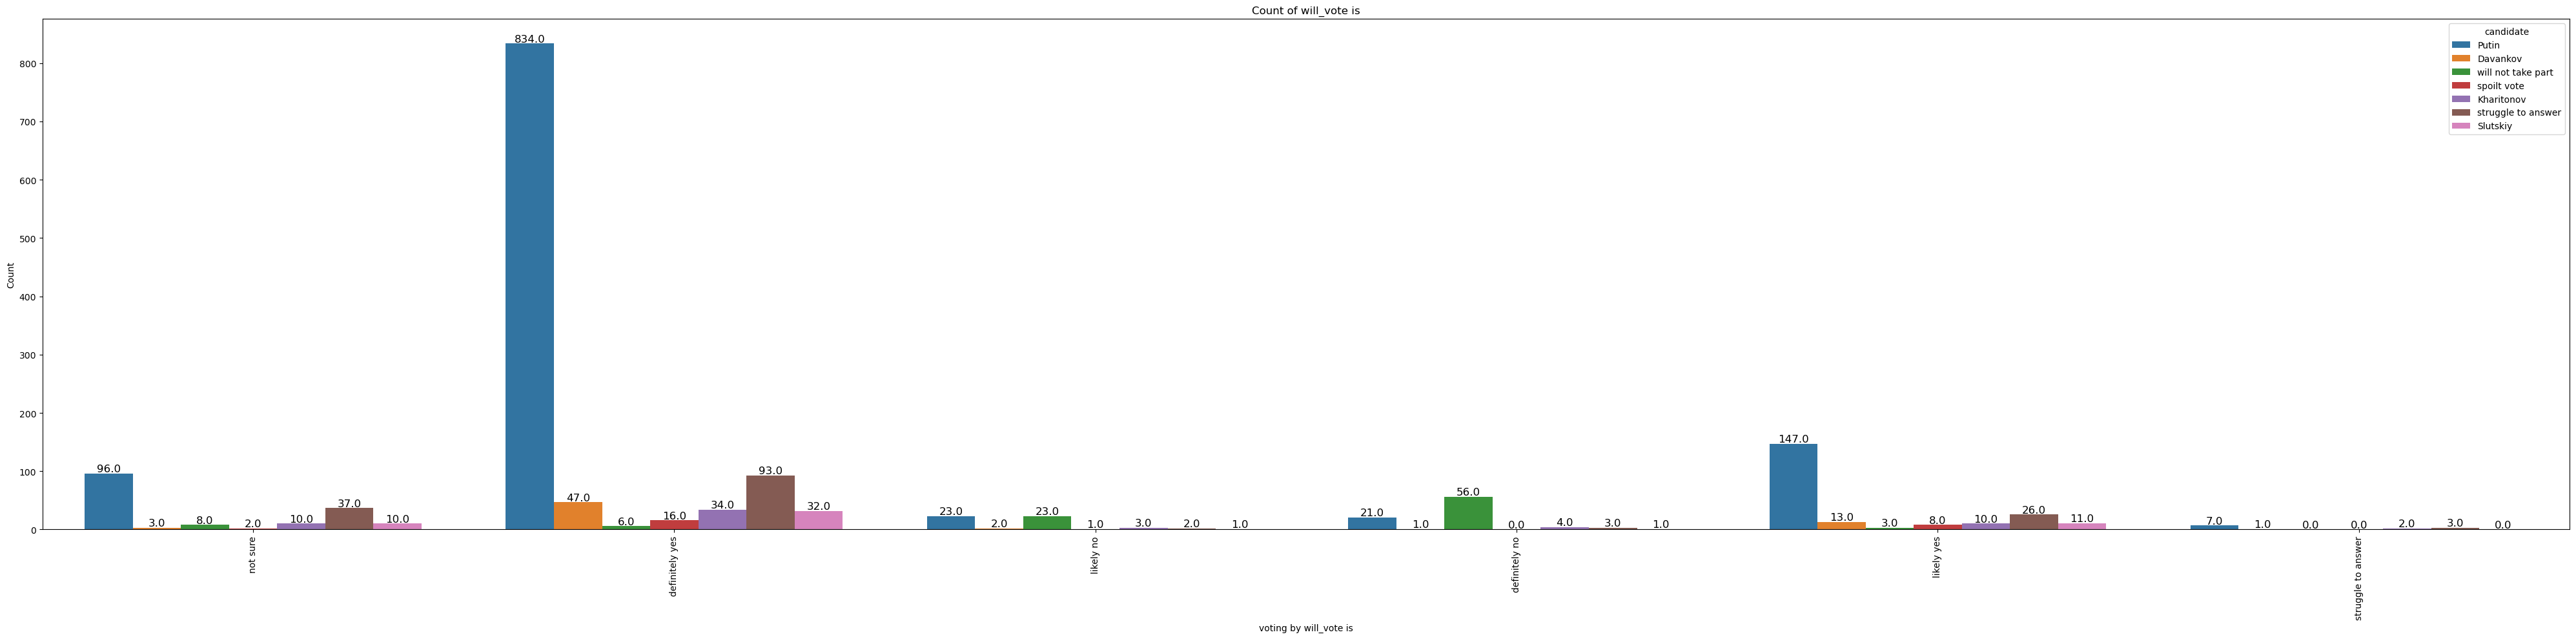

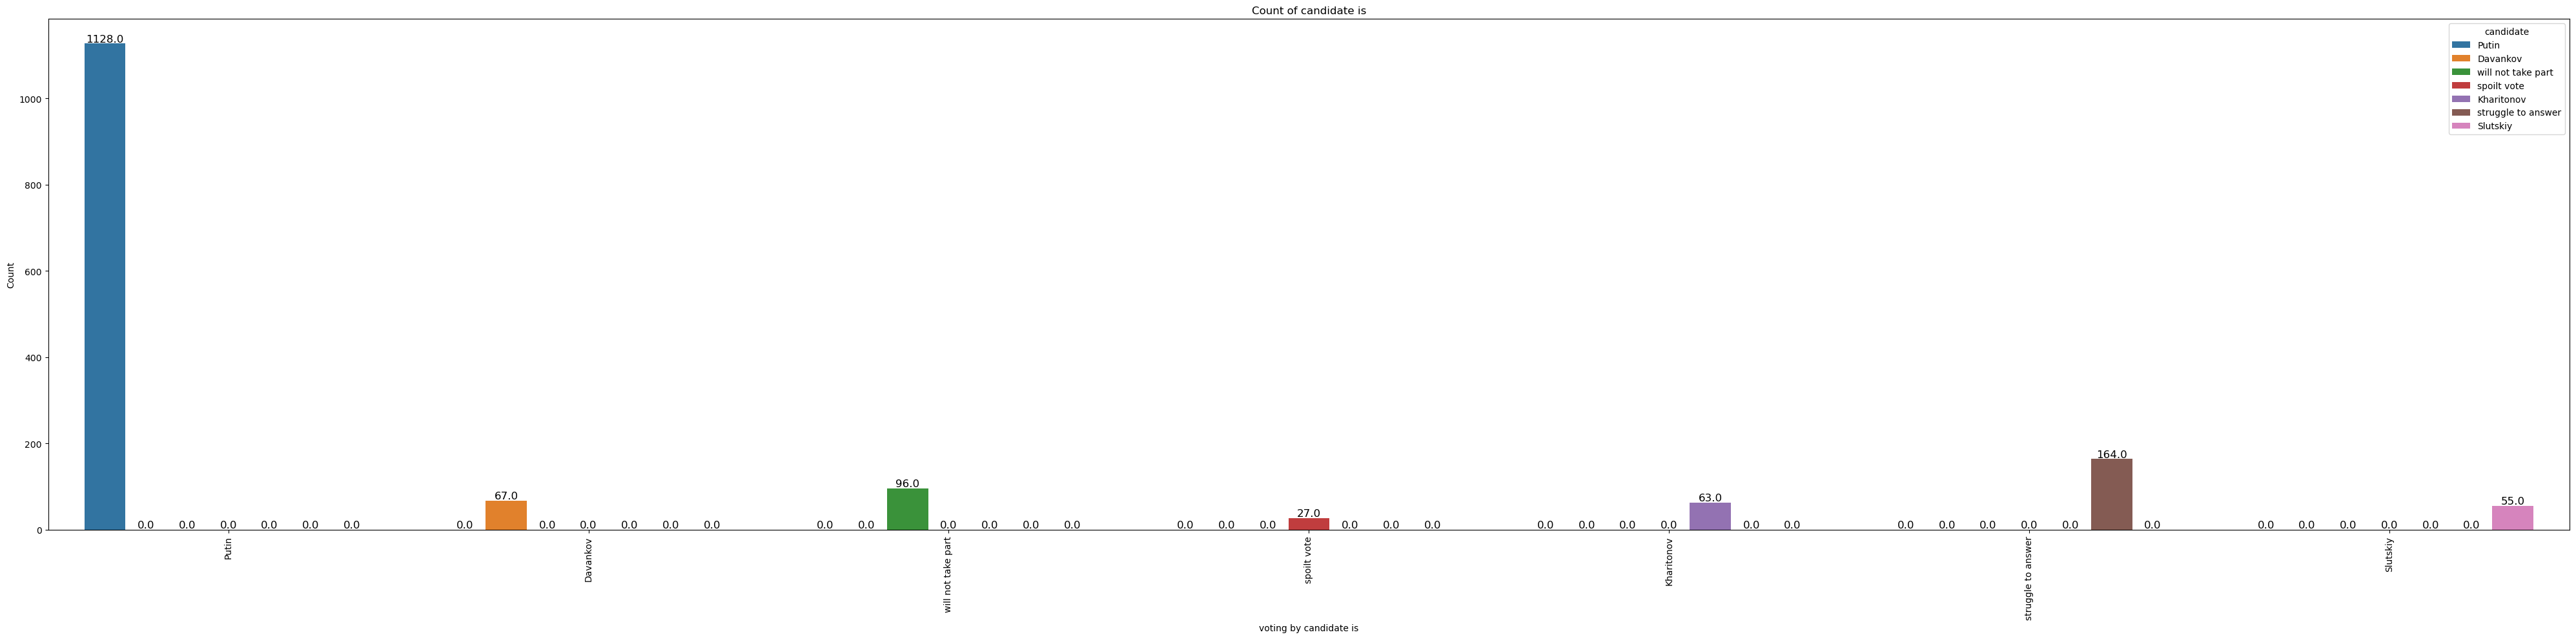

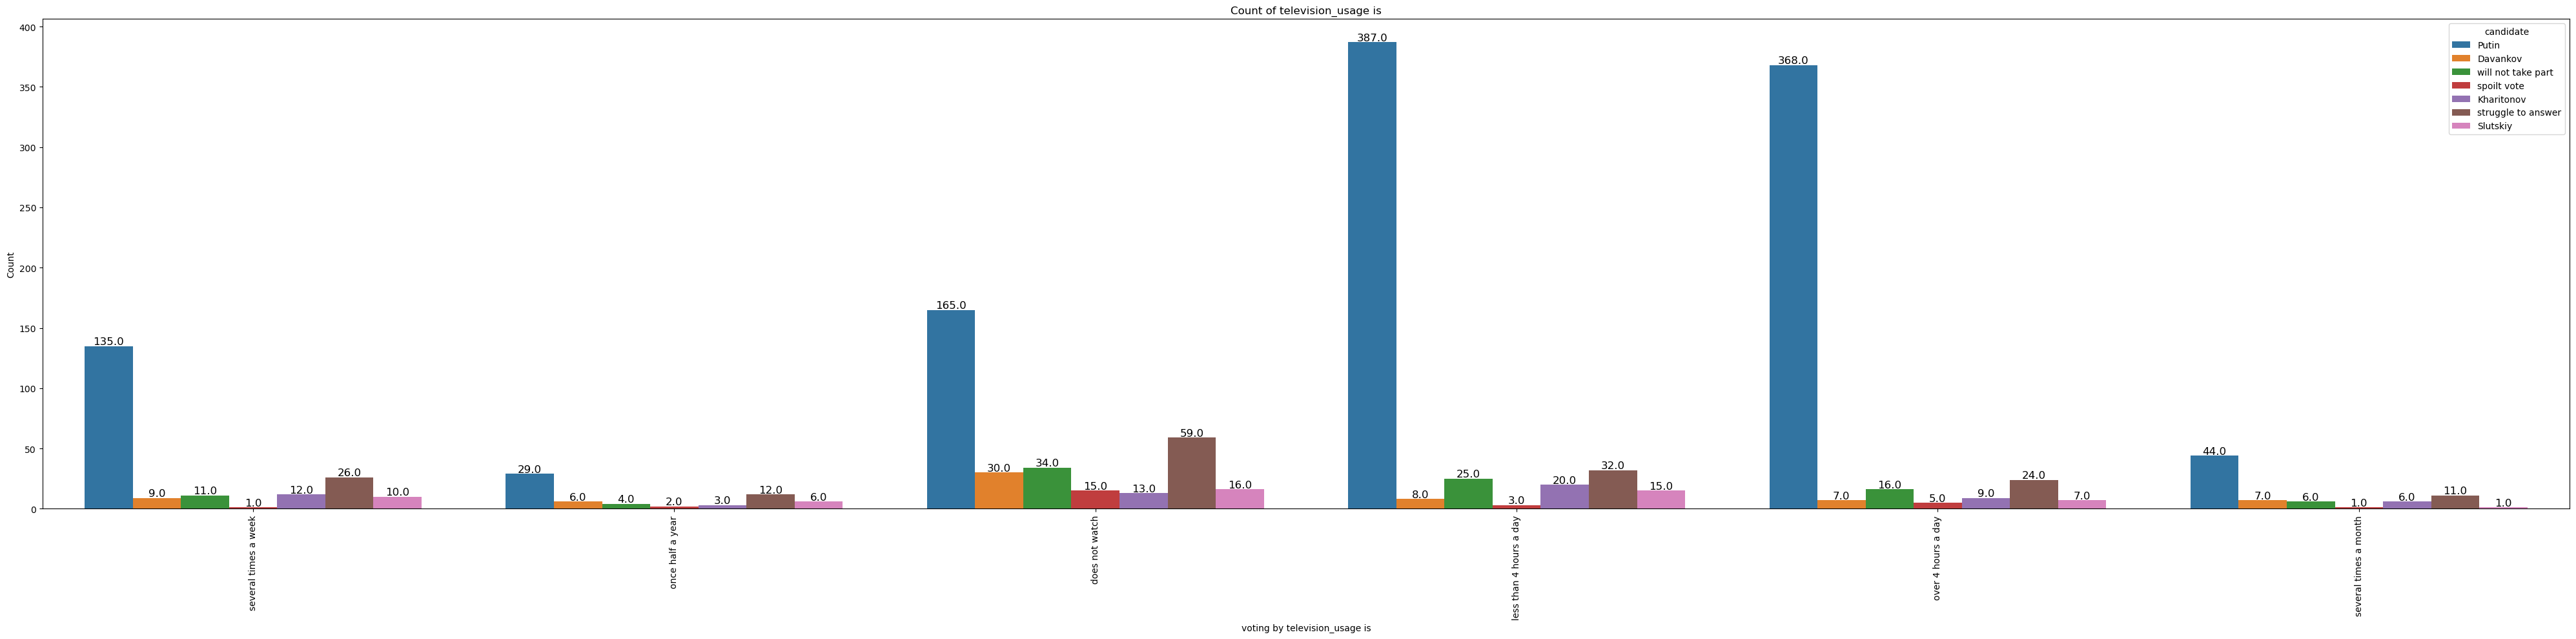

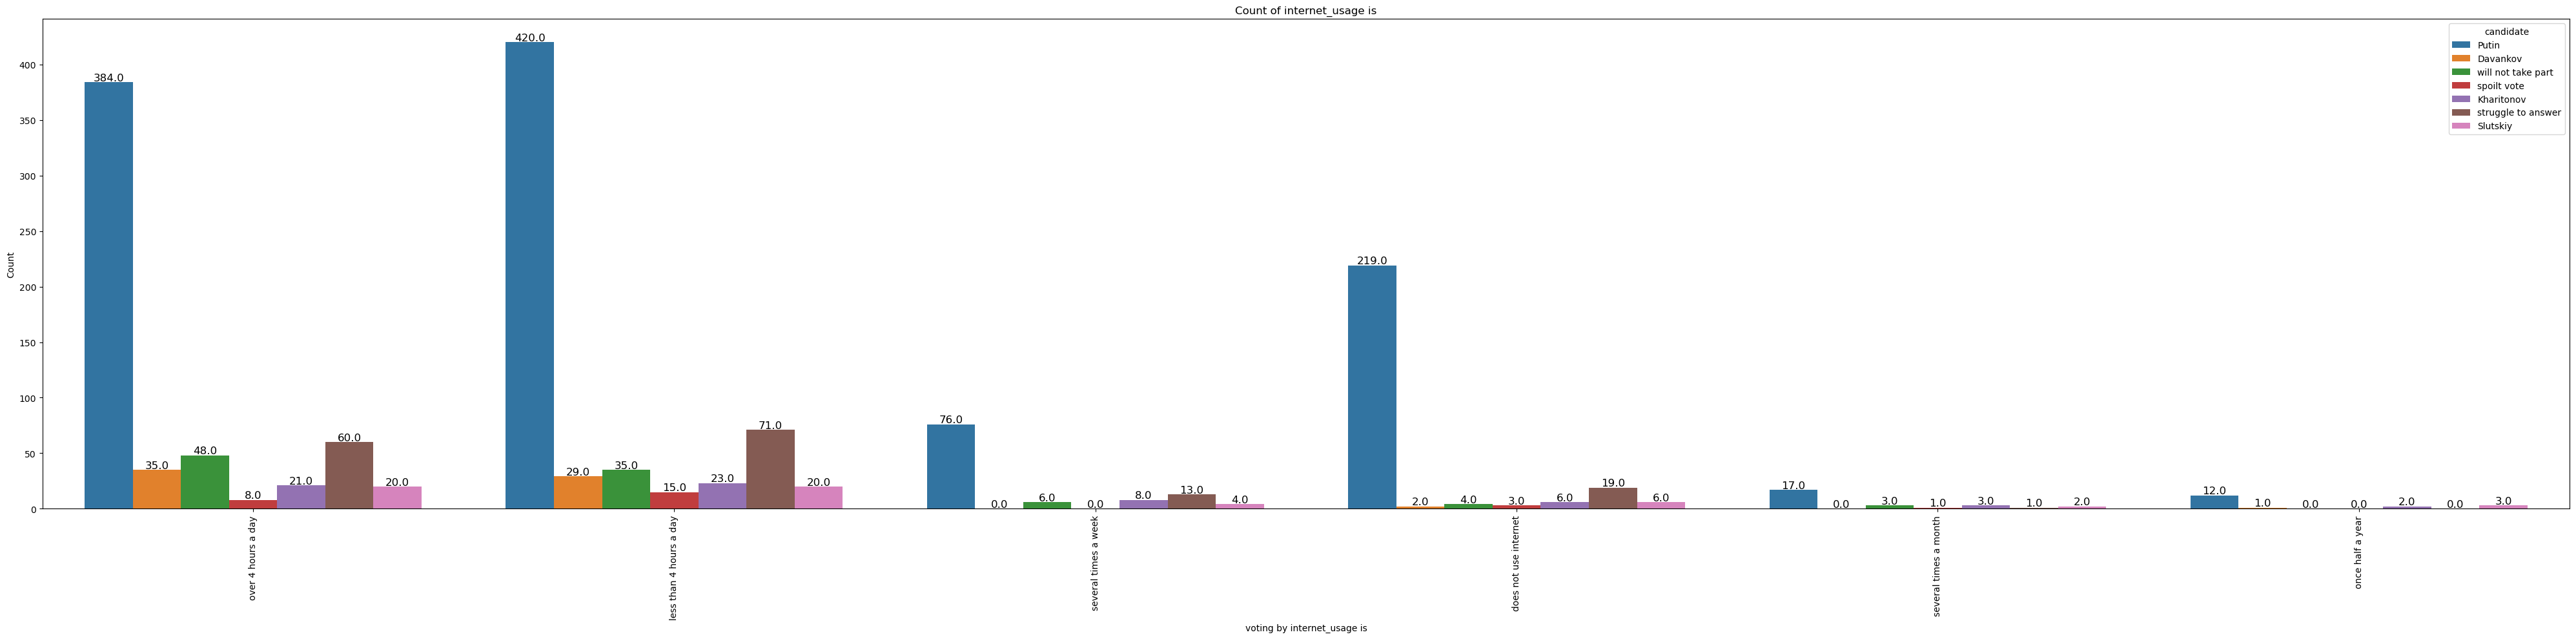

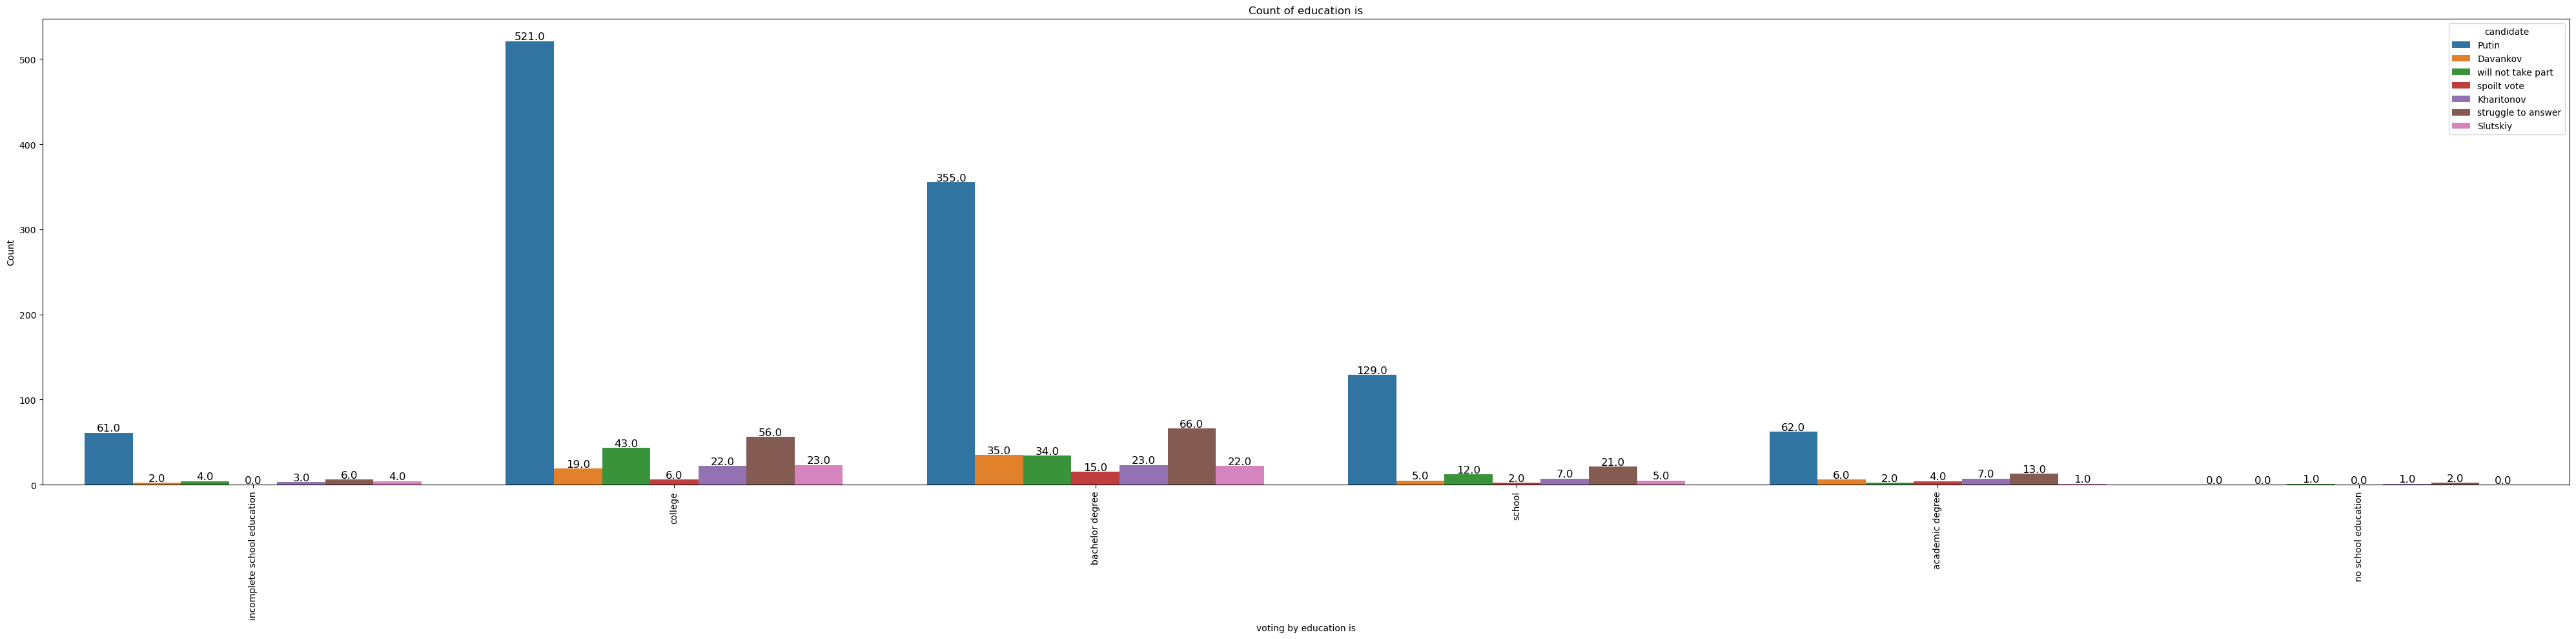

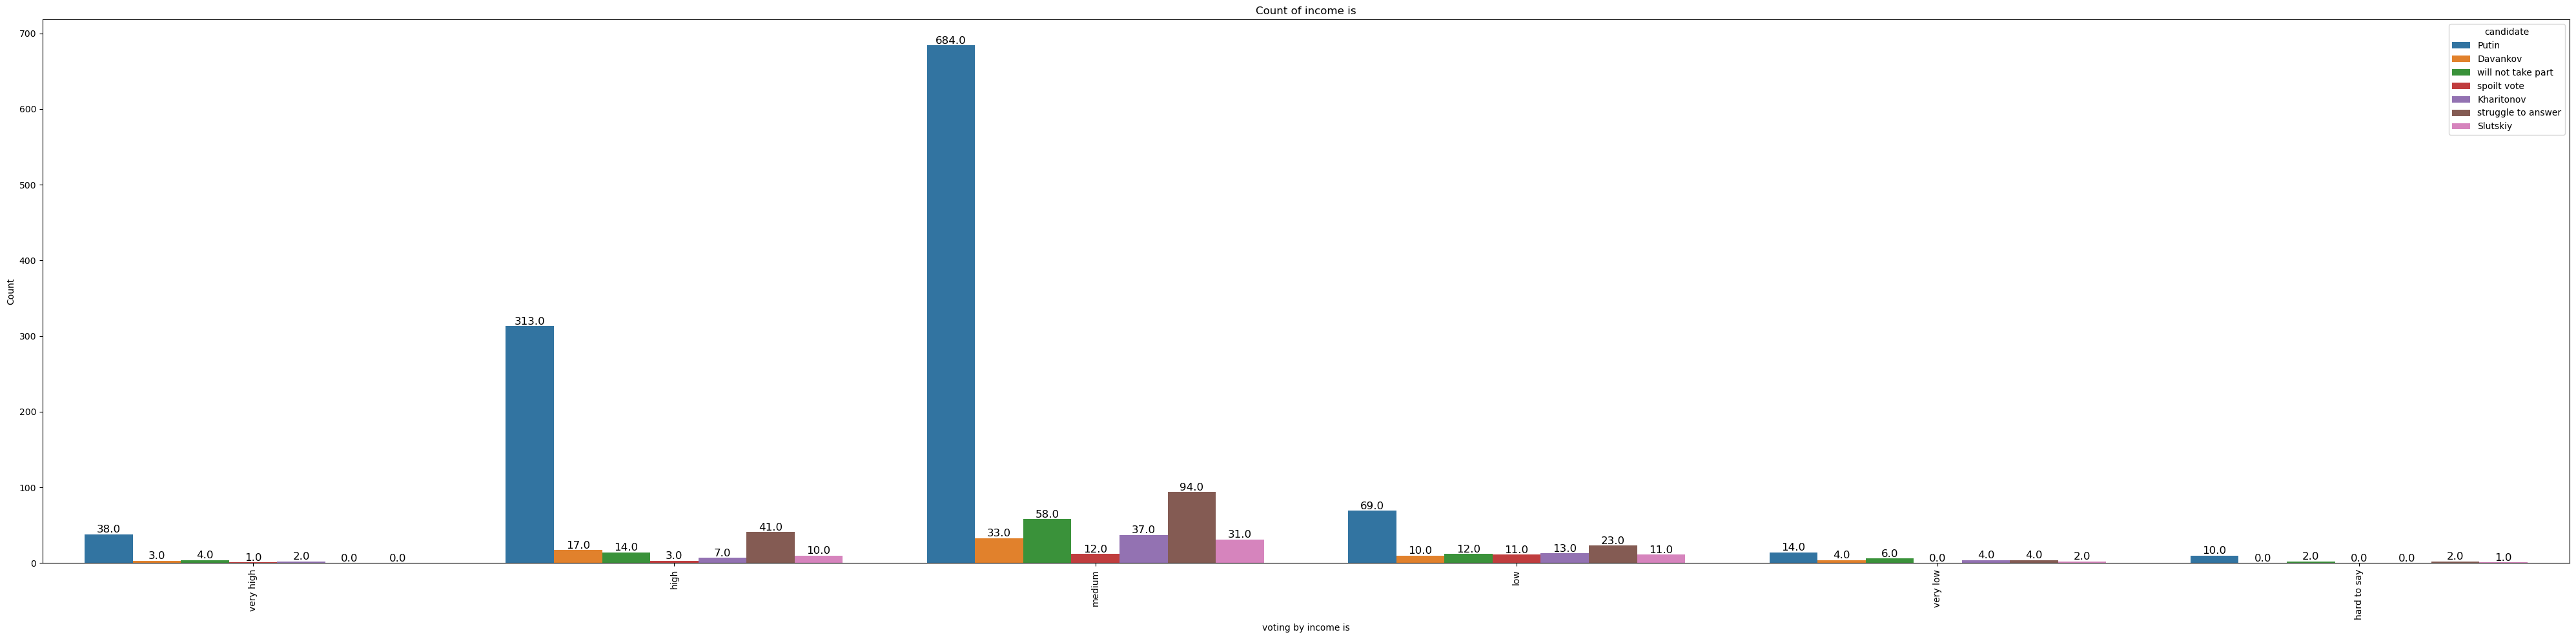

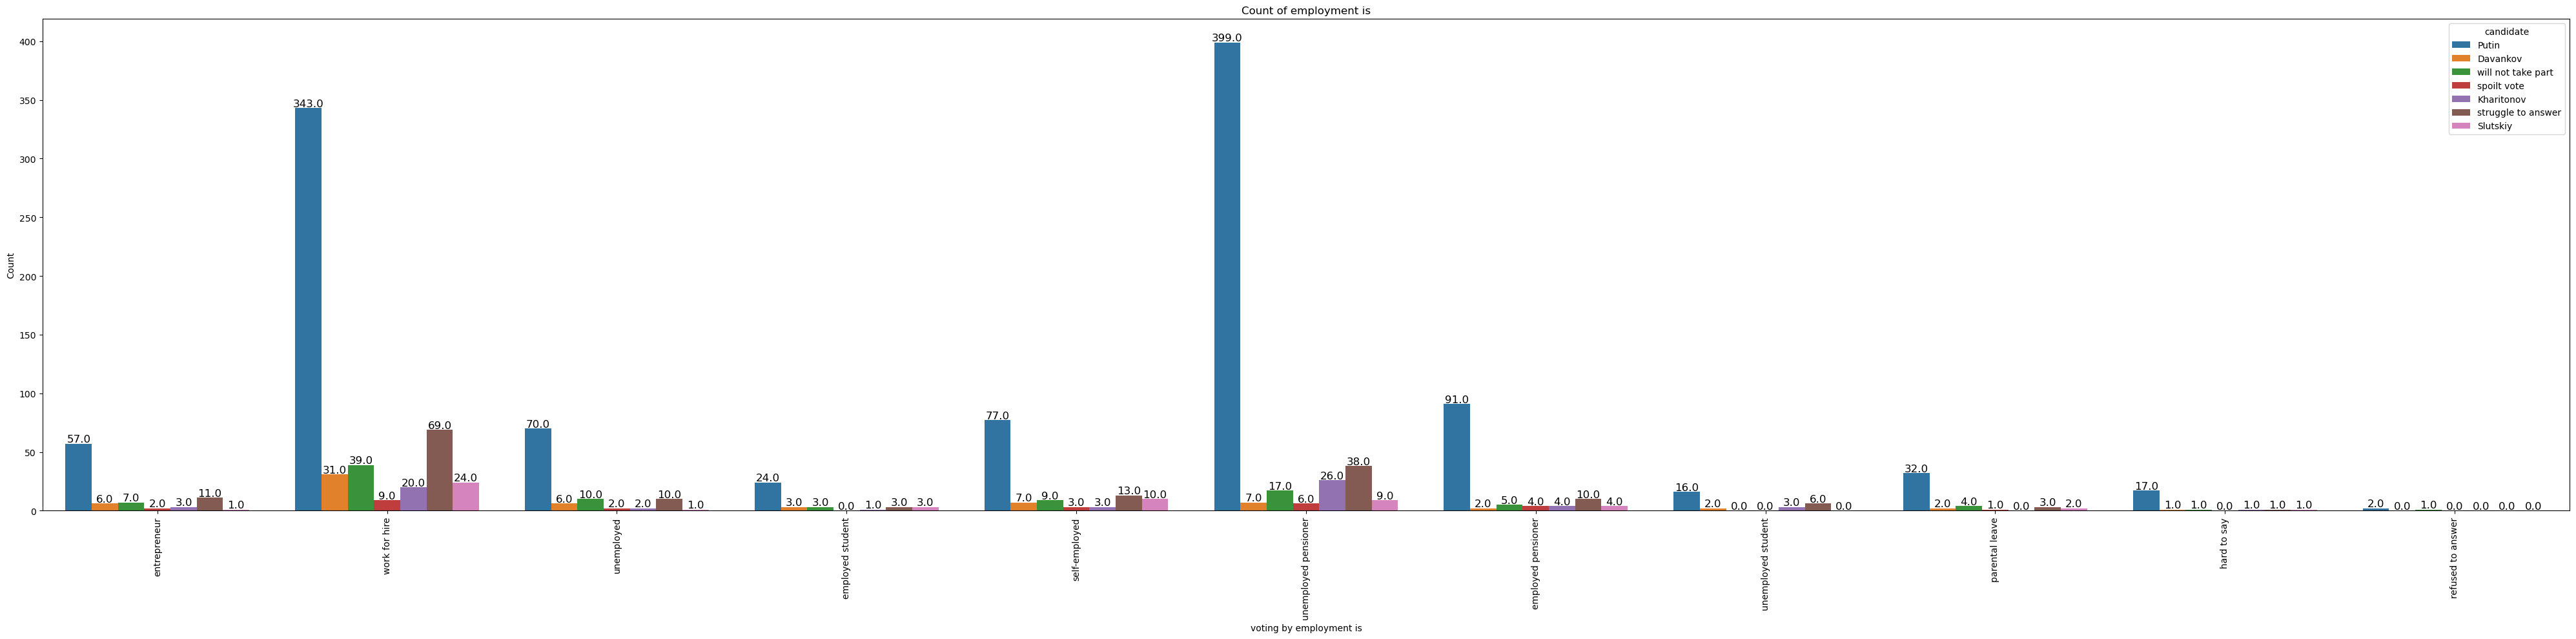

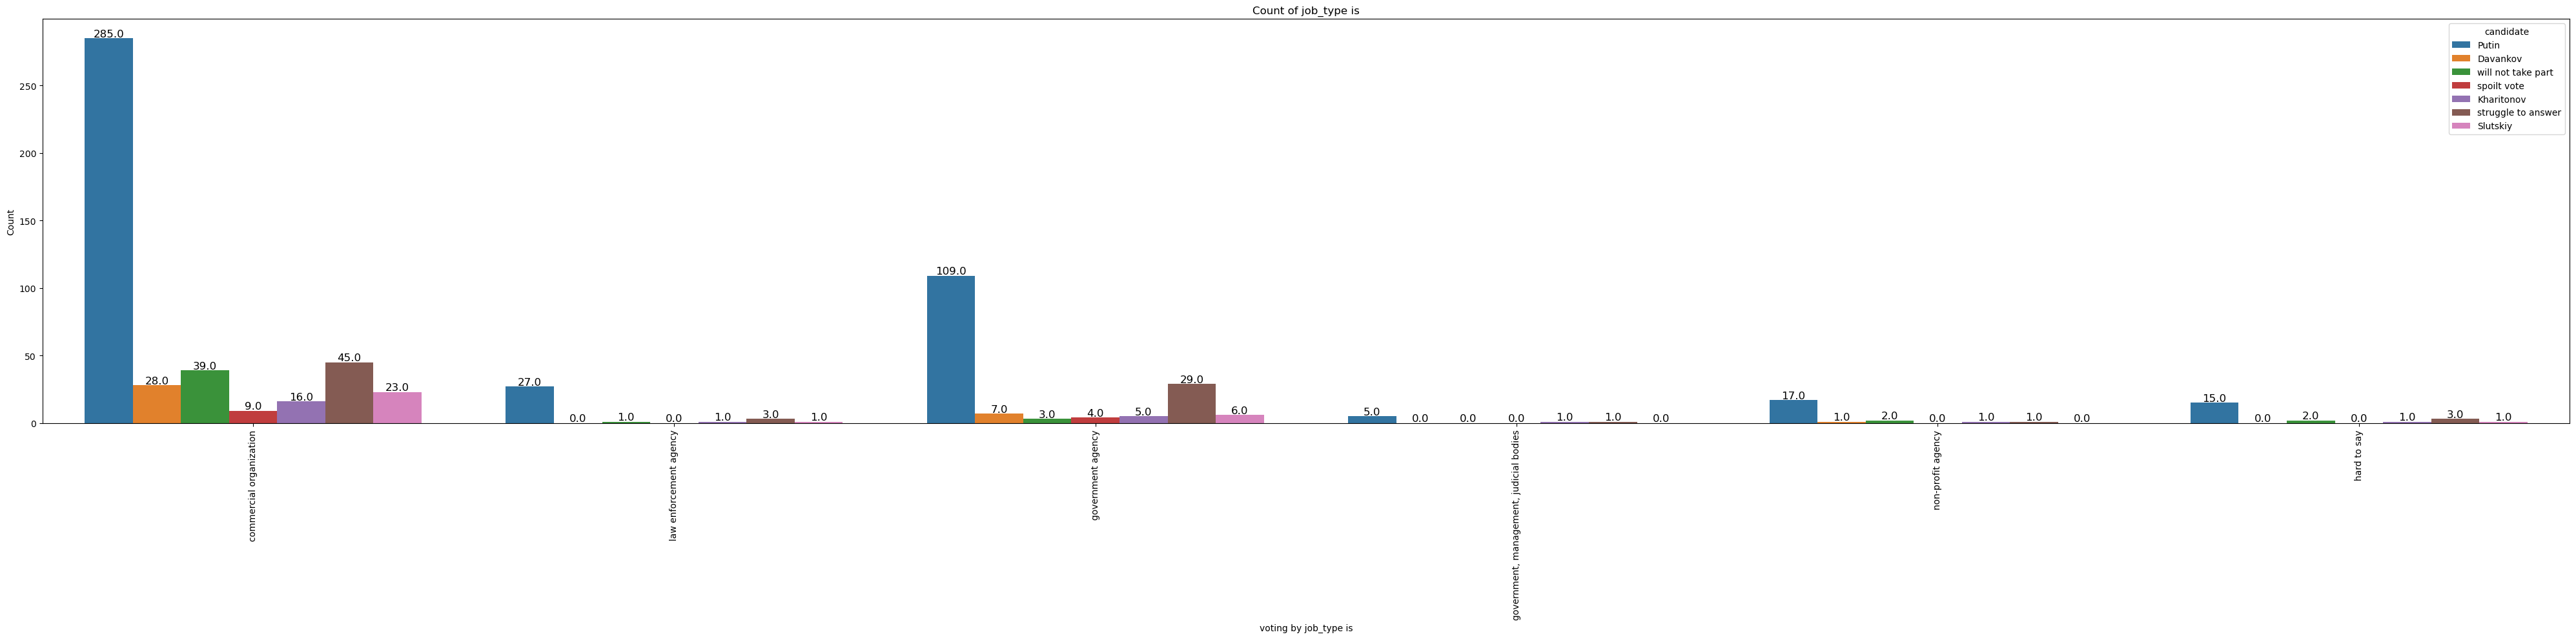

C:\Users\madhu\AppData\Local\Temp\ipykernel_26540\1417408484.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


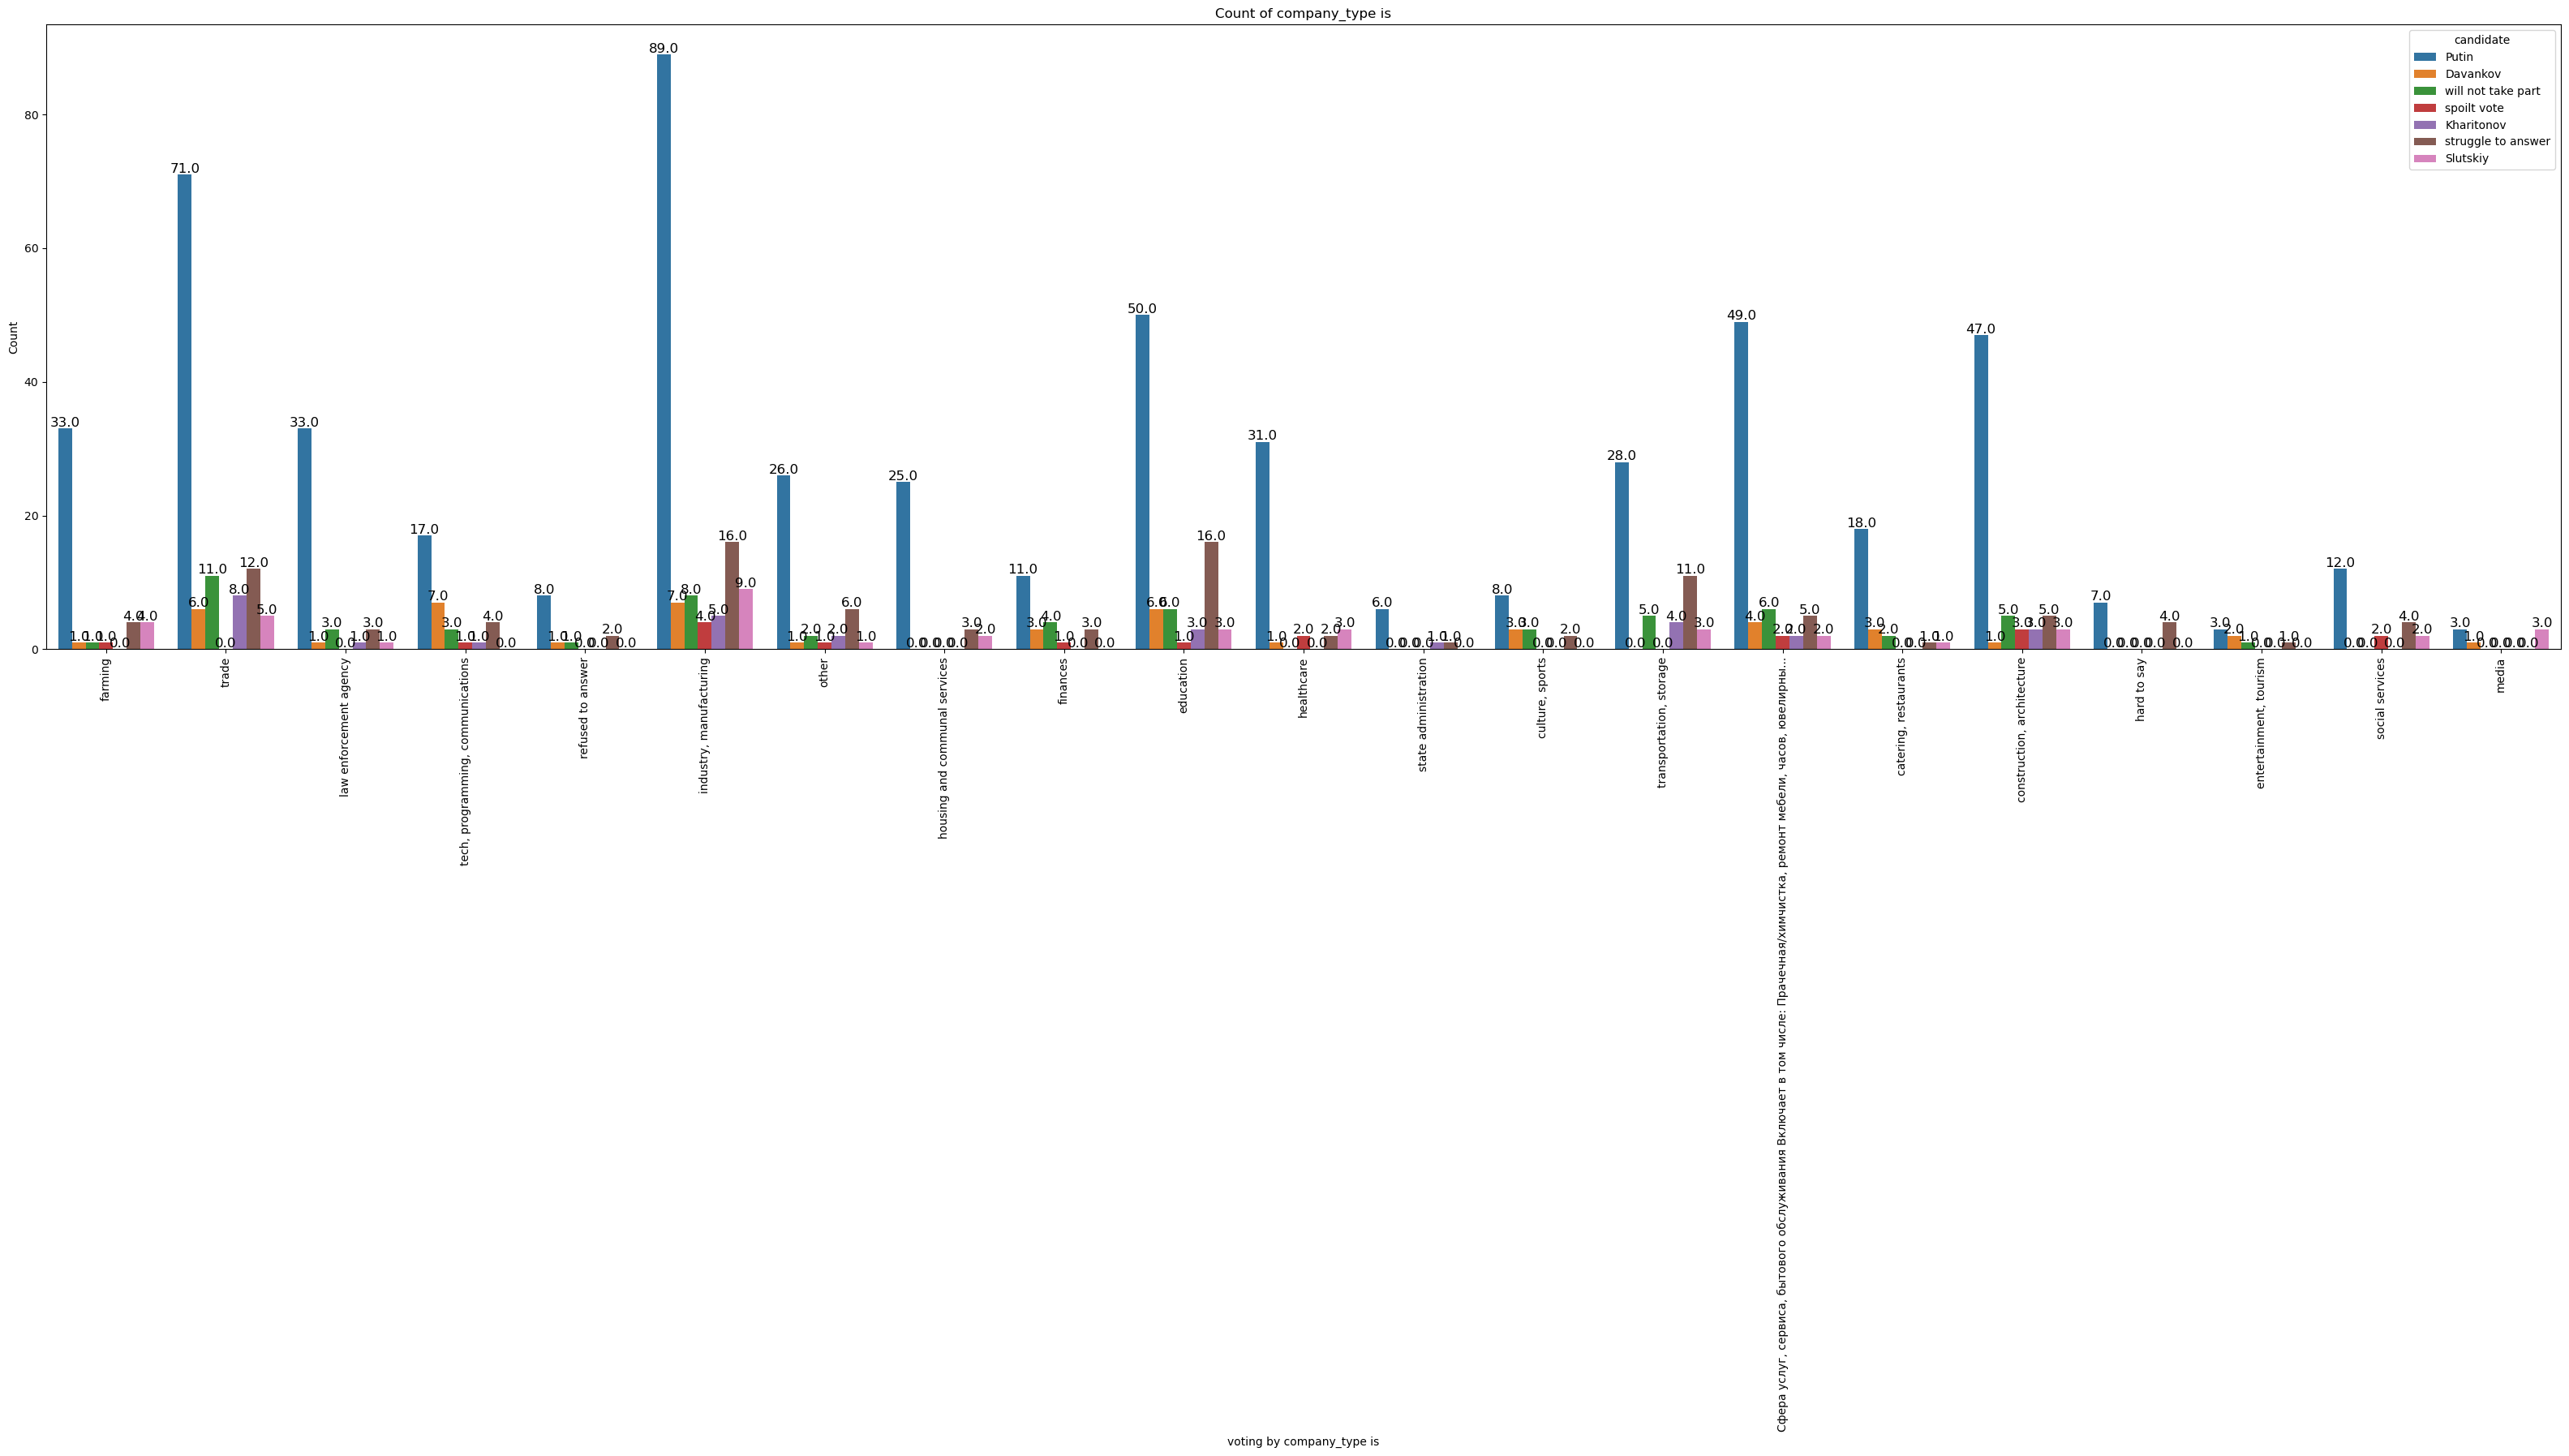

In [43]:
for col in cols:
    plt.figure(figsize=(40, 10))
    ax = sns.countplot(x=col, data=df,hue=df['candidate']) 
    
    # Annotate the count plot
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
    
    plt.title(f'Count of {col} is')
    plt.xlabel(f'voting by {col} is')
    plt.xticks(rotation=90)
    plt.ylabel('Count')
    plt.tight_layout() 
    plt.show()

C:\Users\madhu\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\madhu\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Text(0.5, 1.0, 'candidate  selection by Age Group ')

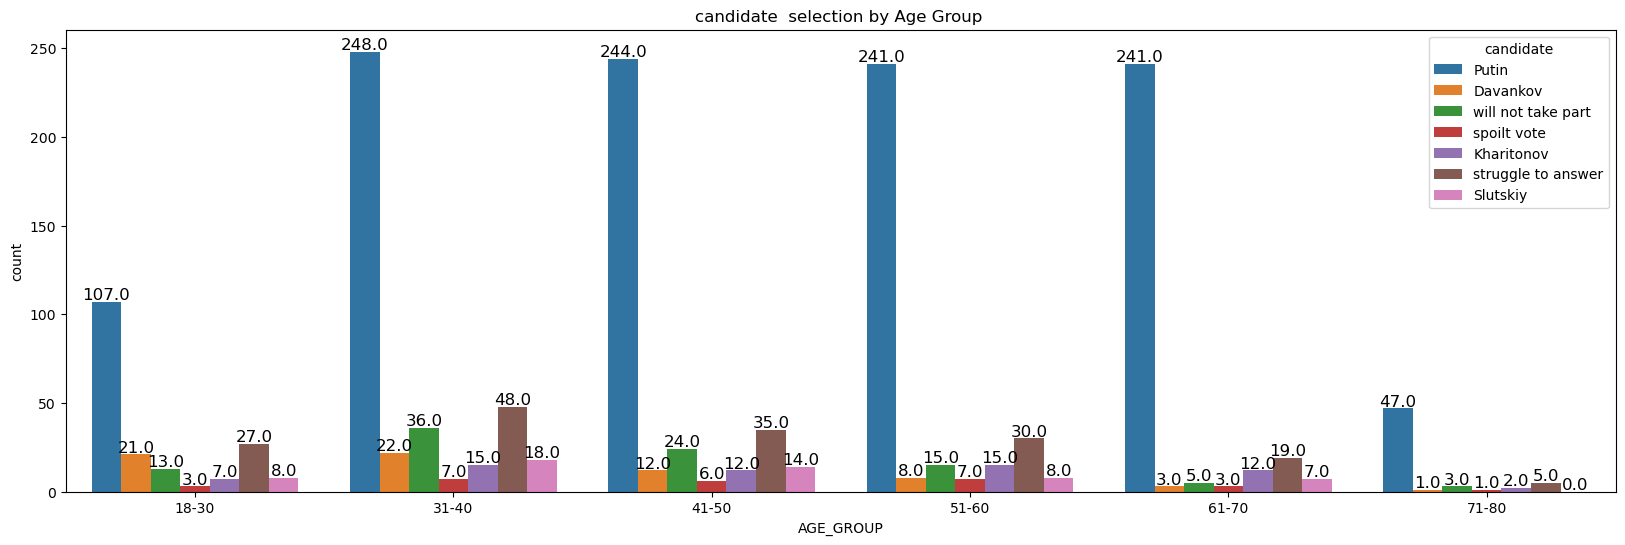

In [45]:
age_labels = ['18-30','31-40', '41-50', '51-60', '61-70', '71-80']
df['AGE_GROUP'] = pd.cut(df['age'], bins=6, labels=age_labels, right=False)
plt.figure(figsize=(20, 6))
ax = sns.countplot(x='AGE_GROUP',data=df,hue=df['candidate'])

# Annotate the count plot
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('candidate  selection by Age Group ')

C:\Users\madhu\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\madhu\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Text(0.5, 1.0, 'voting by Weight Group')

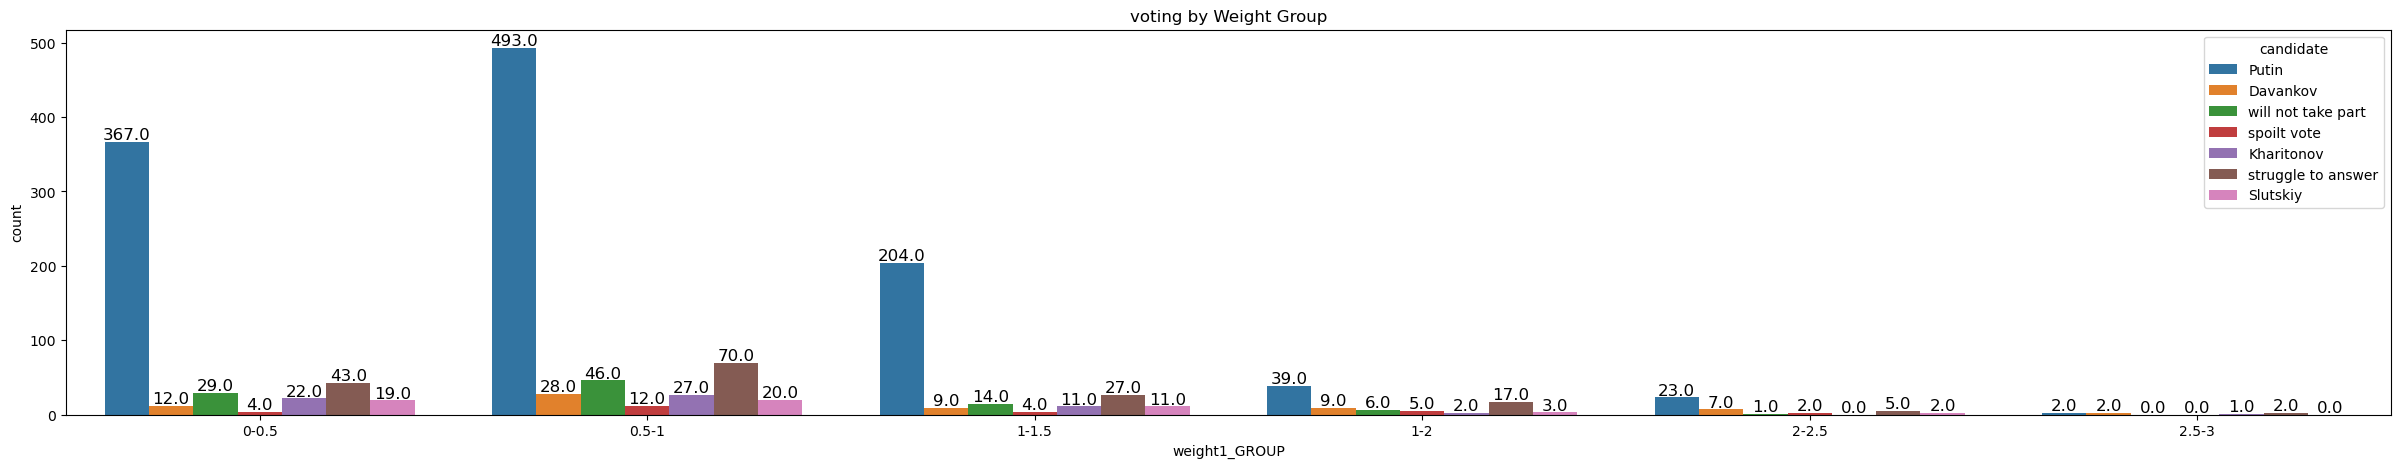

In [50]:
weight_labels = ['0-0.5','0.5-1', '1-1.5', '1-2', '2-2.5', '2.5-3']
df['weight1_GROUP'] = pd.cut(df['weight1'], bins=6, labels=weight_labels, right=False)
plt.figure(figsize=(30, 5))
ax = sns.countplot(x='weight1_GROUP',data=df,hue=df['candidate'])

# Annotate the count plot
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('voting by Weight Group')

In [47]:
#target by knows_election_date

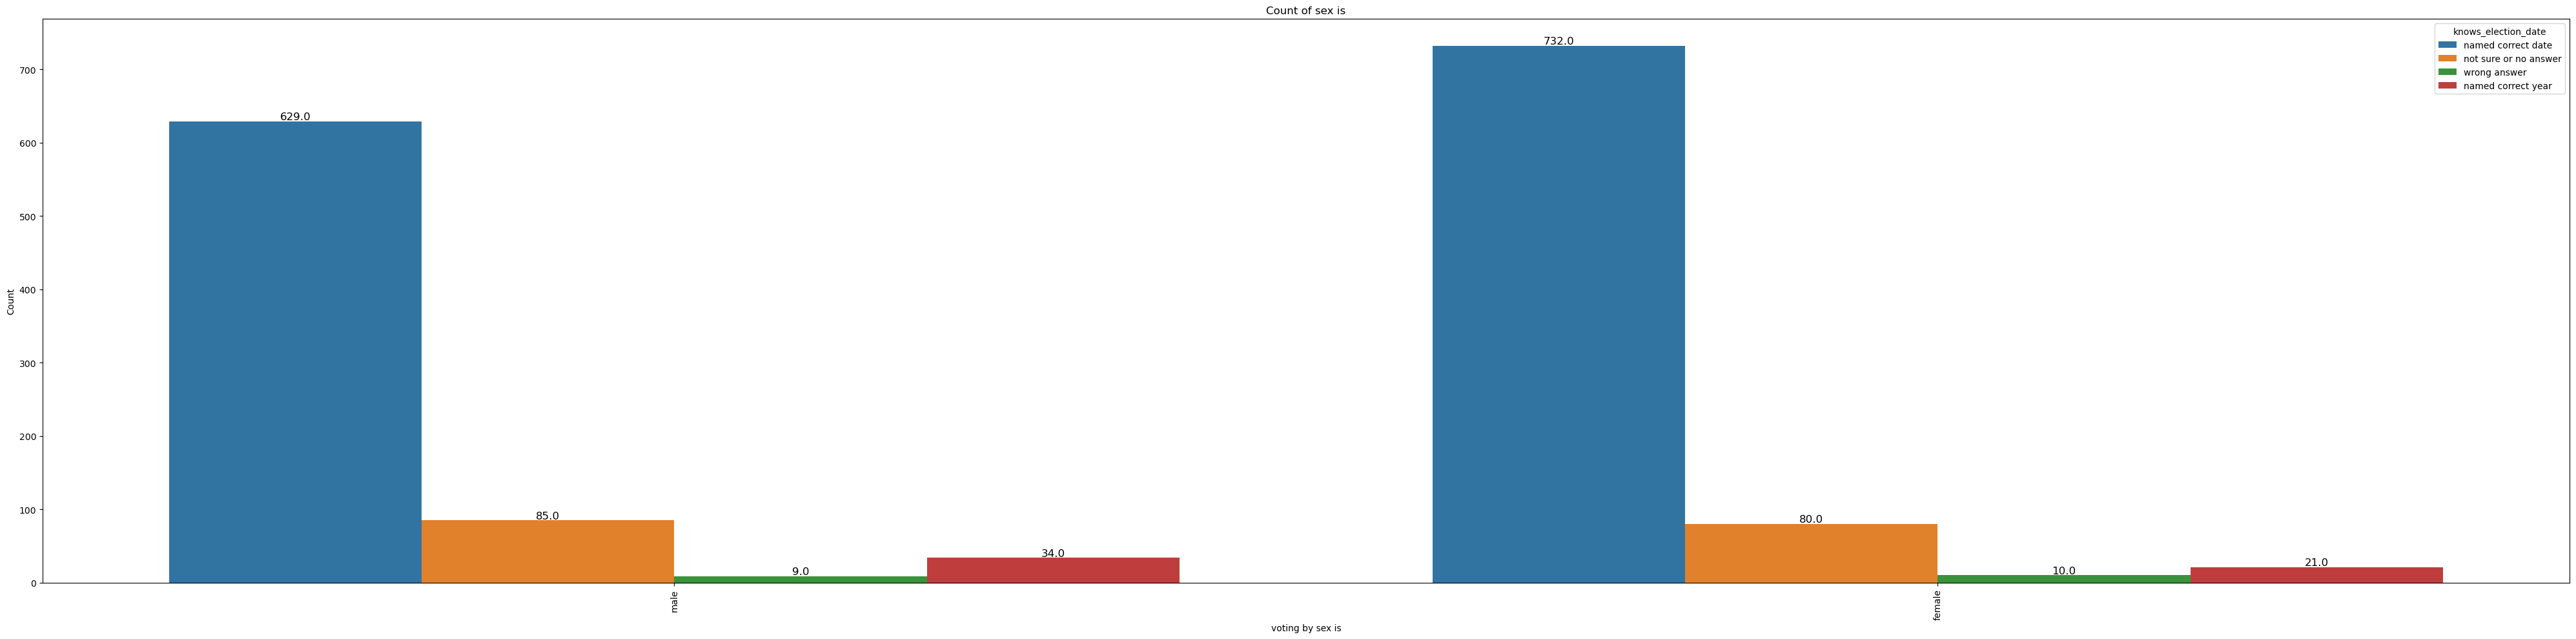

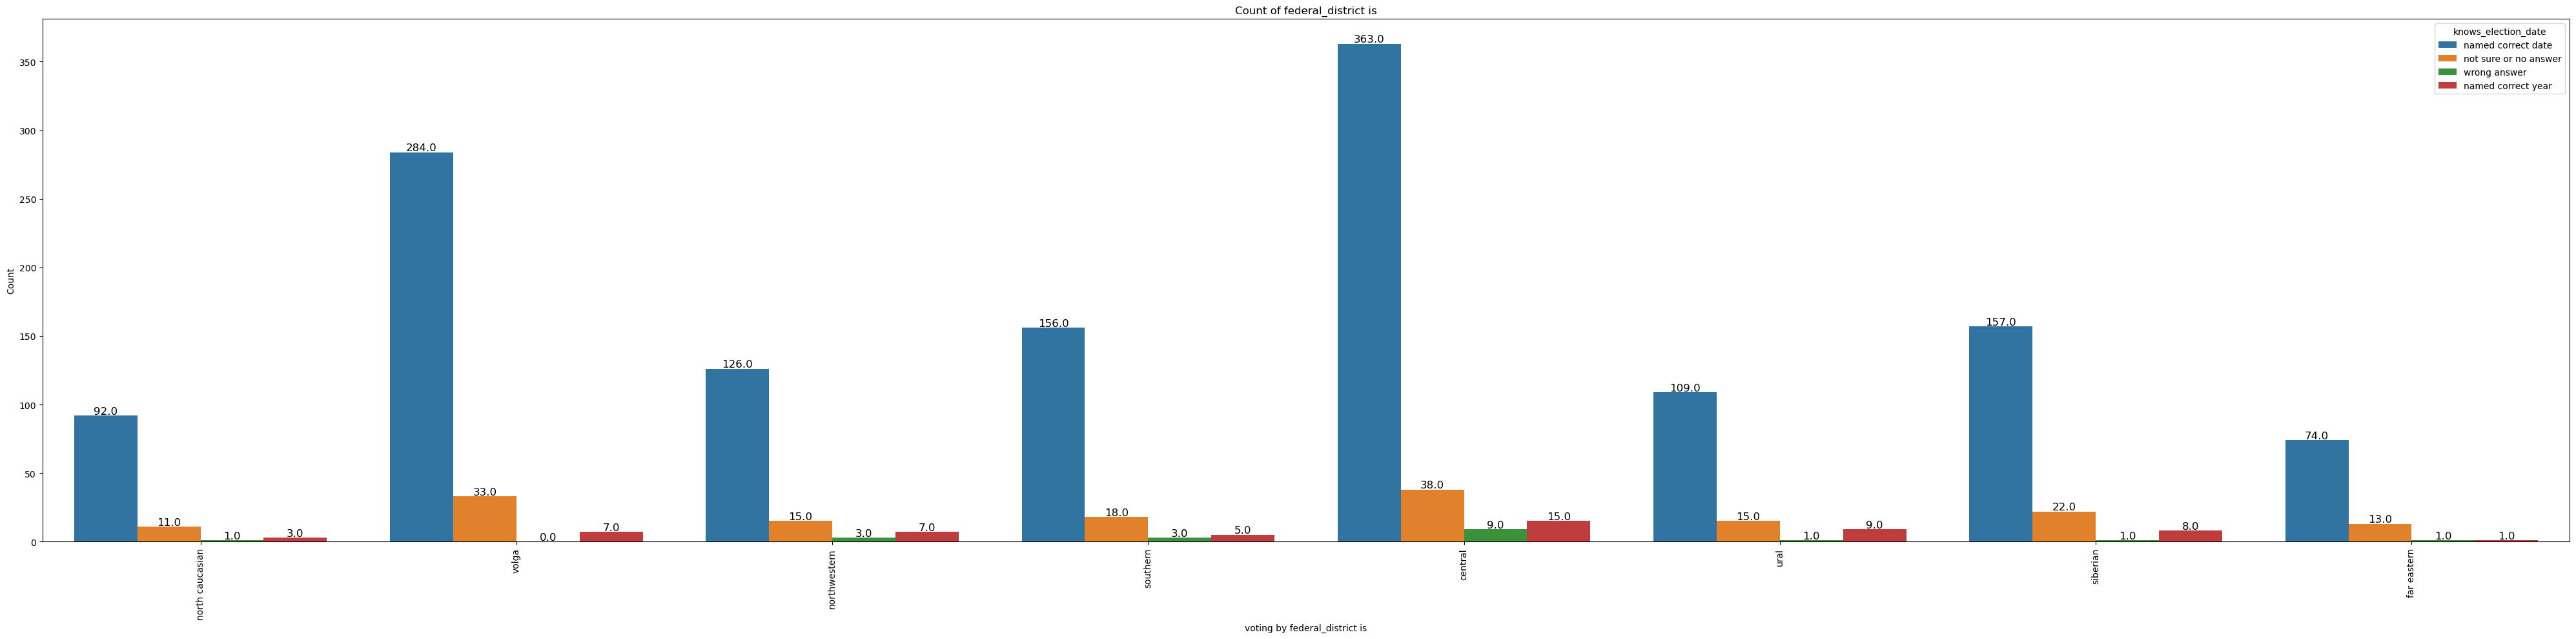

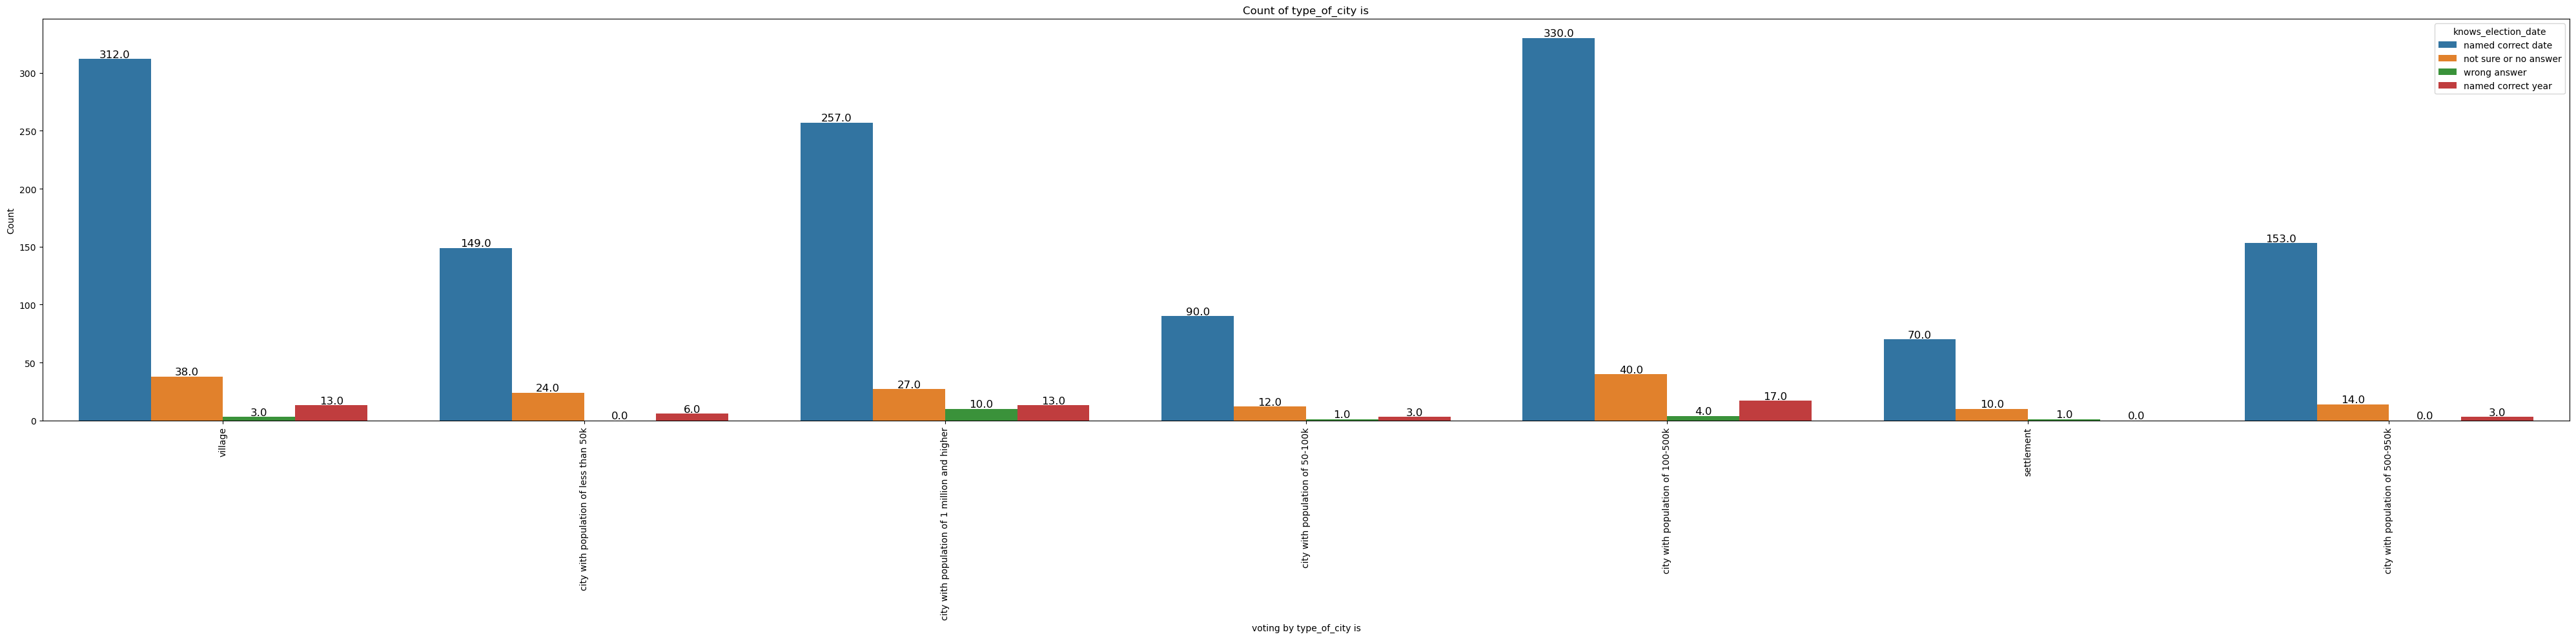

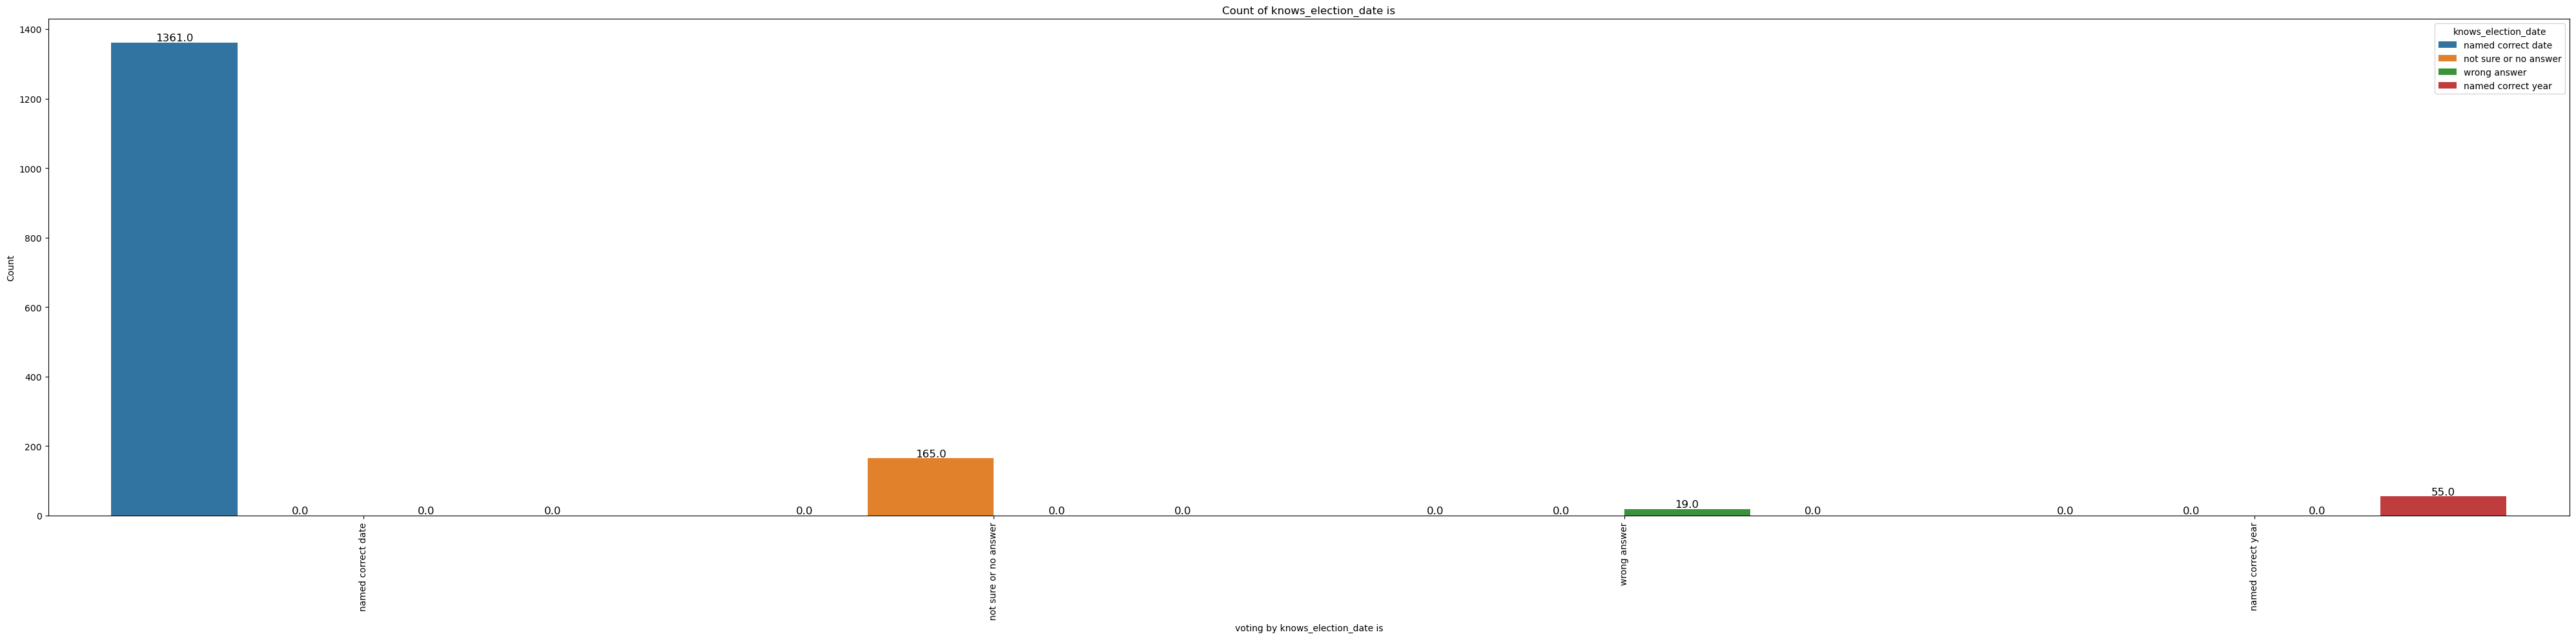

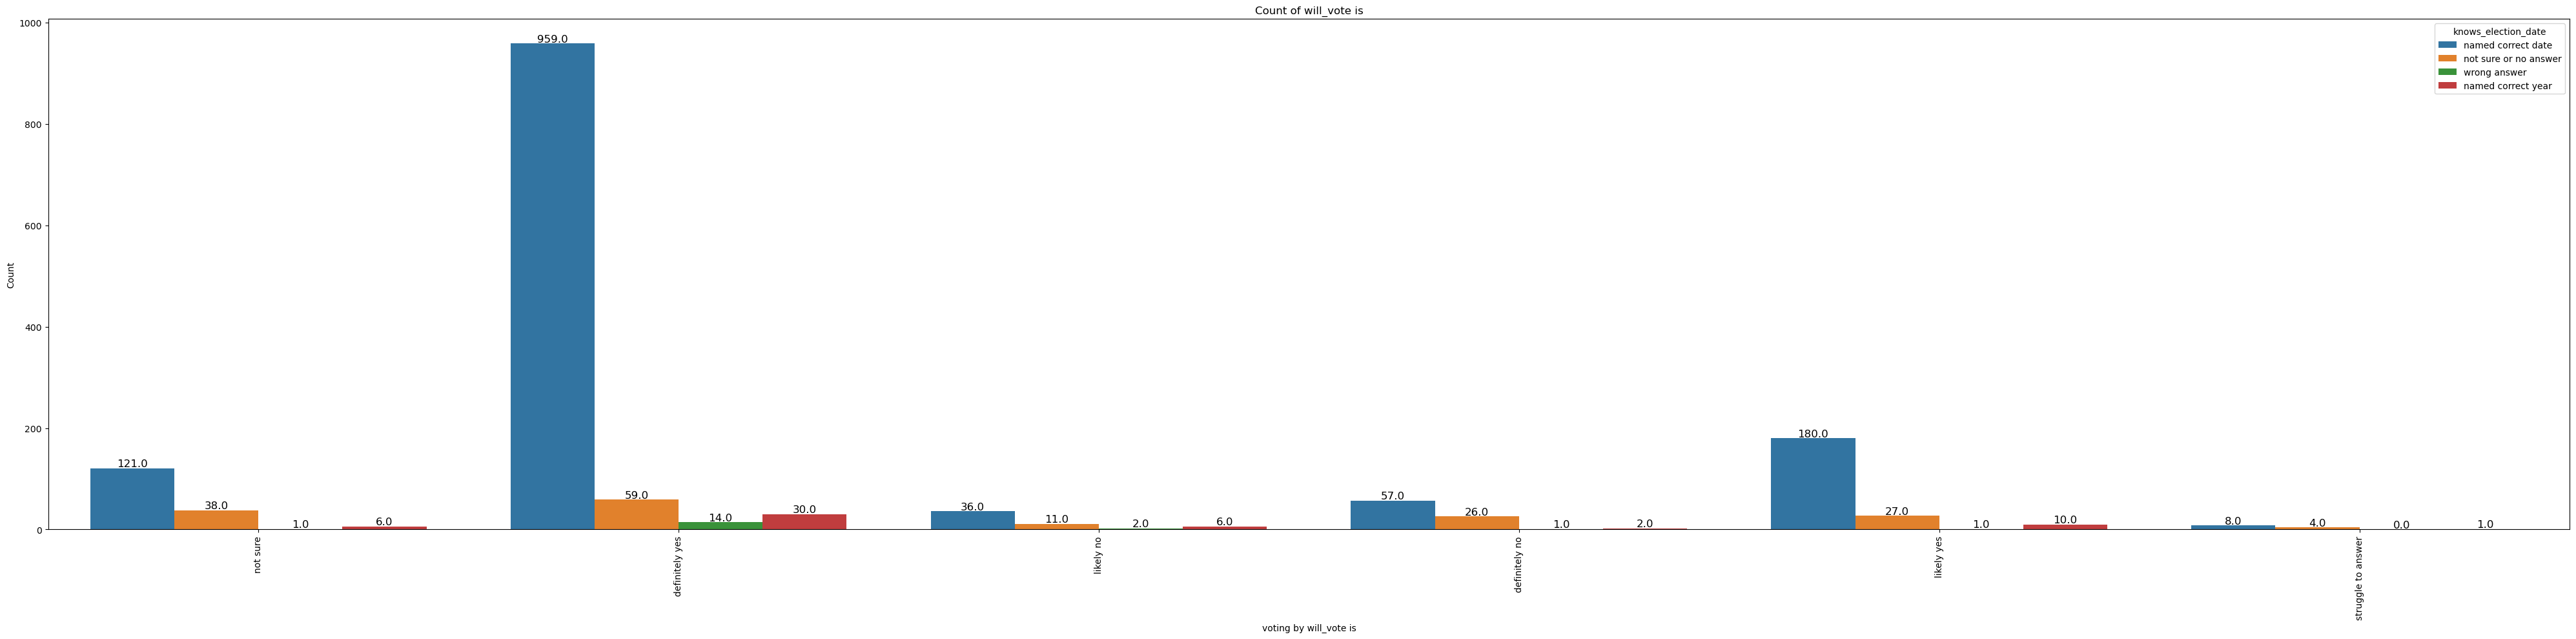

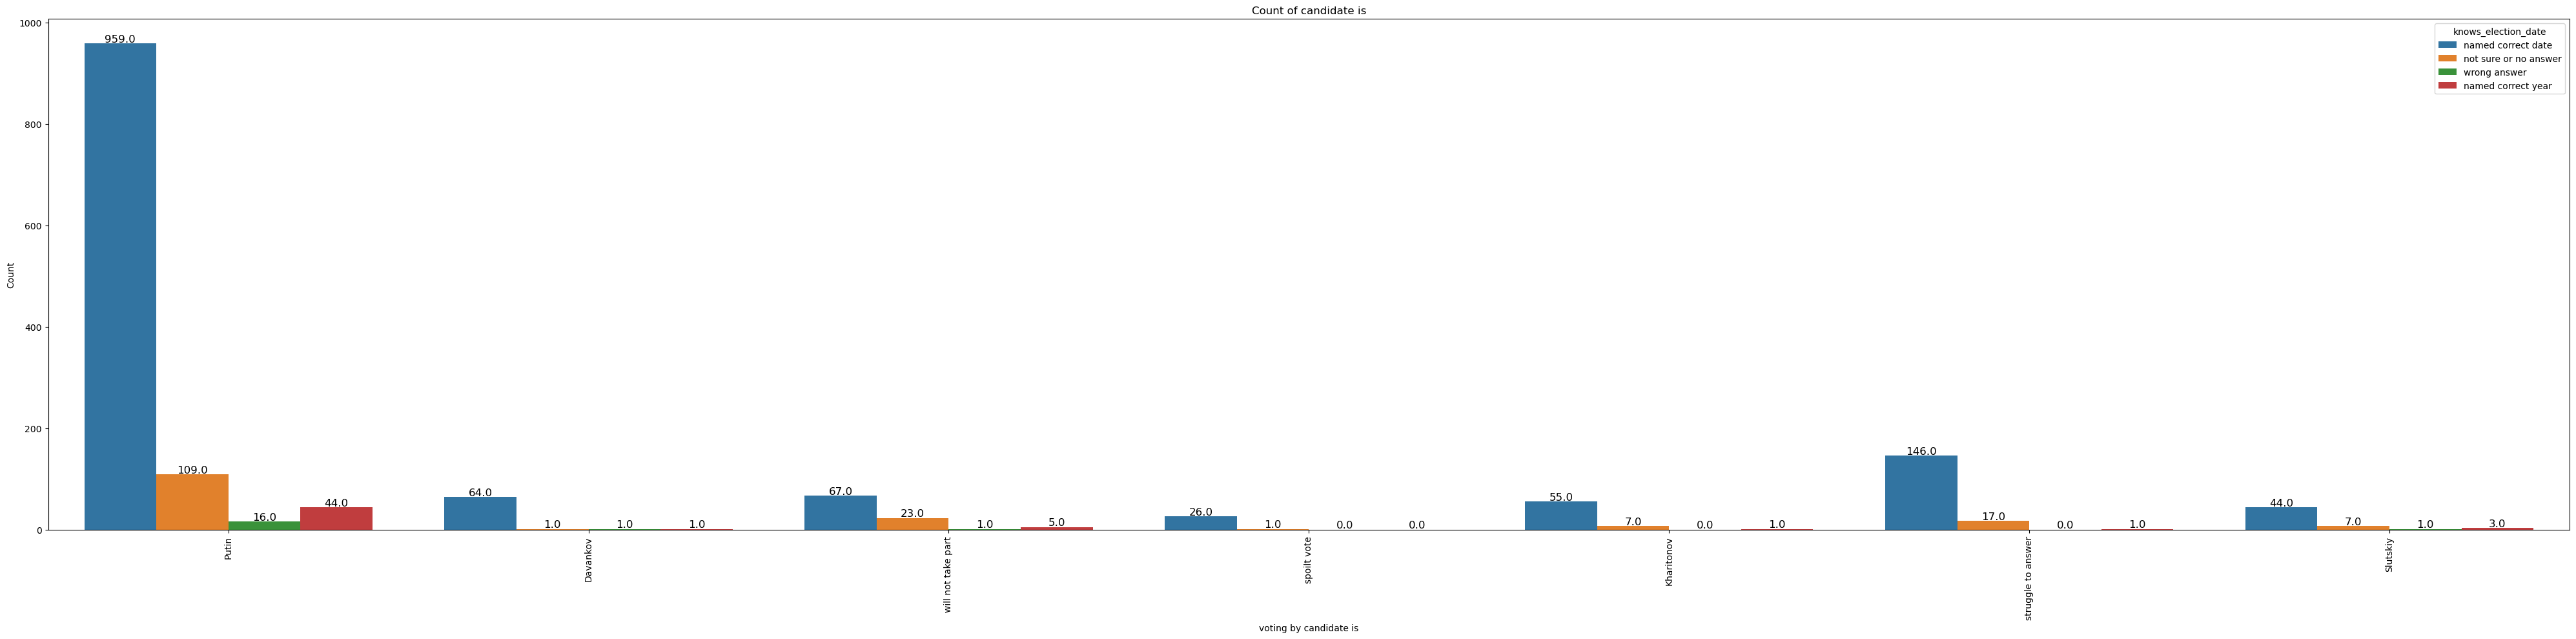

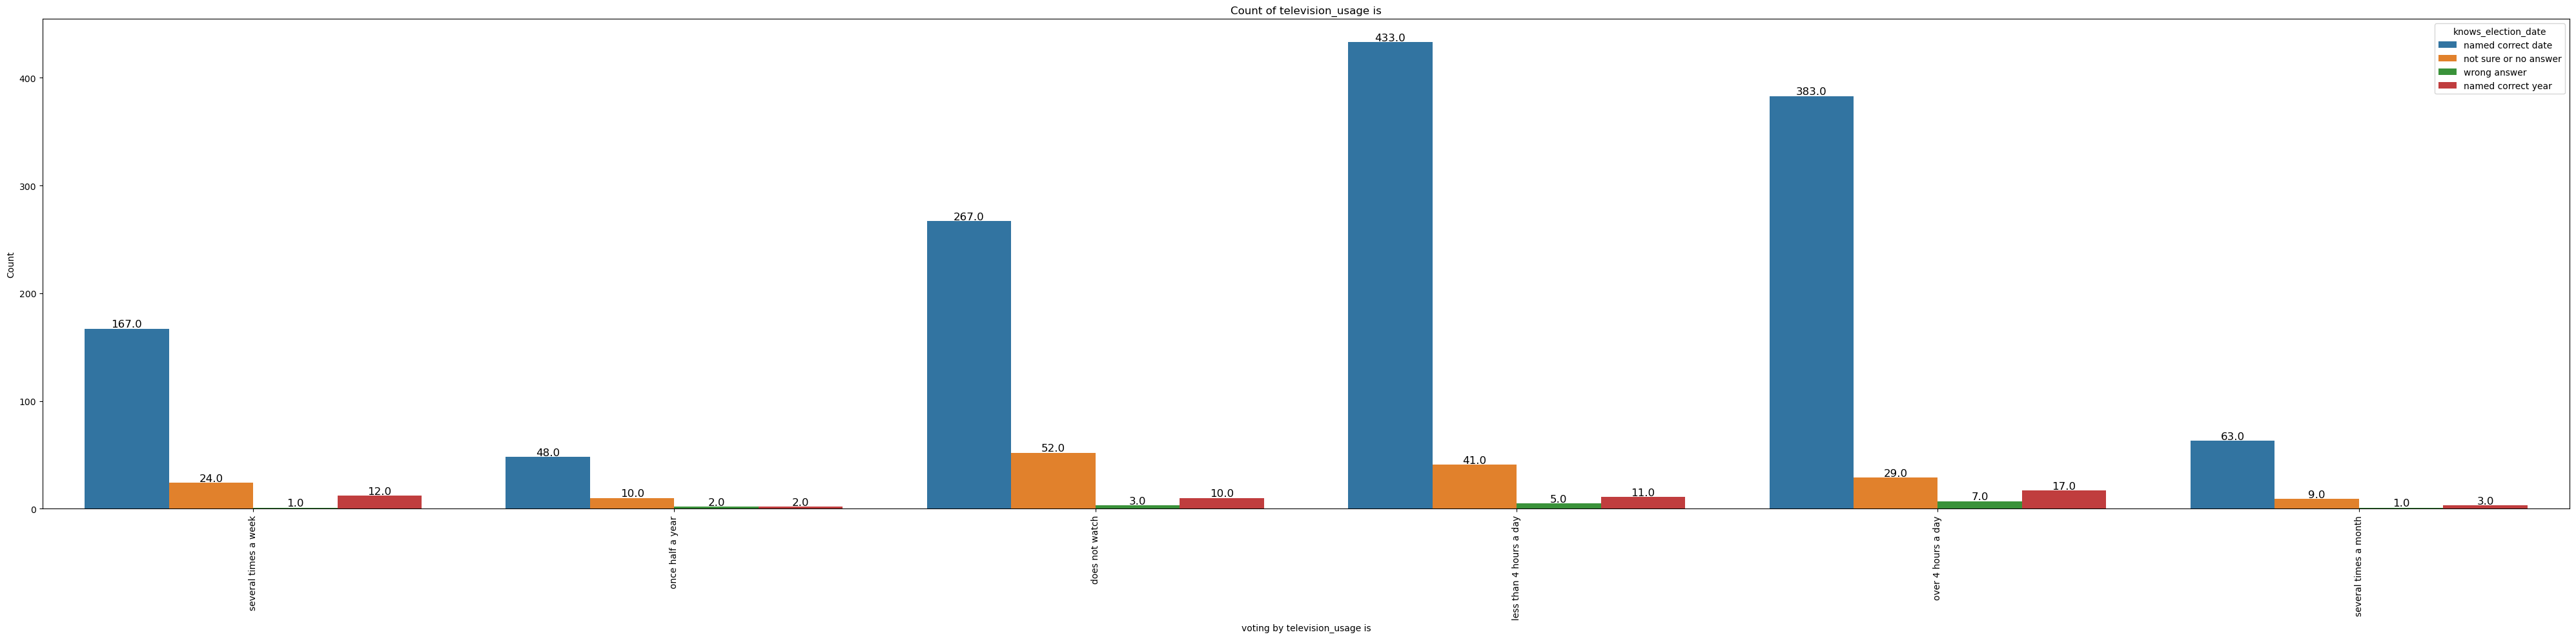

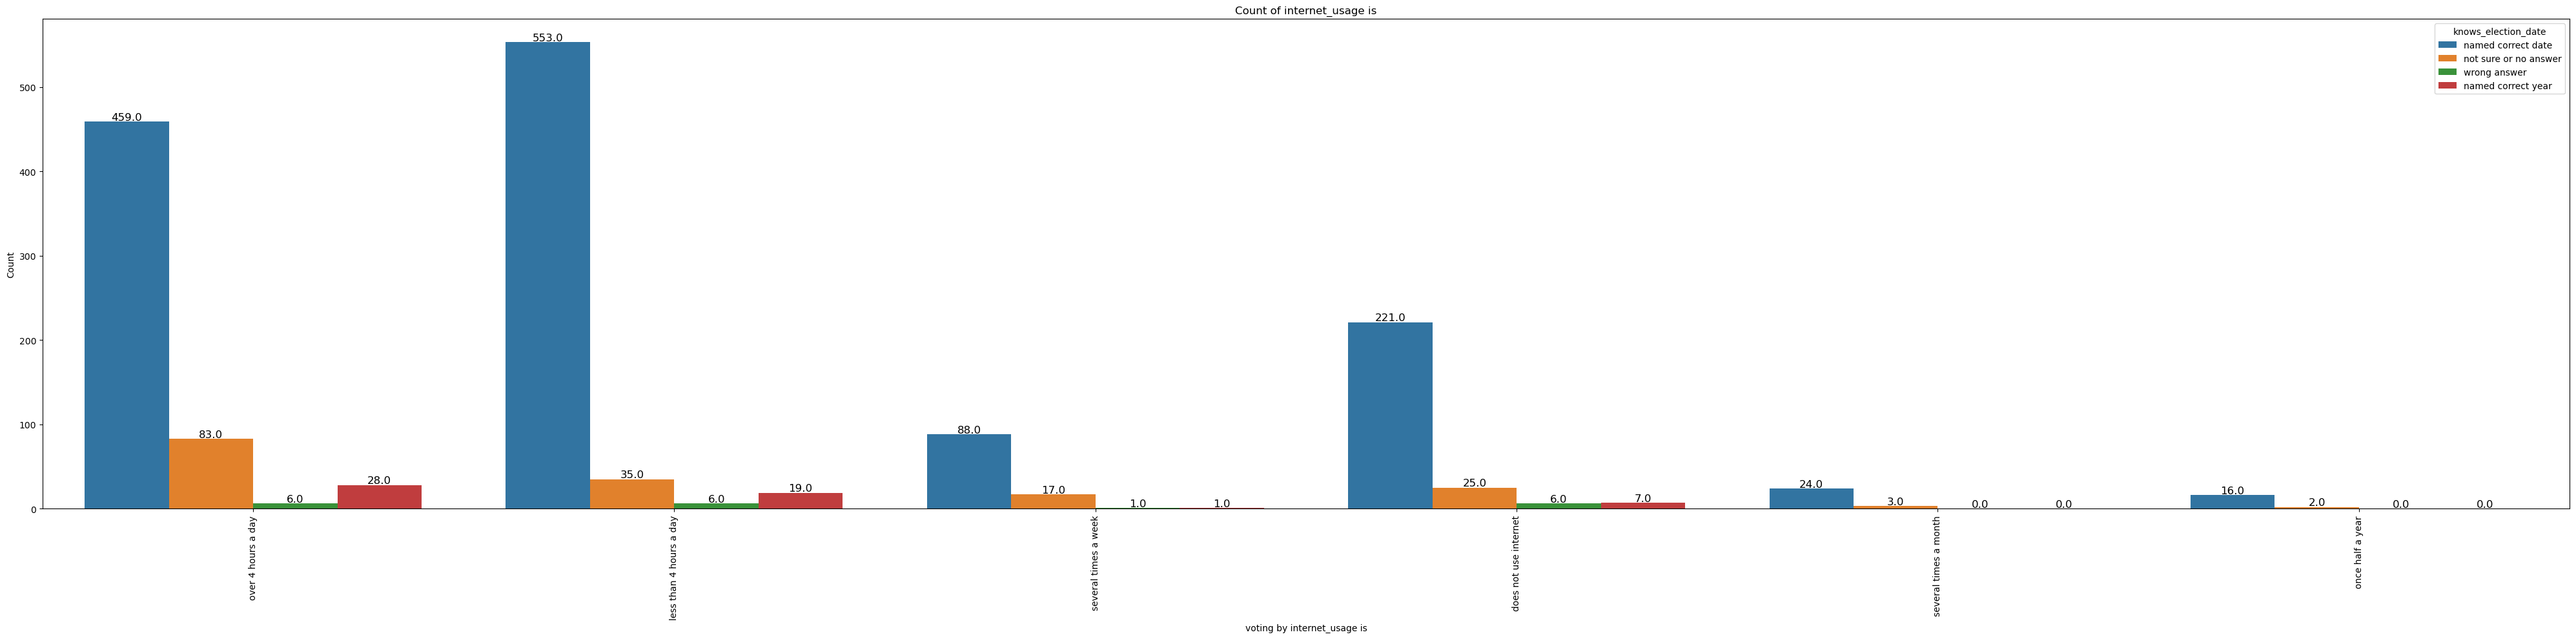

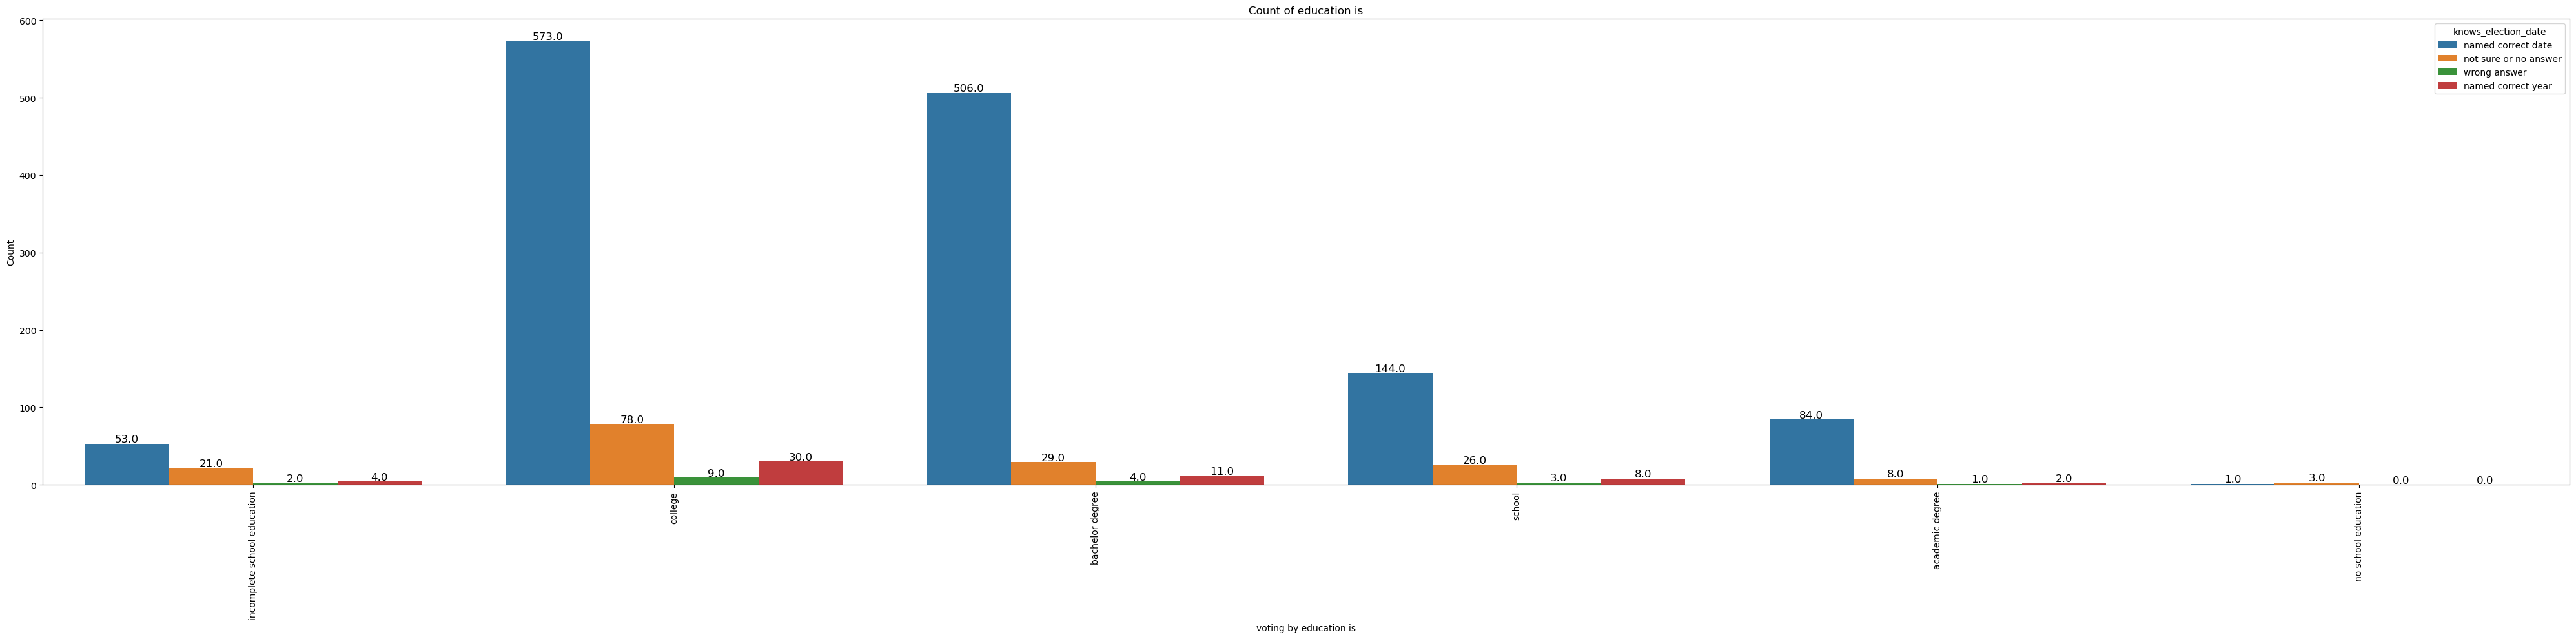

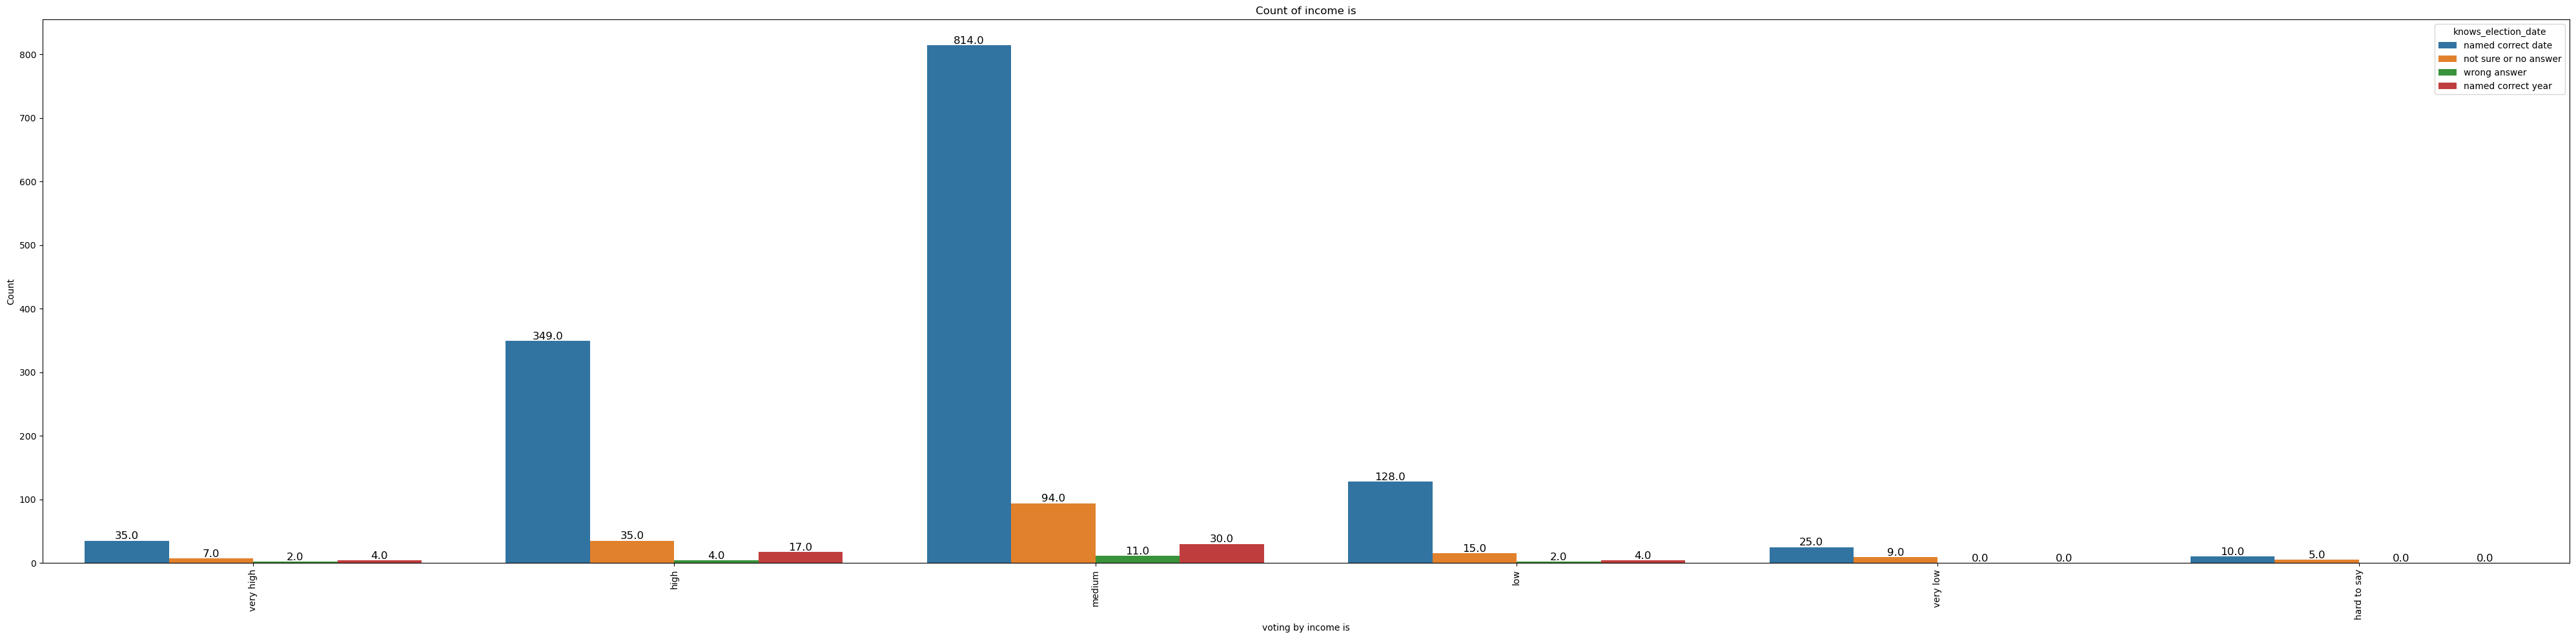

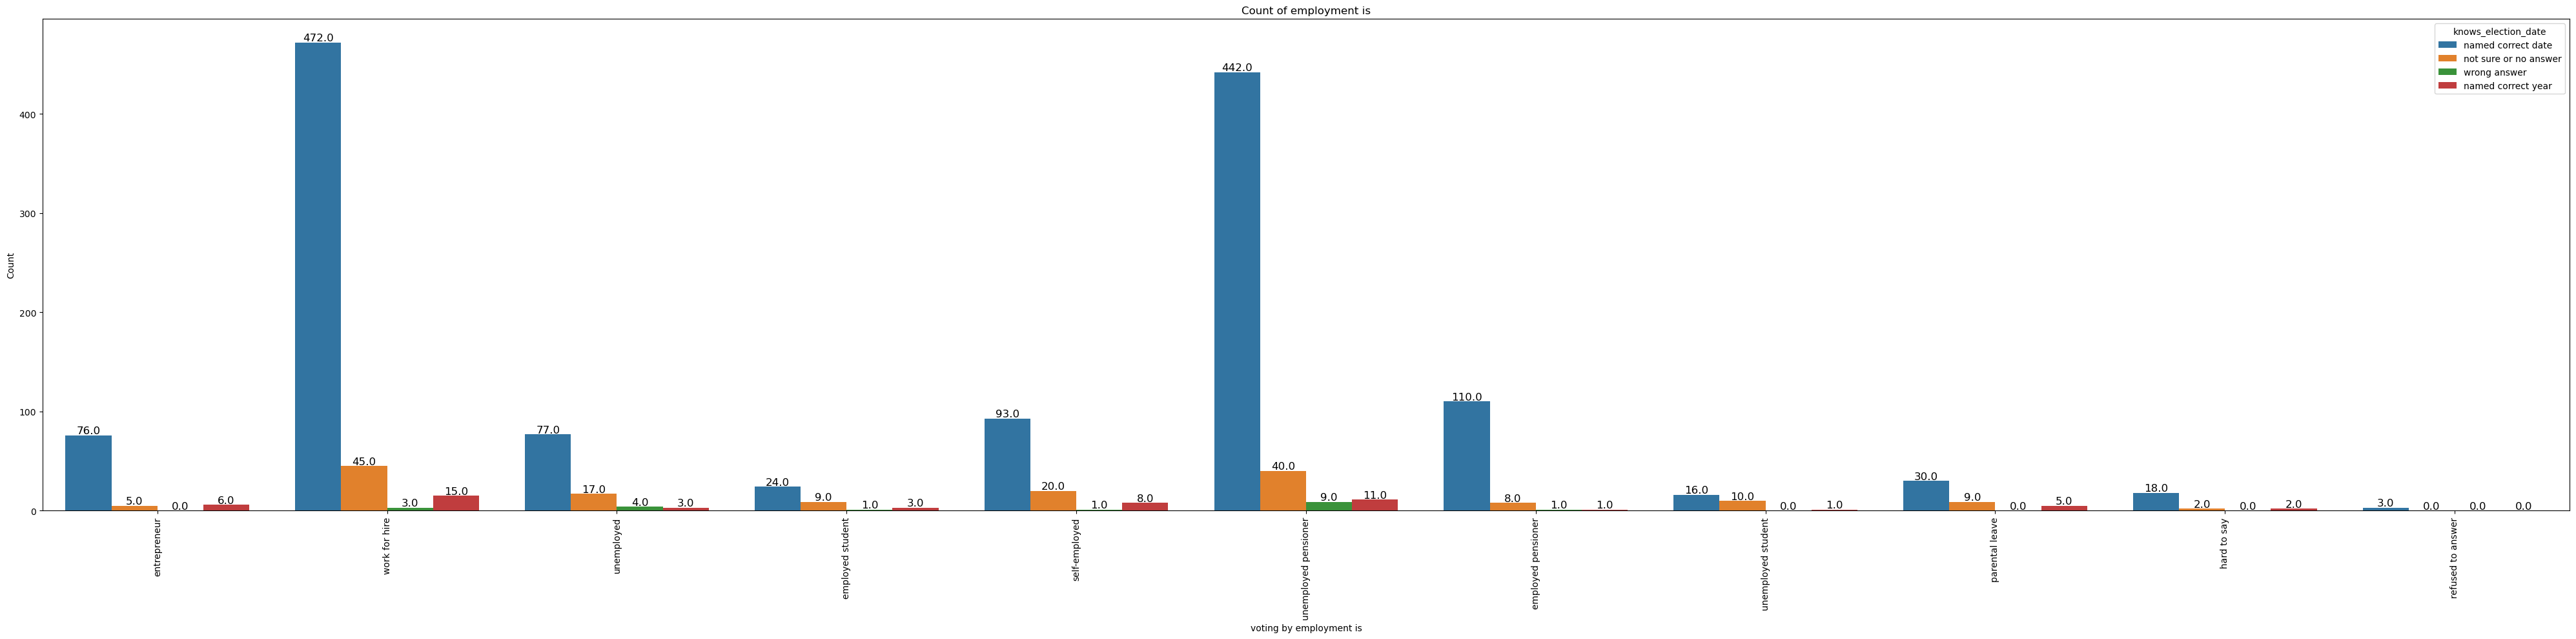

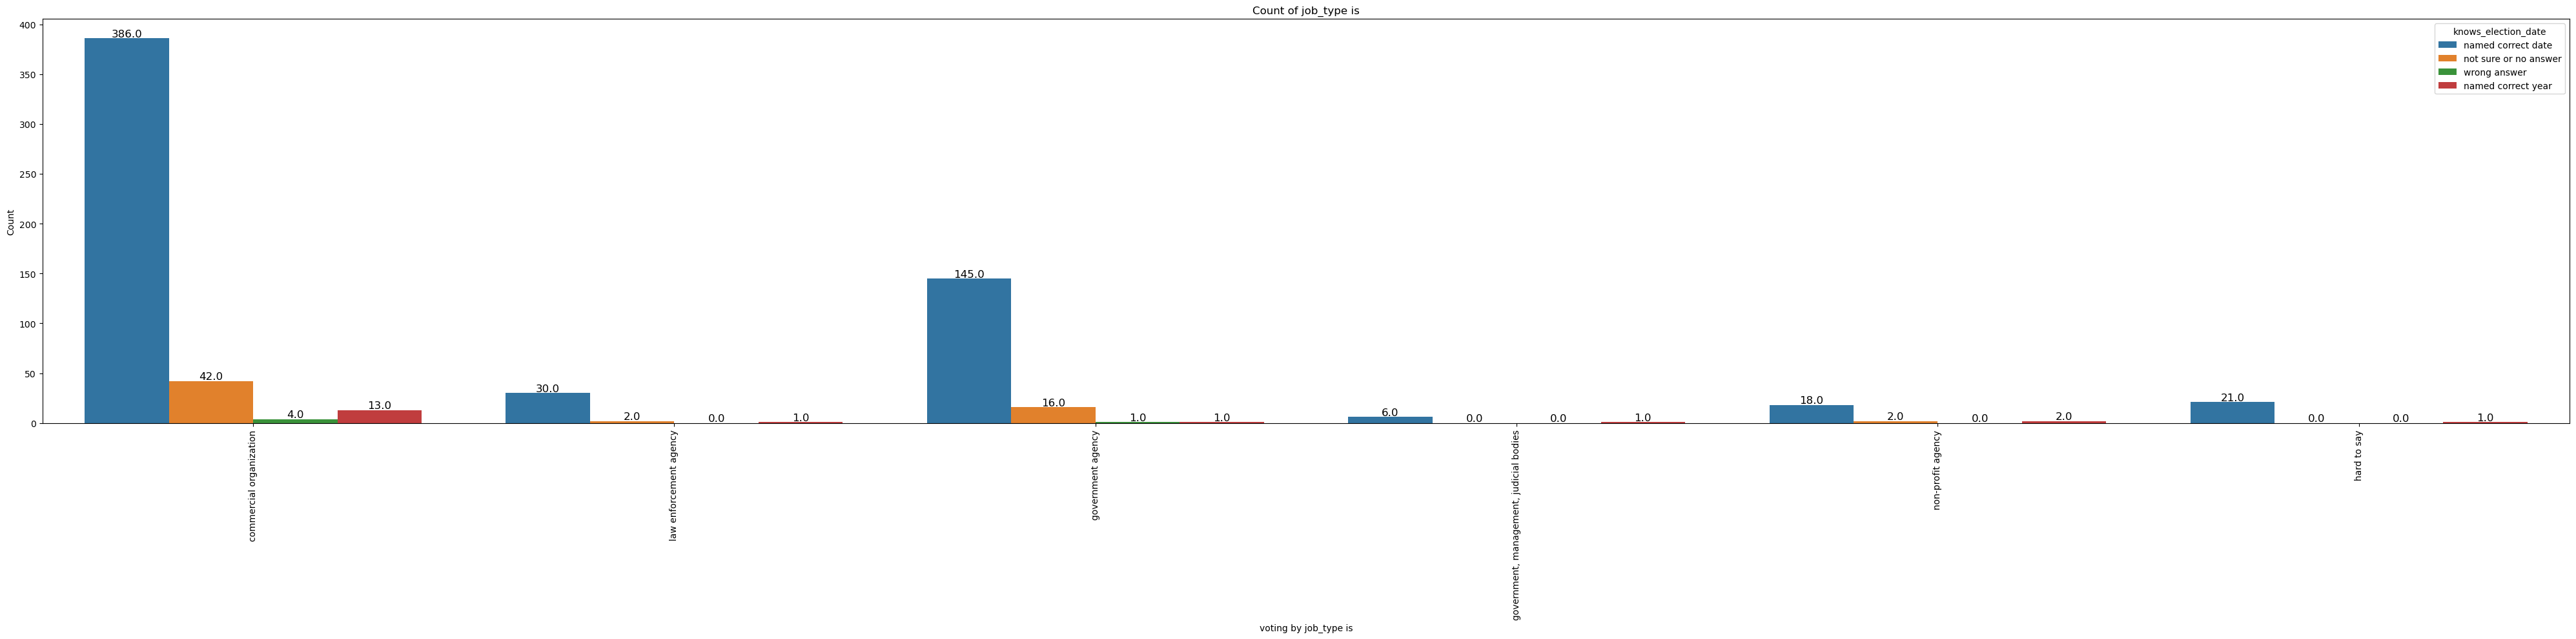

C:\Users\madhu\AppData\Local\Temp\ipykernel_26540\1985234372.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


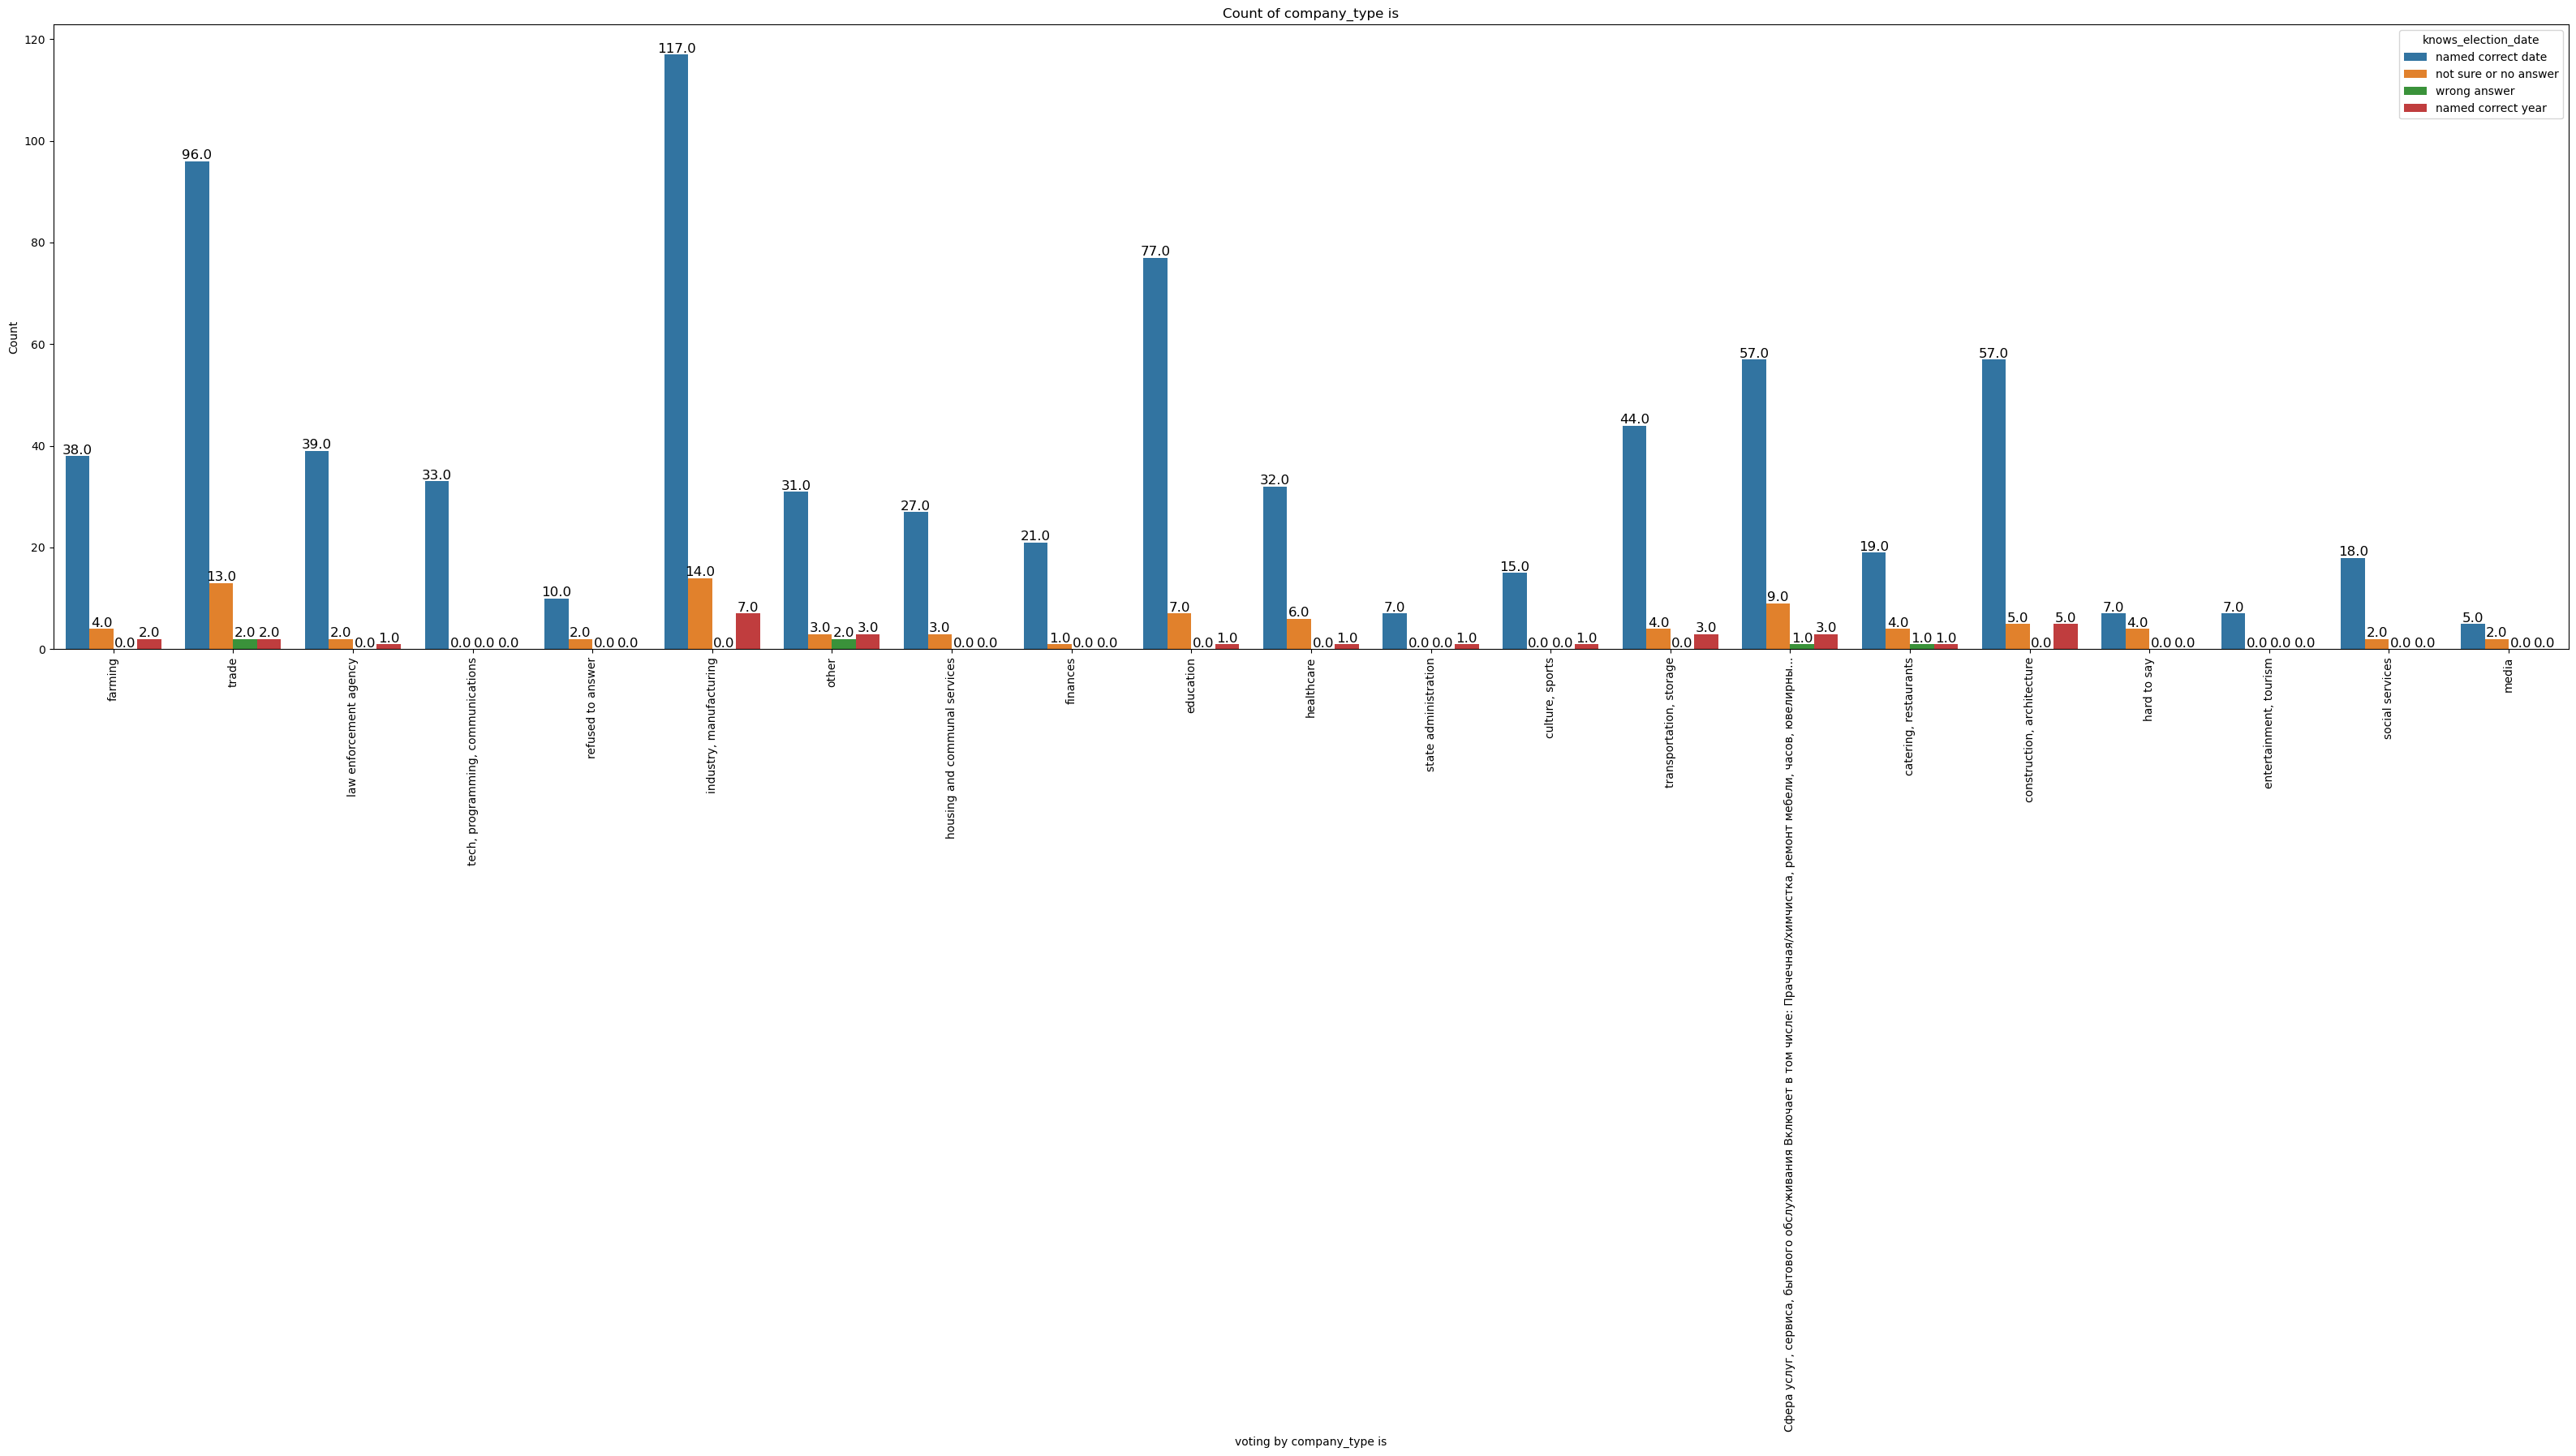

In [53]:
for col in cols:
    plt.figure(figsize=(40, 10))
    ax = sns.countplot(x=col, data=df,hue=df['knows_election_date']) 
    
    # Annotate the count plot
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
    
    plt.title(f'Count of {col} is')
    plt.xlabel(f'voting by {col} is')
    plt.xticks(rotation=90)
    plt.ylabel('Count')
    plt.tight_layout() 
    plt.show()

C:\Users\madhu\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\madhu\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Text(0.5, 1.0, 'selection of knos_election_date by Age Group ')

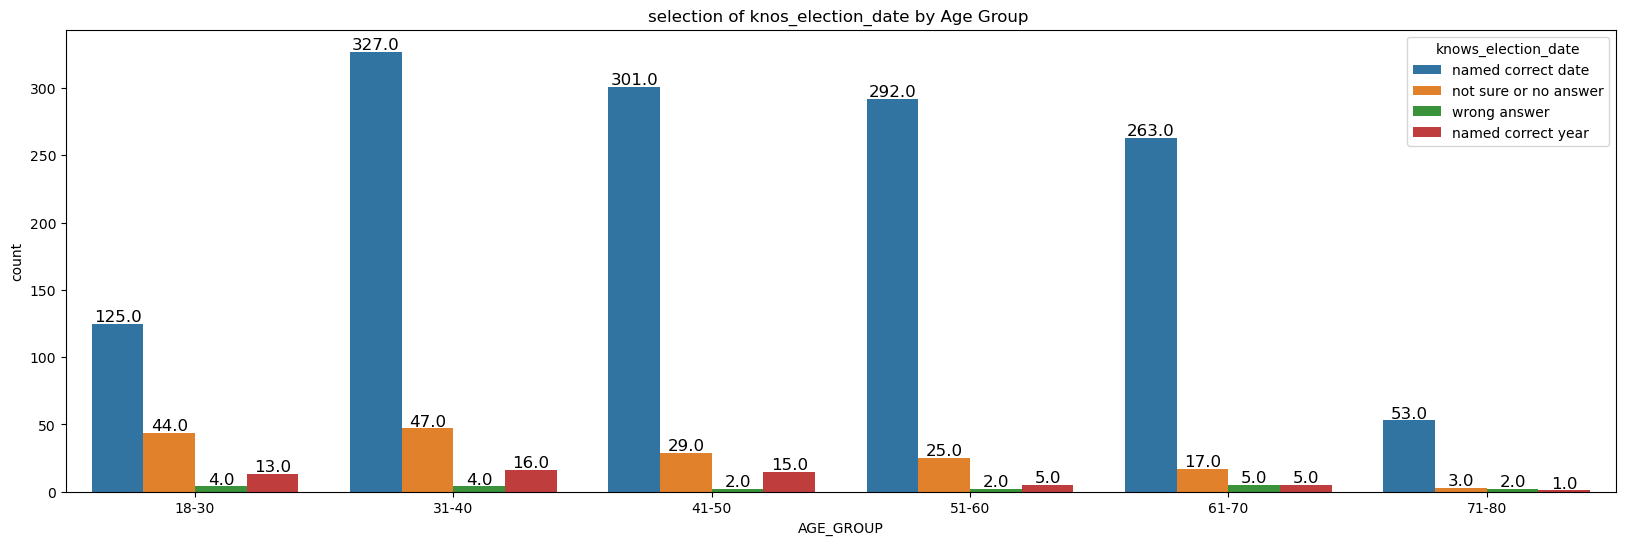

In [55]:
age_labels = ['18-30','31-40', '41-50', '51-60', '61-70', '71-80']
df['AGE_GROUP'] = pd.cut(df['age'], bins=6, labels=age_labels, right=False)
plt.figure(figsize=(20, 6))
ax = sns.countplot(x='AGE_GROUP',data=df,hue=df['knows_election_date'])

# Annotate the count plot
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('selection of knos_election_date by Age Group ')

C:\Users\madhu\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\madhu\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Text(0.5, 1.0, 'election date survey by Weight Group')

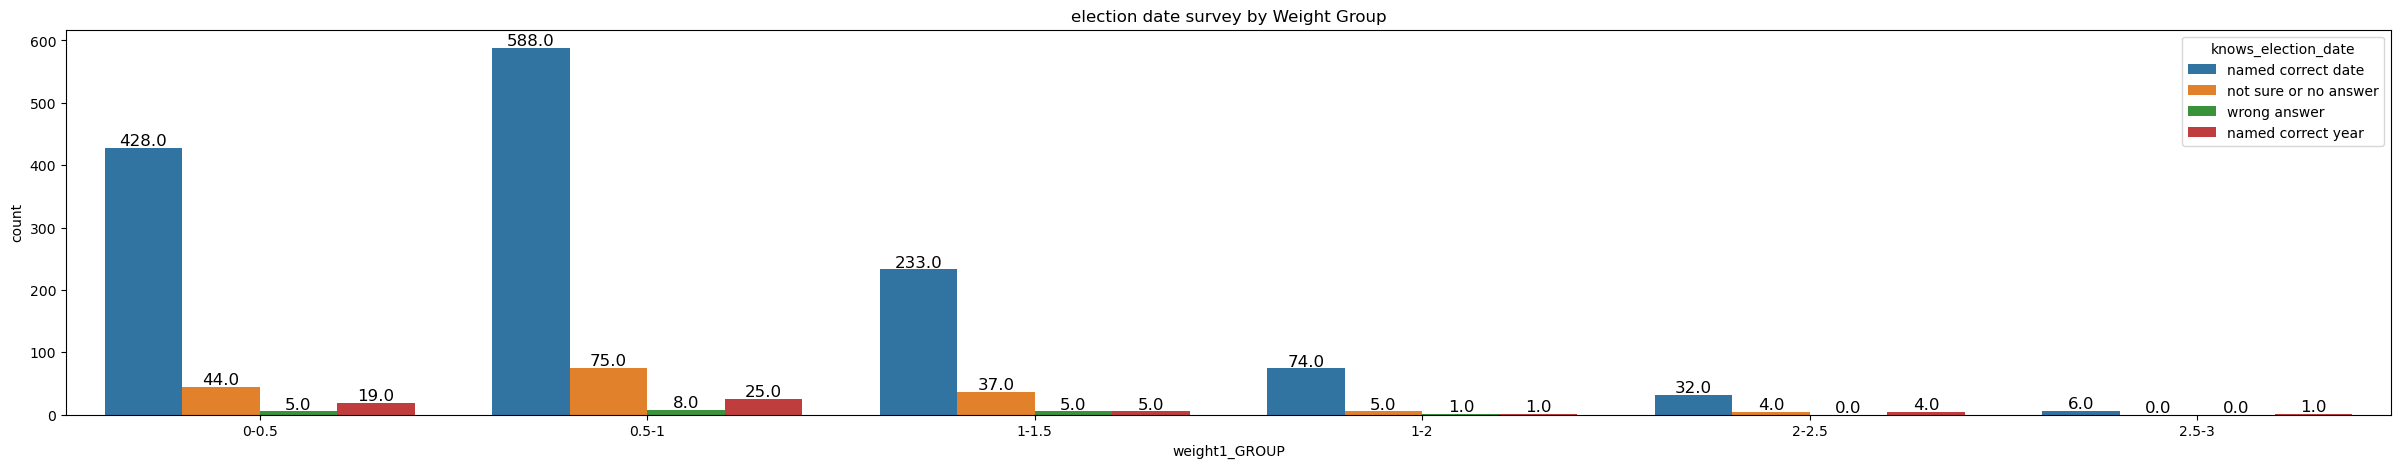

In [56]:
weight_labels = ['0-0.5','0.5-1', '1-1.5', '1-2', '2-2.5', '2.5-3']
df['weight1_GROUP'] = pd.cut(df['weight1'], bins=6, labels=weight_labels, right=False)
plt.figure(figsize=(30, 5))
ax = sns.countplot(x='weight1_GROUP',data=df,hue=df['knows_election_date'])

# Annotate the count plot
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('election date survey by Weight Group')

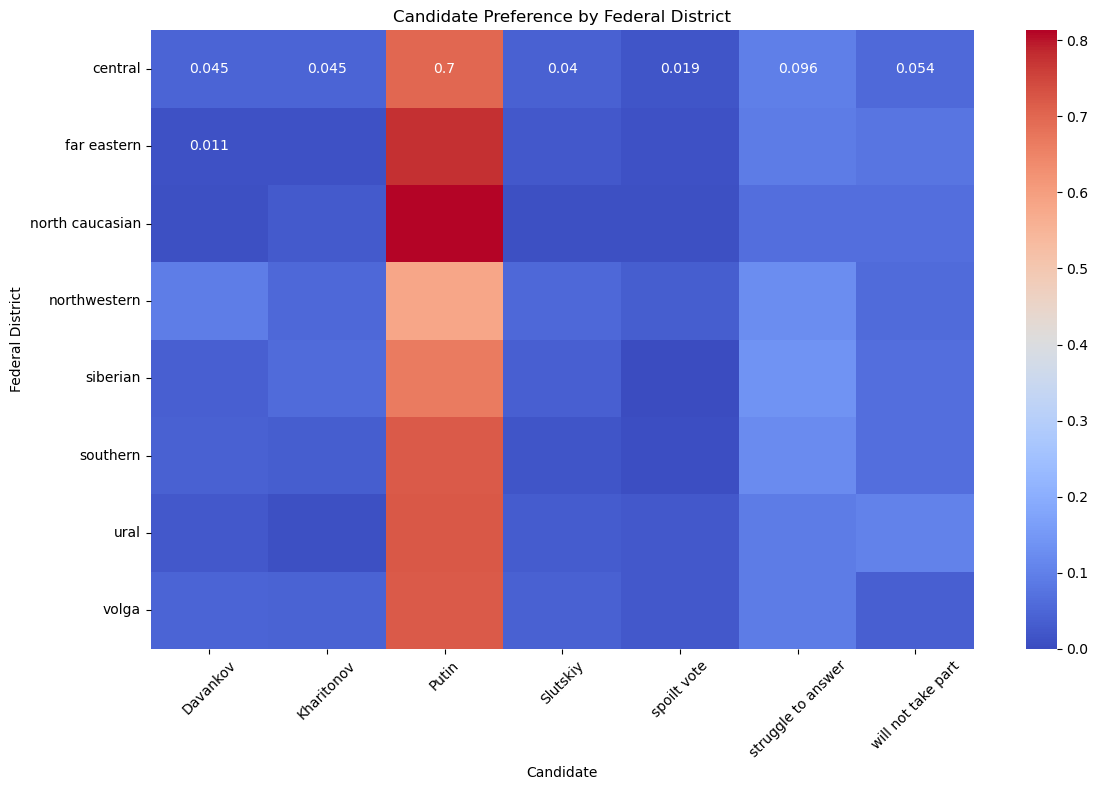

In [58]:
# Federal District and Candidate Preference
district_candidate_pref = pd.crosstab(df['federal_district'], df['candidate'], normalize='index')

plt.figure(figsize=(12, 8))
sns.heatmap(district_candidate_pref, cmap='coolwarm', annot=True)
plt.title('Candidate Preference by Federal District')
plt.xlabel('Candidate')
plt.ylabel('Federal District')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.tight_layout()  # Adjust layout to fit elements properly
plt.show()

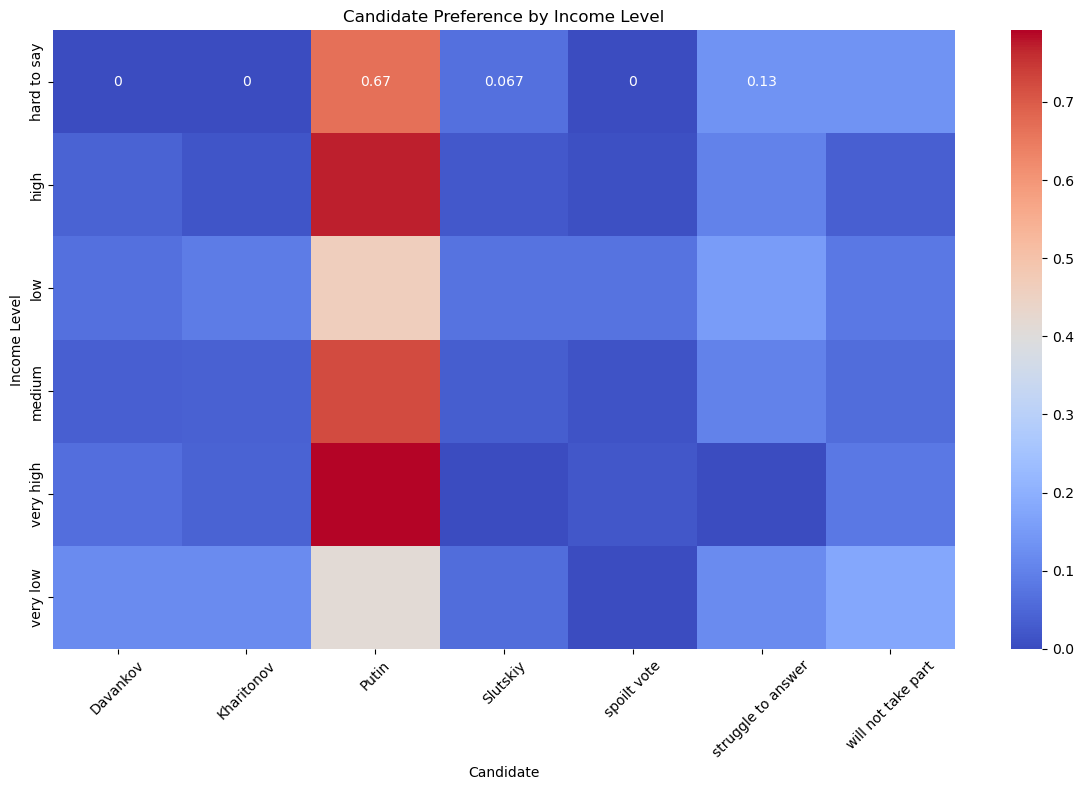

In [59]:
# Income and Candidate Preference
income_candidate_pref = pd.crosstab(df['income'], df['candidate'], normalize='index')

plt.figure(figsize=(12, 8))
sns.heatmap(income_candidate_pref, cmap='coolwarm', annot=True)
plt.title('Candidate Preference by Income Level')
plt.xlabel('Candidate')
plt.ylabel('Income Level')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.tight_layout()  # Adjust layout to fit elements properly
plt.show()


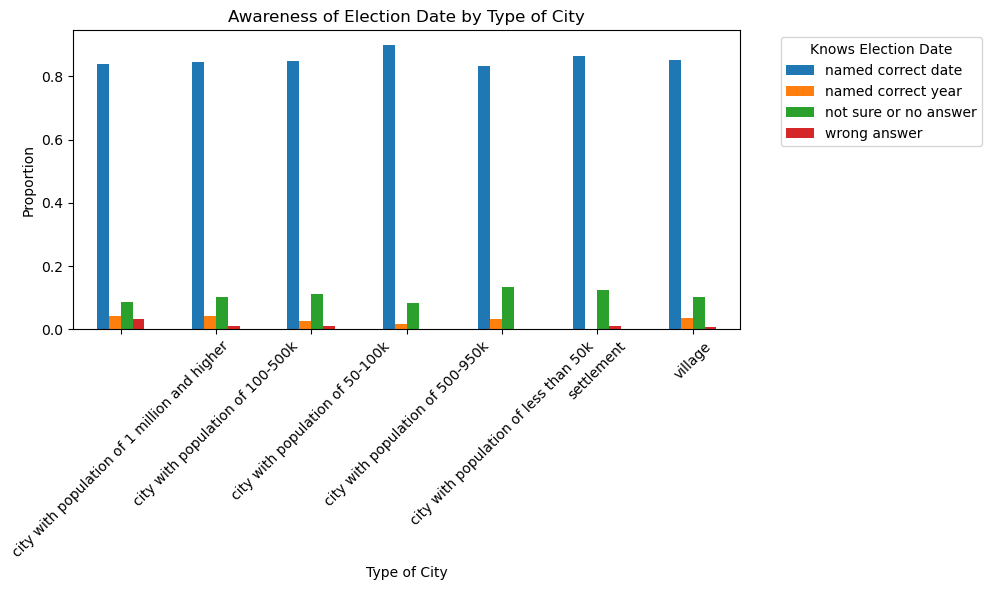

In [61]:
# Urban vs Rural Awareness of Election Date
city_awareness = pd.crosstab(df['type_of_city'], df['knows_election_date'], normalize='index')

city_awareness.plot(kind='bar', figsize=(10, 6))
plt.title('Awareness of Election Date by Type of City')
plt.xlabel('Type of City')
plt.ylabel('Proportion')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.legend(title='Knows Election Date', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to fit elements properly
plt.show()


In [63]:
df.drop('id',axis=1,inplace=True)

<Axes: >

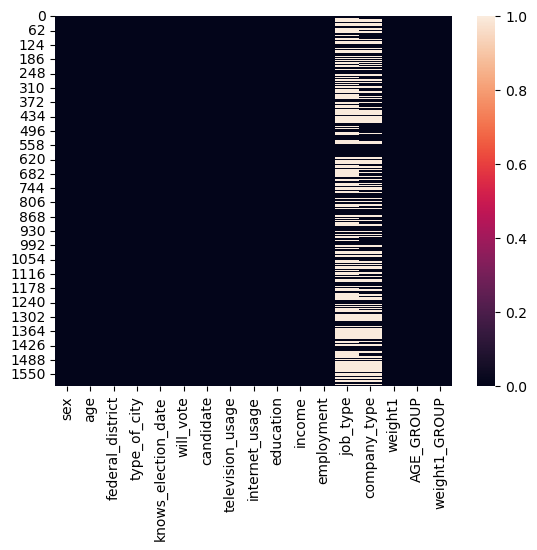

In [75]:
sns.heatmap(df.isna())

In [65]:
for i in df.columns:
    print(f'Unique_values of {i} is:',df[i].unique())
    print(f"Data type of {i} is",df[i].dtypes)
    

Unique_values of sex is: ['male' 'female']
Data type of sex is object
Unique_values of age is: [18. 23. 20. 22. 21. 27. 37. 43. 39. 36. 49. 60. 44. 61. 67. 29. 47. 32.
 45. 35. 53. 71. 54. 55. 48. 66. 56. 68. 69. 33. 76. 77. 70. 86. 90. 75.
 80. 24. 19. 25. 28. 31. 26. 30. 38. 40. 41. 52. 50. 51. 46. 63. 34. 42.
 65. 73. 74. 72. 59. 57. 58. 78. 79. 62. 64. 82. 84. 85. 87. 83. 81.]
Data type of age is float64
Unique_values of federal_district is: ['north caucasian' 'volga' 'northwestern' 'southern' 'central' 'ural'
 'siberian' 'far eastern']
Data type of federal_district is object
Unique_values of type_of_city is: ['village' 'city with population of less than 50k'
 'city with population of 1 million and higher'
 'city with population of 50-100k' 'city with population of 100-500k'
 'settlement' 'city with population of 500-950k']
Data type of type_of_city is object
Unique_values of knows_election_date is: ['named correct date' 'not sure or no answer' 'wrong answer'
 'named correct year']

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   sex                  1600 non-null   object  
 1   age                  1600 non-null   float64 
 2   federal_district     1600 non-null   object  
 3   type_of_city         1600 non-null   object  
 4   knows_election_date  1600 non-null   object  
 5   will_vote            1600 non-null   object  
 6   candidate            1600 non-null   object  
 7   television_usage     1600 non-null   object  
 8   internet_usage       1600 non-null   object  
 9   education            1600 non-null   object  
 10  income               1600 non-null   object  
 11  employment           1600 non-null   object  
 12  job_type             692 non-null    object  
 13  company_type         879 non-null    object  
 14  weight1              1600 non-null   float64 
 15  AGE_GROUP            

In [68]:
df_floats = df.select_dtypes(include=['float64', 'float32'])
df_cat=df.select_dtypes(include=['object'])

In [72]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [74]:
#applying one hot encoding technique for categorical columns
# Assuming df_cat is your DataFrame containing only categorical columns
onehotEnc = OneHotEncoder(sparse=False, dtype=int)

# Fit and transform the categorical data
df_cat_encoded = onehotEnc.fit_transform(df_cat)

# Get the feature names for the one-hot encoded columns
encoded_columns = onehotEnc.get_feature_names_out(df_cat.columns)

# Create a DataFrame with the encoded data and the appropriate column names
df_cat_encoded = pd.DataFrame(df_cat_encoded, columns=encoded_columns, dtype=int)

# Verify the result
df_cat_encoded.head()

C:\Users\madhu\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


sex_female  sex_male  federal_district_central  \
0           0         1                         0   
1           0         1                         0   
2           0         1                         0   
3           0         1                         0   
4           0         1                         0   

   federal_district_far eastern  federal_district_north caucasian  \
0                             0                                 1   
1                             0                                 1   
2                             0                                 0   
3                             0                                 0   
4                             0                                 0   

   federal_district_northwestern  federal_district_siberian  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              1                          0   
4                              0                          0   

   federal_district_southern  federal_district_ural  federal_district_volga  \
0                          0                      0                       0   
1                          0                      0                       0   
2                          0                      0                       1   
3                          0                      0                       0   
4                          1                      0                       0   

   ...  company_type_media  company_type_other  \
0  ...                   0                   0   
1  ...                   0                   0   
2  ...                   0                   0   
3  ...                   0                   0   
4  ...                   0                   0   

   company_type_refused to answer  company_type_social services  \
0                               0                             0   
1                               0                             0   
2                               0                             0   
3                               0                             0   
4                               0                             0   

   company_type_state administration  \
0                                  0   
1                                  0   
2                                  0   
3                                  0   
4                                  0   

   company_type_tech, programming, communications  company_type_trade  \
0                                               0                   0   
1                                               0                   1   
2                                               0                   0   
3                                               0                   0   
4                                               1                   0   

   company_type_transportation, storage  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   company_type_Сфера услуг, сервиса, бытового обслуживания Включает в том числе: Прачечная/химчистка, ремонт мебели, часов, ювелирны...  \
0                                                  0                                                                                       
1                                                  0                                                                                       
2                                                  0                                                                                       
3                                                  0                                                                                       
4                                                  0                    

In [76]:
df_combined=pd.concat([df_floats,df_cat_encoded],axis=1)

In [78]:
df_combined.head()

age   weight1  sex_female  sex_male  federal_district_central  \
0  18.0  1.445172           0         1                         0   
1  23.0  1.445172           0         1                         0   
2  20.0  1.301691           0         1                         0   
3  22.0  1.538628           0         1                         0   
4  21.0  1.967015           0         1                         0   

   federal_district_far eastern  federal_district_north caucasian  \
0                             0                                 1   
1                             0                                 1   
2                             0                                 0   
3                             0                                 0   
4                             0                                 0   

   federal_district_northwestern  federal_district_siberian  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              1                          0   
4                              0                          0   

   federal_district_southern  ...  company_type_media  company_type_other  \
0                          0  ...                   0                   0   
1                          0  ...                   0                   0   
2                          0  ...                   0                   0   
3                          0  ...                   0                   0   
4                          1  ...                   0                   0   

   company_type_refused to answer  company_type_social services  \
0                               0                             0   
1                               0                             0   
2                               0                             0   
3                               0                             0   
4                               0                             0   

   company_type_state administration  \
0                                  0   
1                                  0   
2                                  0   
3                                  0   
4                                  0   

   company_type_tech, programming, communications  company_type_trade  \
0                                               0                   0   
1                                               0                   1   
2                                               0                   0   
3                                               0                   0   
4                                               1                   0   

   company_type_transportation, storage  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   company_type_Сфера услуг, сервиса, бытового обслуживания Включает в том числе: Прачечная/химчистка, ремонт мебели, часов, ювелирны...  \
0                                                  0                                                                                       
1                                                  0                                                                                       
2                                                  0                                                                                       
3                                                  0                                                                                       
4                                                  0                                                                                       

   company_type_nan  
0                 0  
1                 0  
2                 0  
3                 1  
4                 0  

[5 rows x 100 co

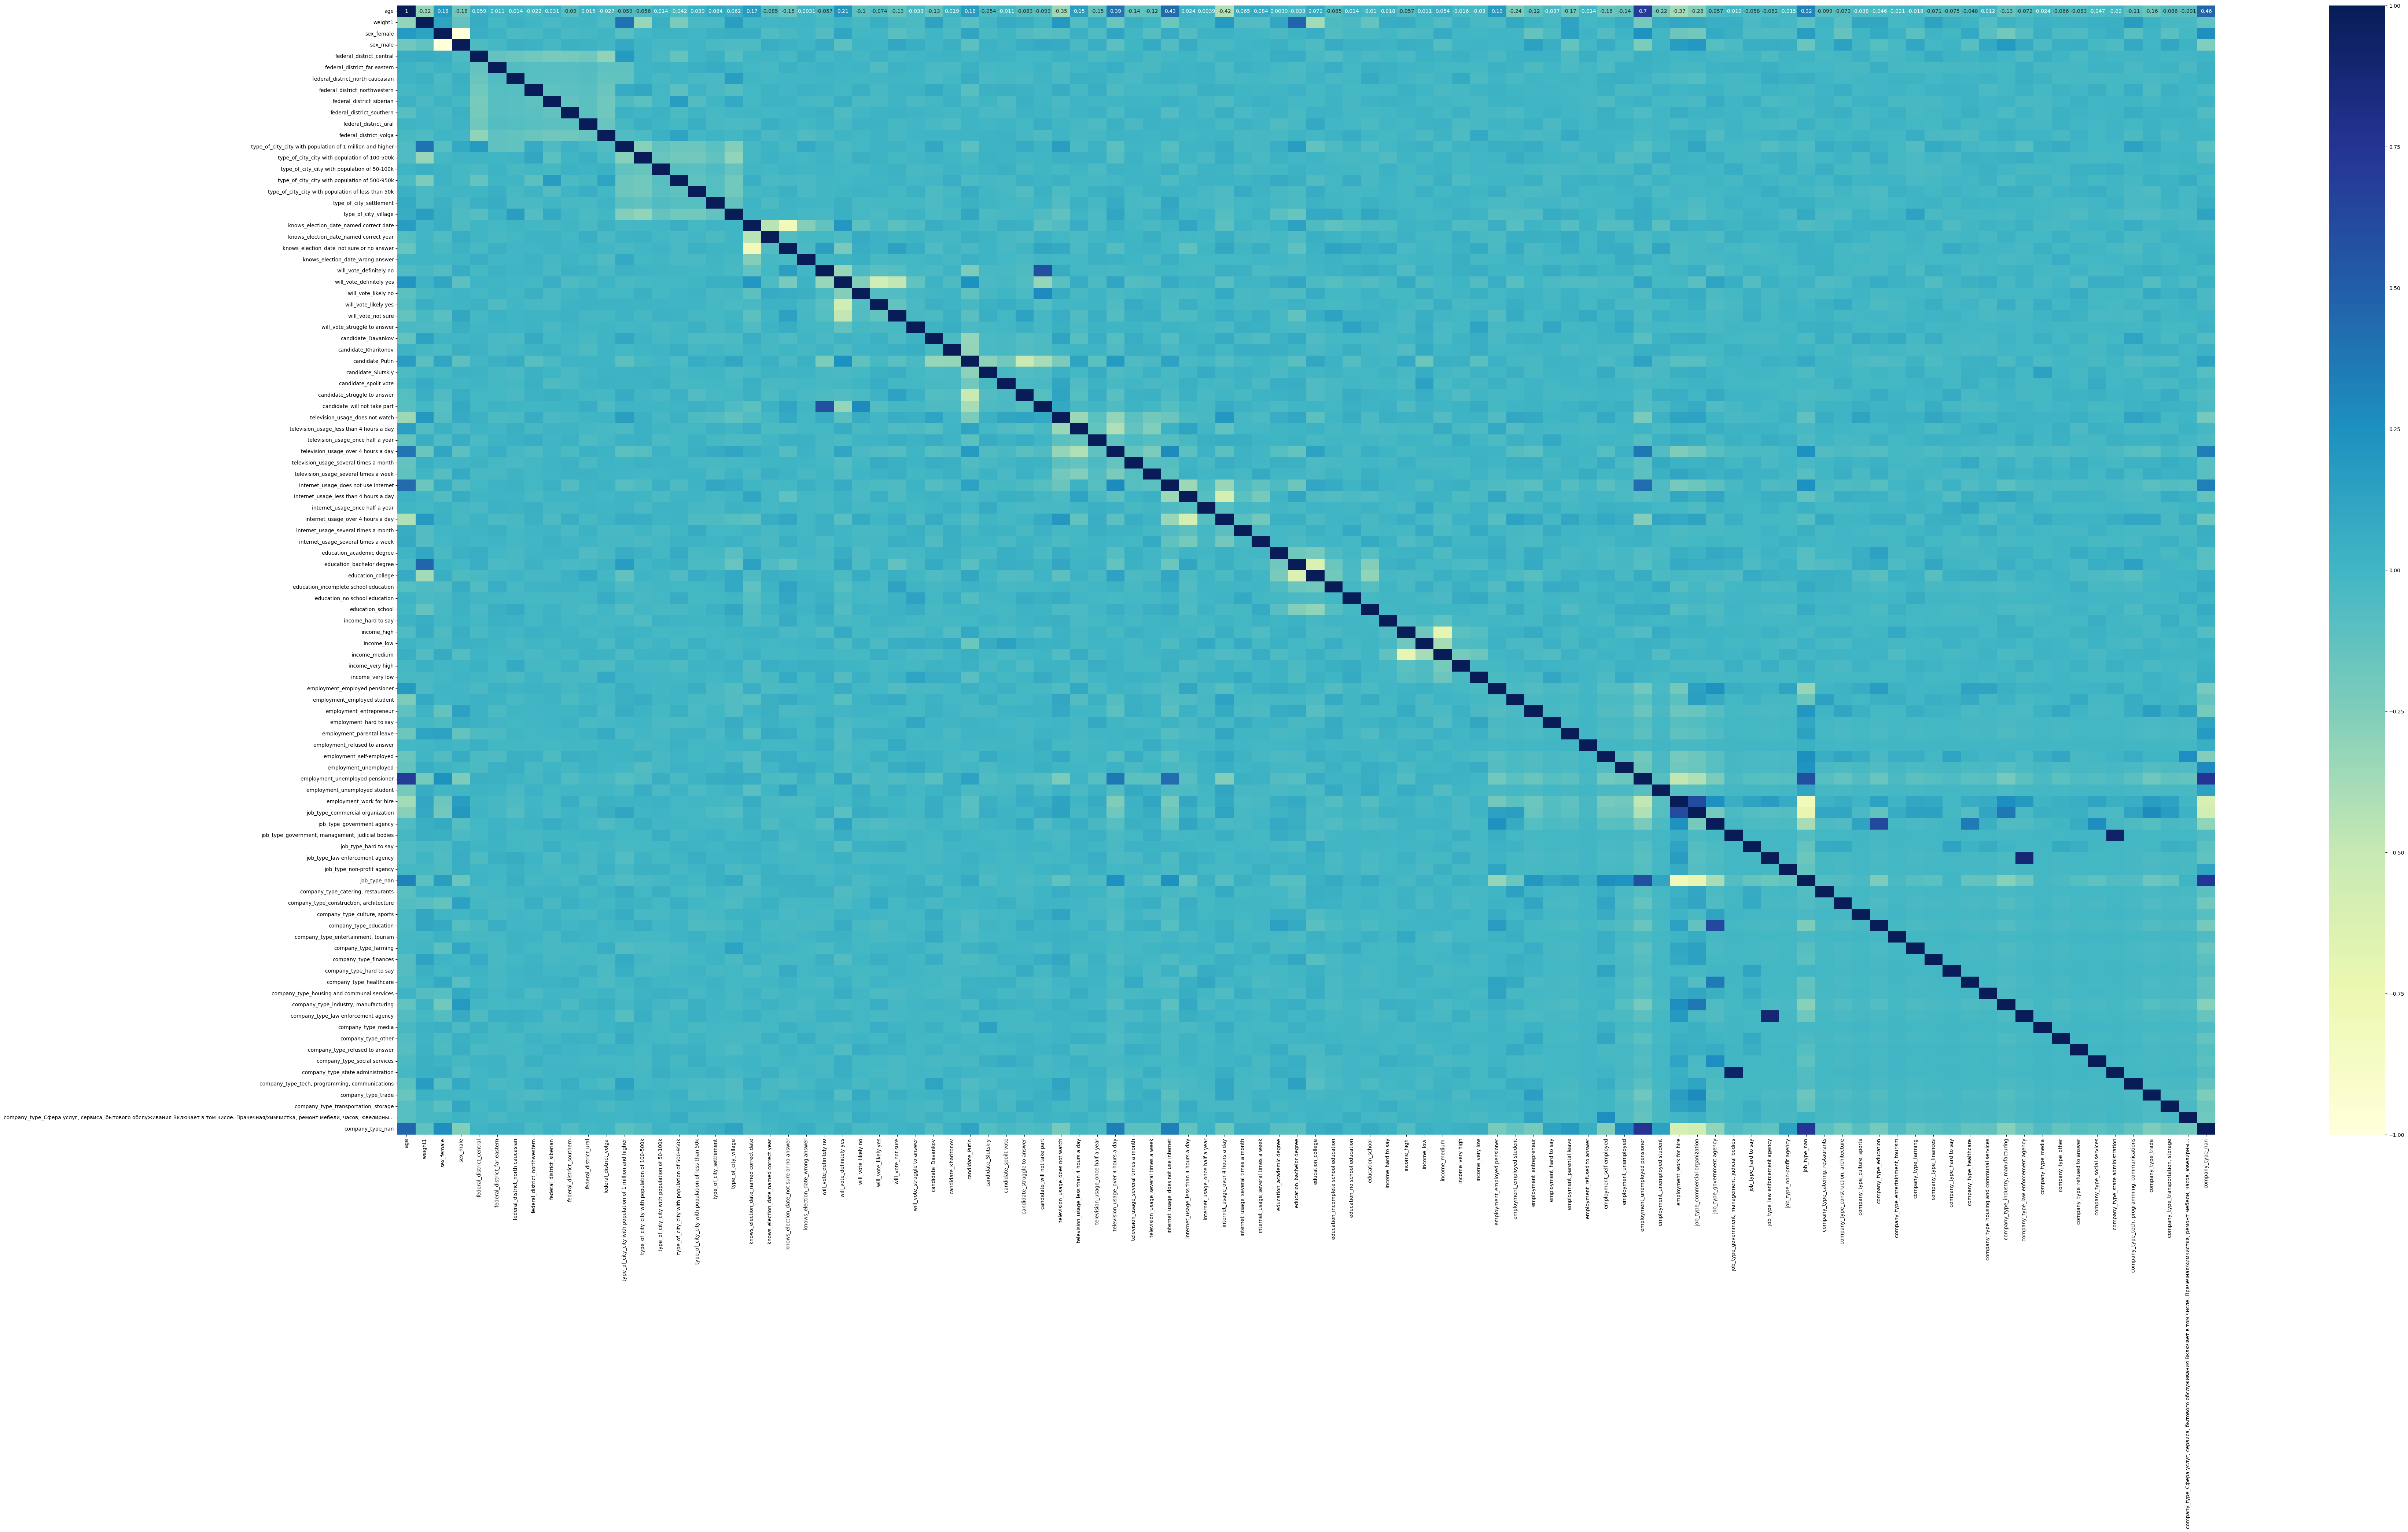

In [81]:
plt.figure(figsize=(80,40))
sns.heatmap(df_combined.corr(),annot=True,cmap='YlGnBu')
plt.show()